<a href="https://colab.research.google.com/github/wahyudimasdi/MSIB-Project-Showcase/blob/main/Multivariate%20Analysis%20Assistance%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canonical Correlation Analysis

# Analisis Korelasi Kanonik

## A. Import Library dan Data

In [ ]:
packages <- c("MVN","CCP","Hmisc", "matlib", "Matrix","expm","matrixcalc","ellipsis","Hotelling","dplyr","psych","RcmdrMisc","Rcsdp","mvnormtest","factoextra","cluster","ggplot2","tree","class","CCA","vegan","candisc")
if ( length(missing_pkgs <- setdiff(packages, rownames(installed.packages()))) > 0) {
  message("Installing missing package(s): ", paste(missing_pkgs, collapse = ", "))
  install.packages(missing_pkgs)
}
lapply(packages, library, character.only = TRUE)

Installing missing package(s): MVN, CCP, Hmisc, matlib, expm, matrixcalc, Hotelling, psych, RcmdrMisc, Rcsdp, mvnormtest, factoextra, tree, CCA, vegan, candisc

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pracma’, ‘later’, ‘lazyeval’, ‘pcaPP’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘mvtnorm’, ‘corrplot’, ‘rainbow’, ‘RCurl’, ‘dotCall64’, ‘Rcpp’, ‘gsl’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘checkmate’, ‘htmlwidgets’, ‘zoo’, ‘proxy’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘fds’, ‘deSolve’, ‘spam’, ‘maps’, ‘nortest’, ‘moments’, ‘plyr’, ‘energy’, ‘car’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘xtable’, ‘rgl’, ‘corpcor’, ‘mnormt’, ‘sandwich’, ‘

ERROR: Error in FUN(X[[i]], ...): there is no package called ‘MVN’


In [ ]:
data <- read.csv("AirQualityUCI.csv", header=TRUE, sep=";")
dim(data)
head(data)

## B. Preprocessing Data

Untuk kelompok variabel set Y
1. T -> Temperature (Suhu)
2. RH -> Relative Humidity (Kelembapan Relatif)
3. AH -> Absolute Humidity (Kelembapan Mutlak)

Untuk kelompok variabel set X
1. CO.GT. (True hourly averaged concentration CO in mg/m^3 (reference analyzer))
2. PT08.S1.CO. ((tin oxide) hourly averaged sensor response (nominally CO targeted))
3. NMHC.GT. (True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer))
4. C6H6.GT. (True hourly averaged Benzene concentration in microg/m^3 (reference analyzer))
5. PT08.S2.NMHC. ((titania) hourly averaged sensor response (nominally NMHC targeted))
6. NOx.GT. (True hourly averaged NOx concentration in ppb (reference analyzer))
7. PT08.S3.NOx. ((tungsten oxide) hourly averaged sensor response (nominally NOx targeted))
8. NO2.GT. (True hourly averaged NO2 concentration in microg/m^3 (reference analyzer))
9. PT08.S4.NO2. ((tungsten oxide) hourly averaged sensor response (nominally NO2 targeted))
10. PT08.S5.O3. ((indium oxide) hourly averaged sensor response (nominally O3 targeted))

### 1. Mengeluarkan kolom Date dan Time

In [ ]:
databaru=data[-1:-2]
databaru2=databaru[-14:-15]
datafinal = na.omit(databaru2)
dim(datafinal)
head(datafinal)

[1] 9357   13

,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


### 2. Definisikan Kumpulan Variabel Dependen Dan Variabel Indenpenden

In [ ]:
X <- datafinal[1:10]
Y <- datafinal[11:13]
head(X)
head(Y)

,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268
2,2.0,1292,112,9.4,955,103,1174,92,1559,972
3,2.2,1402,88,9.0,939,131,1140,114,1555,1074
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110
6,1.2,1197,38,4.7,750,89,1337,96,1393,949


,T,RH,AH
,<dbl>,<dbl>,<dbl>
1,13.6,48.9,0.7578
2,13.3,47.7,0.7255
3,11.9,54.0,0.7502
4,11.0,60.0,0.7867
5,11.2,59.6,0.7888
6,11.2,59.2,0.7848


## C. Visualisasi
Visualize the correlation within each set between each pair then for both sets at once

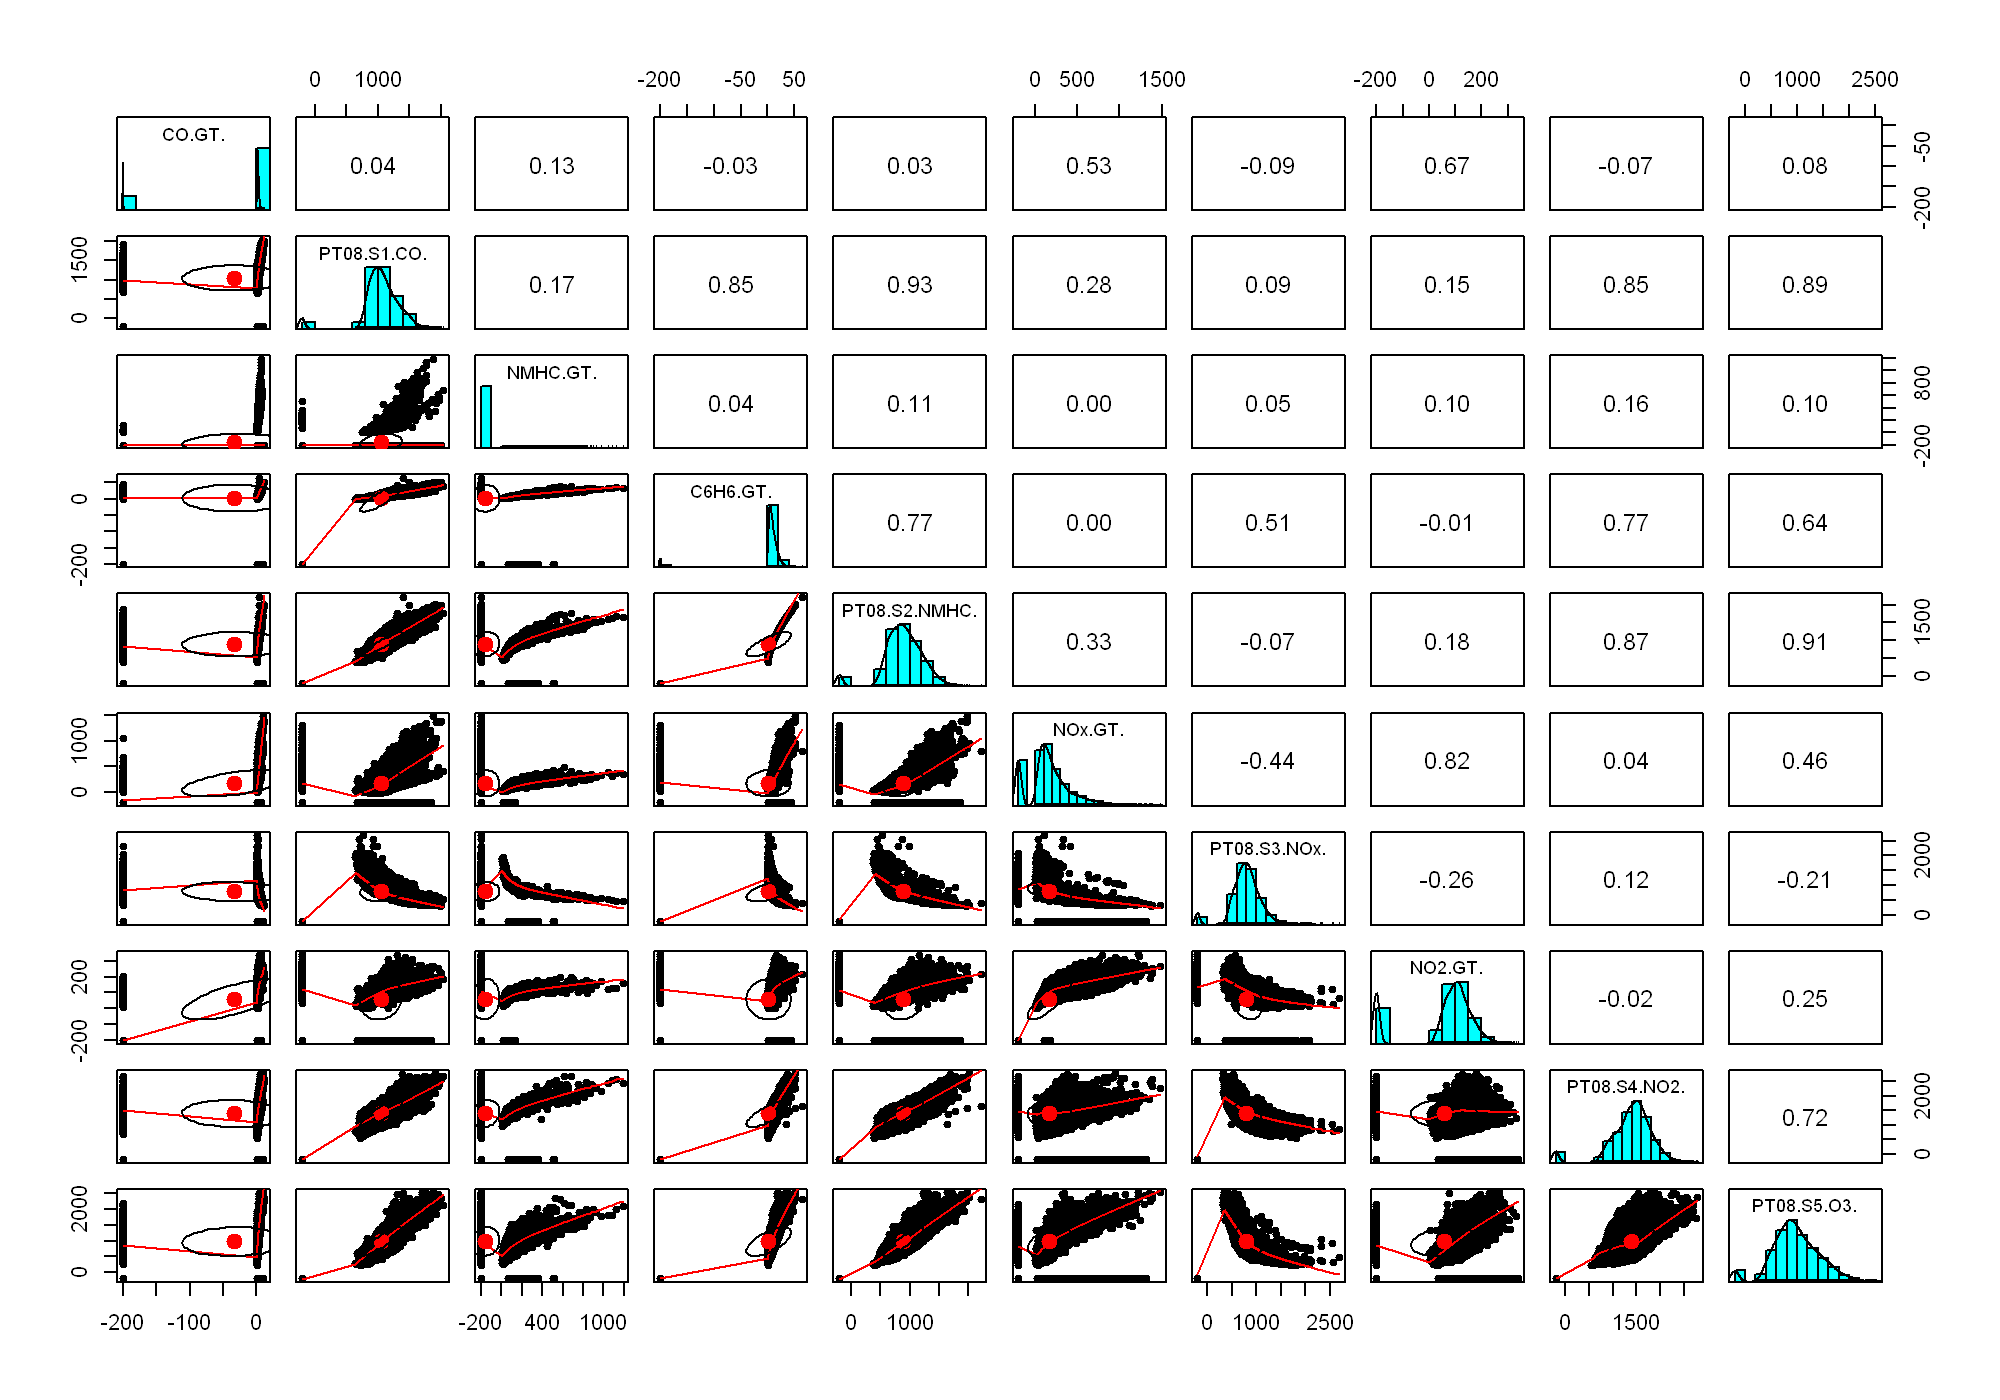

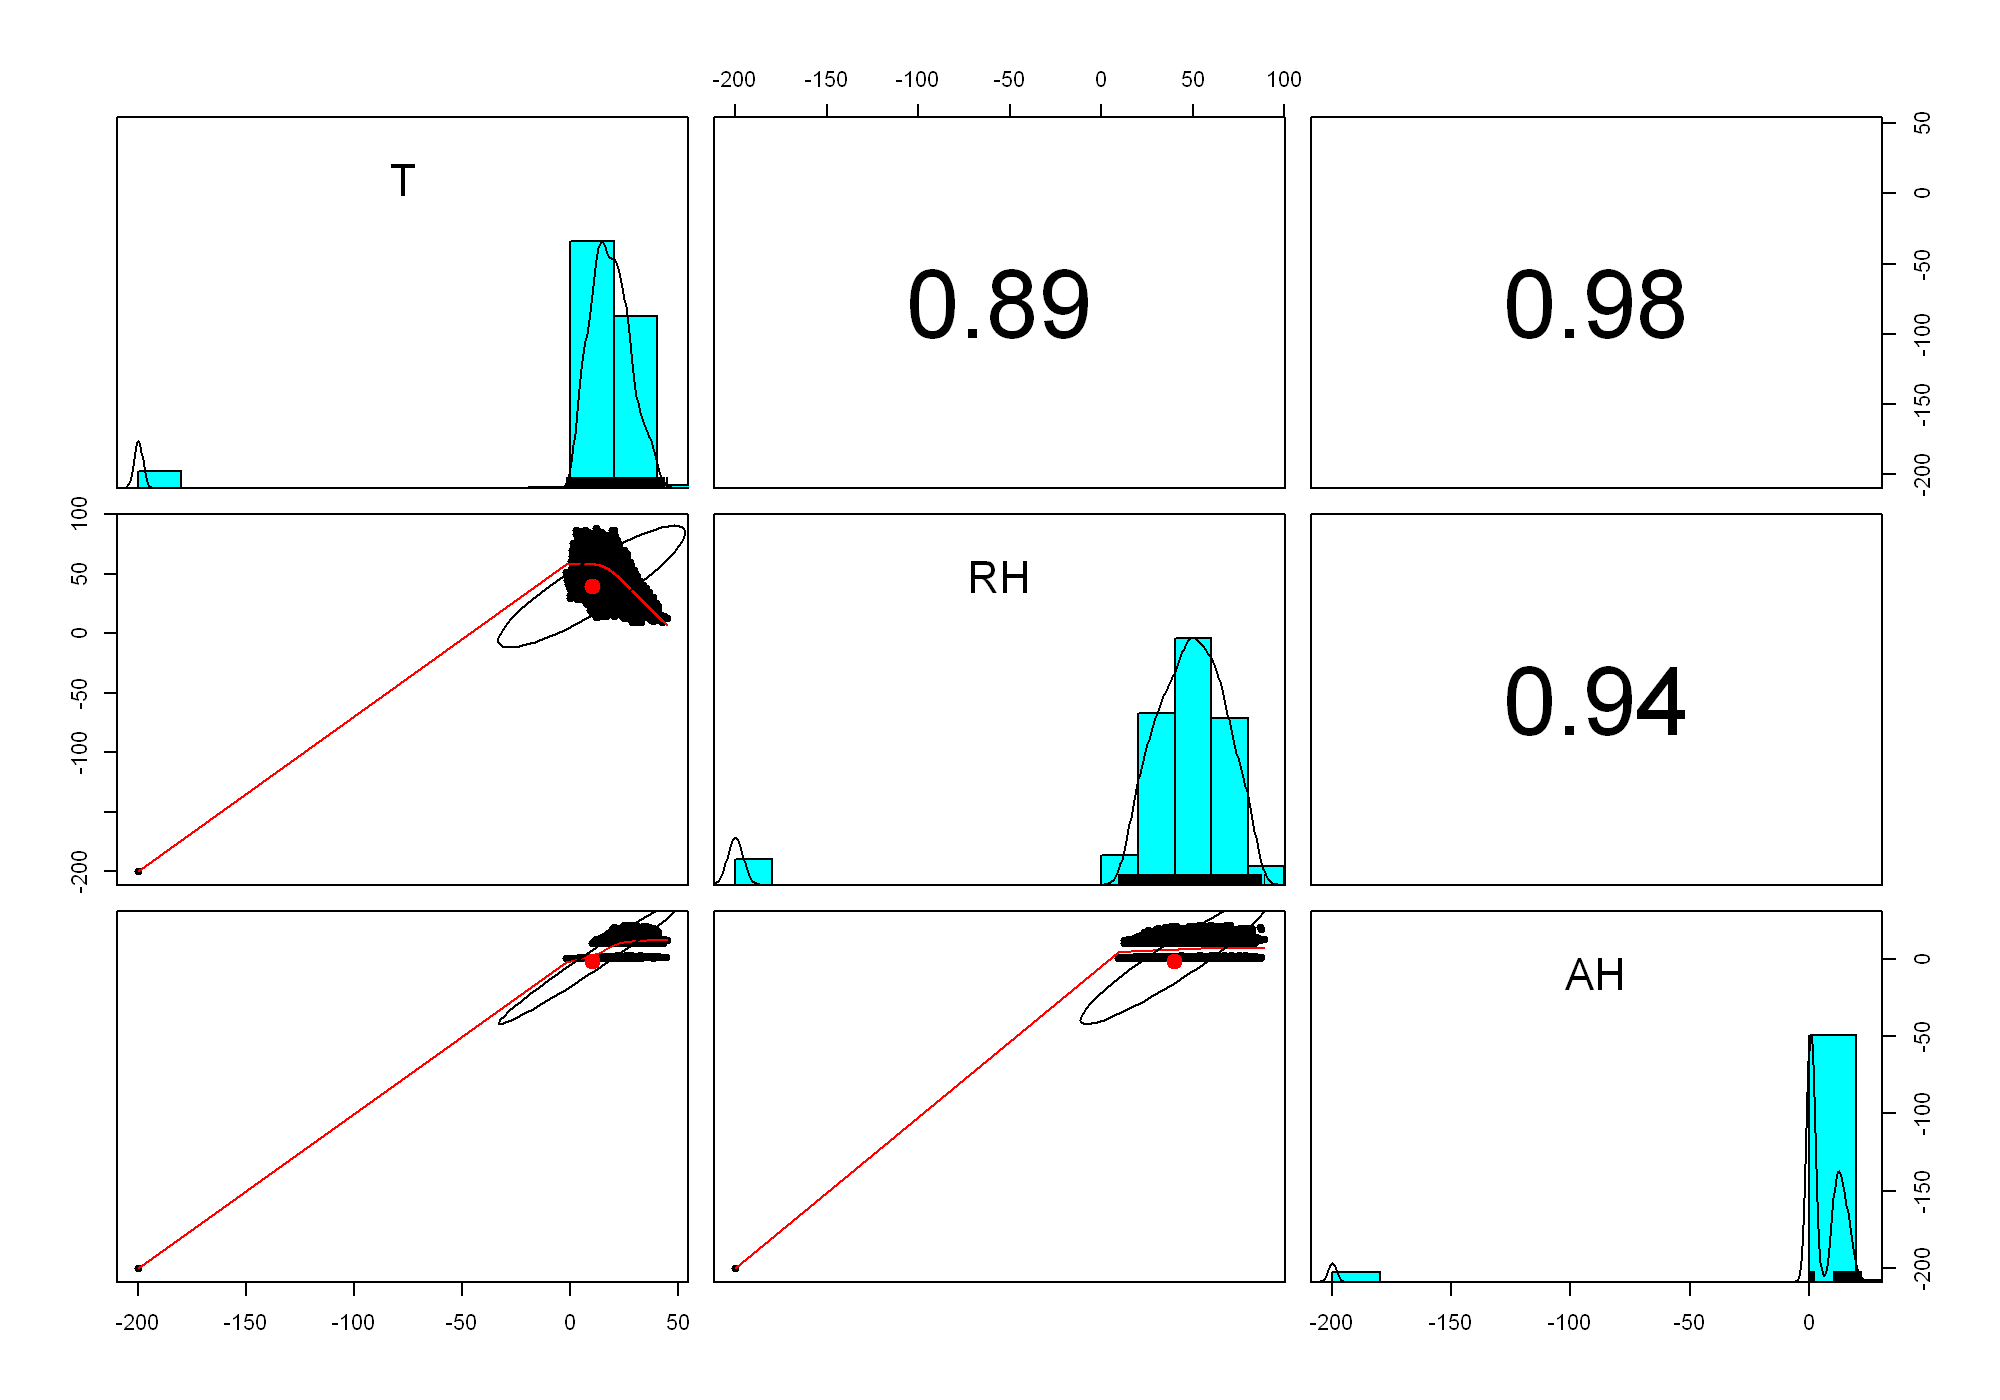

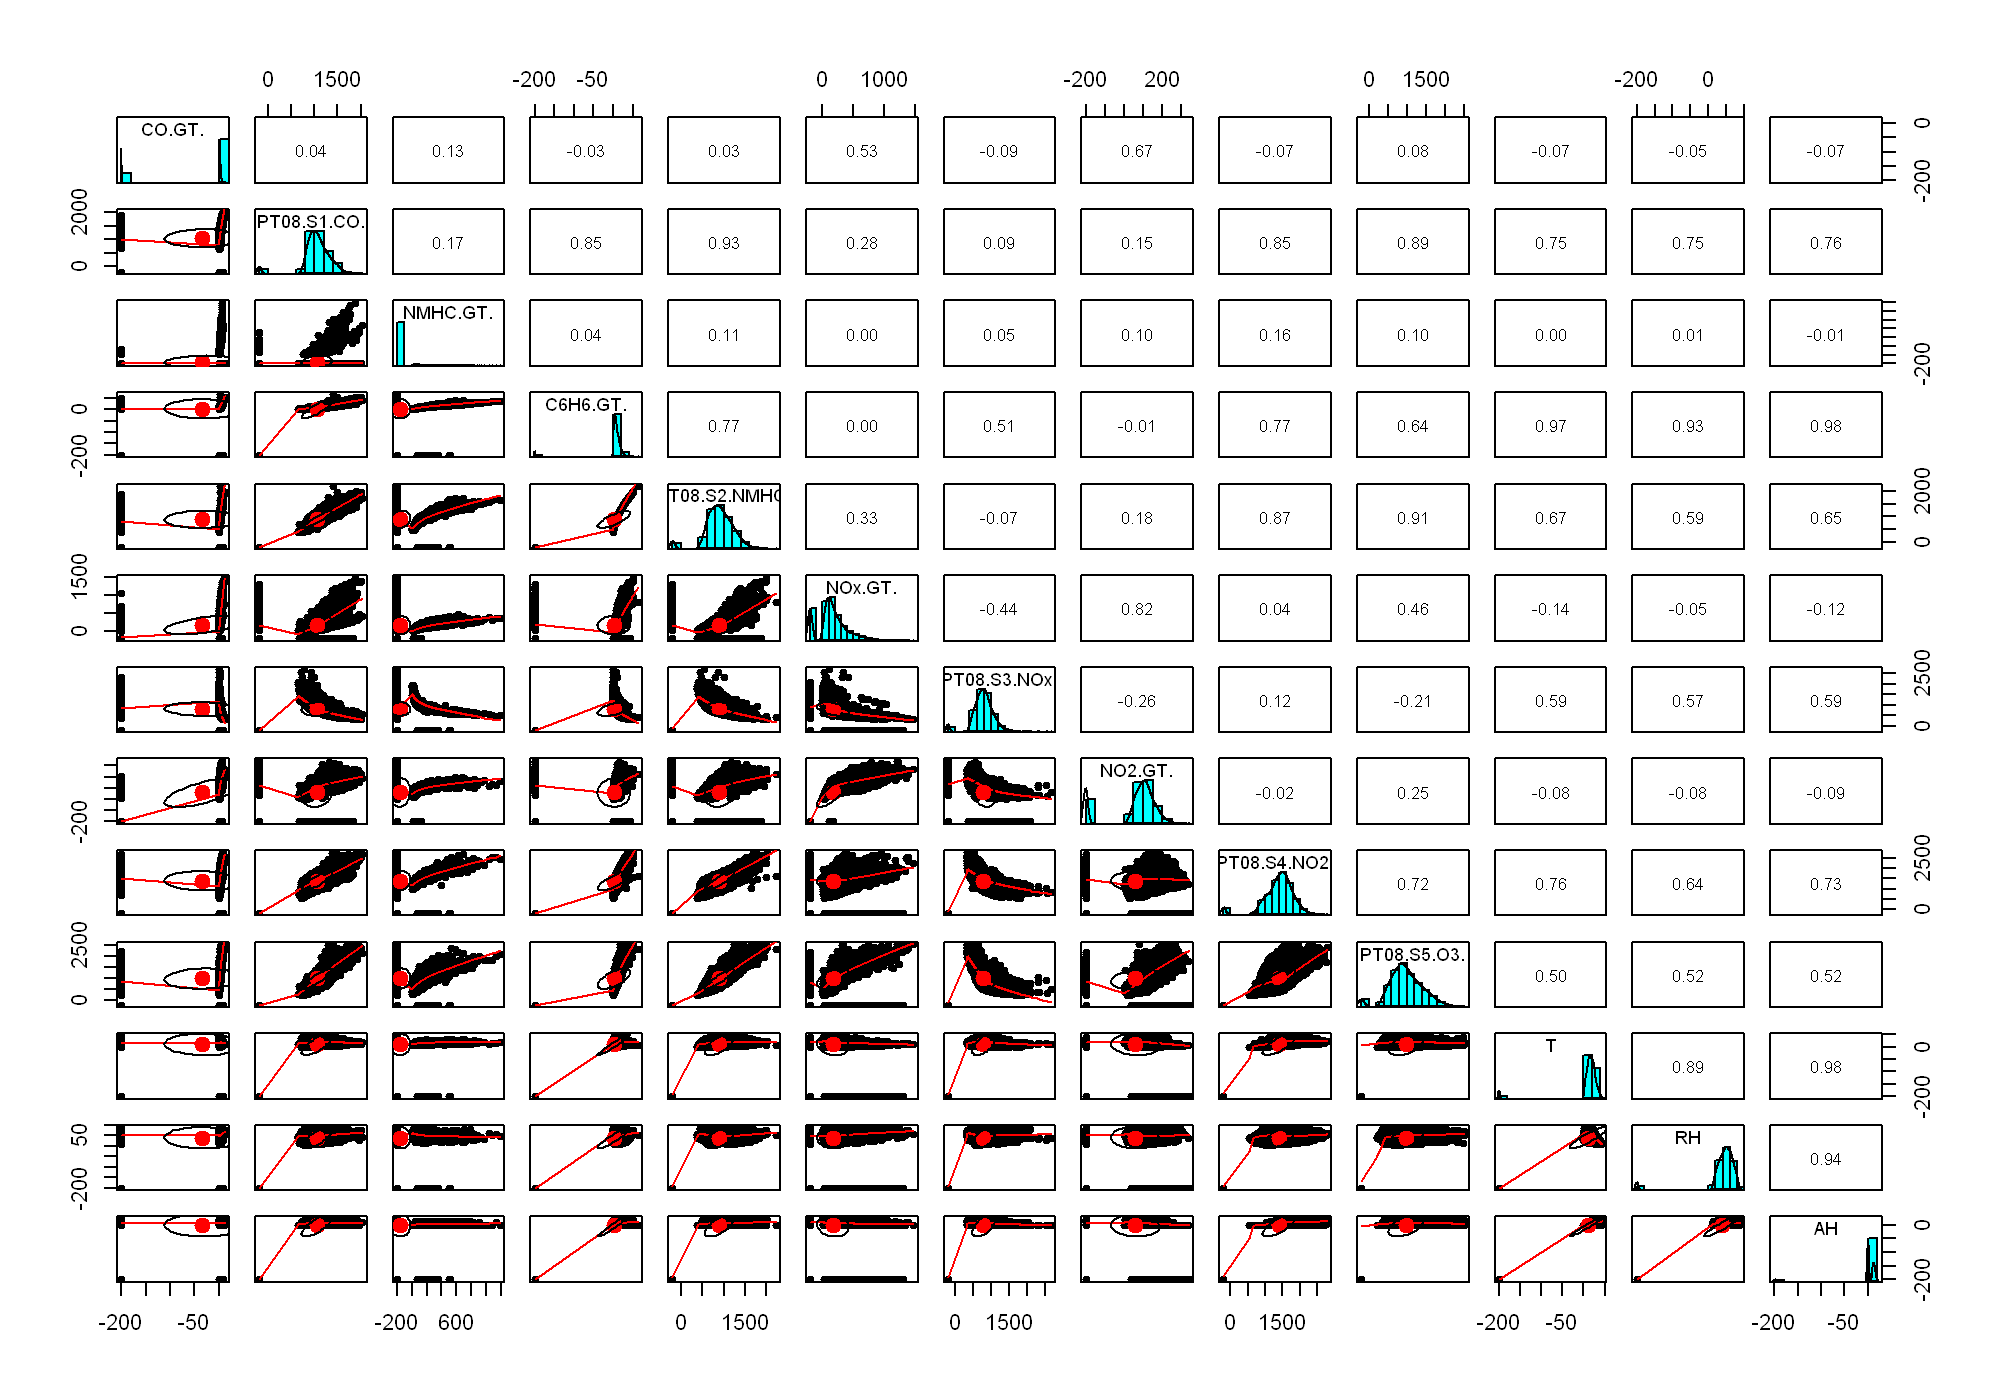

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 200)

pairs.panels(X)
pairs.panels(Y)
pairs.panels(datafinal)

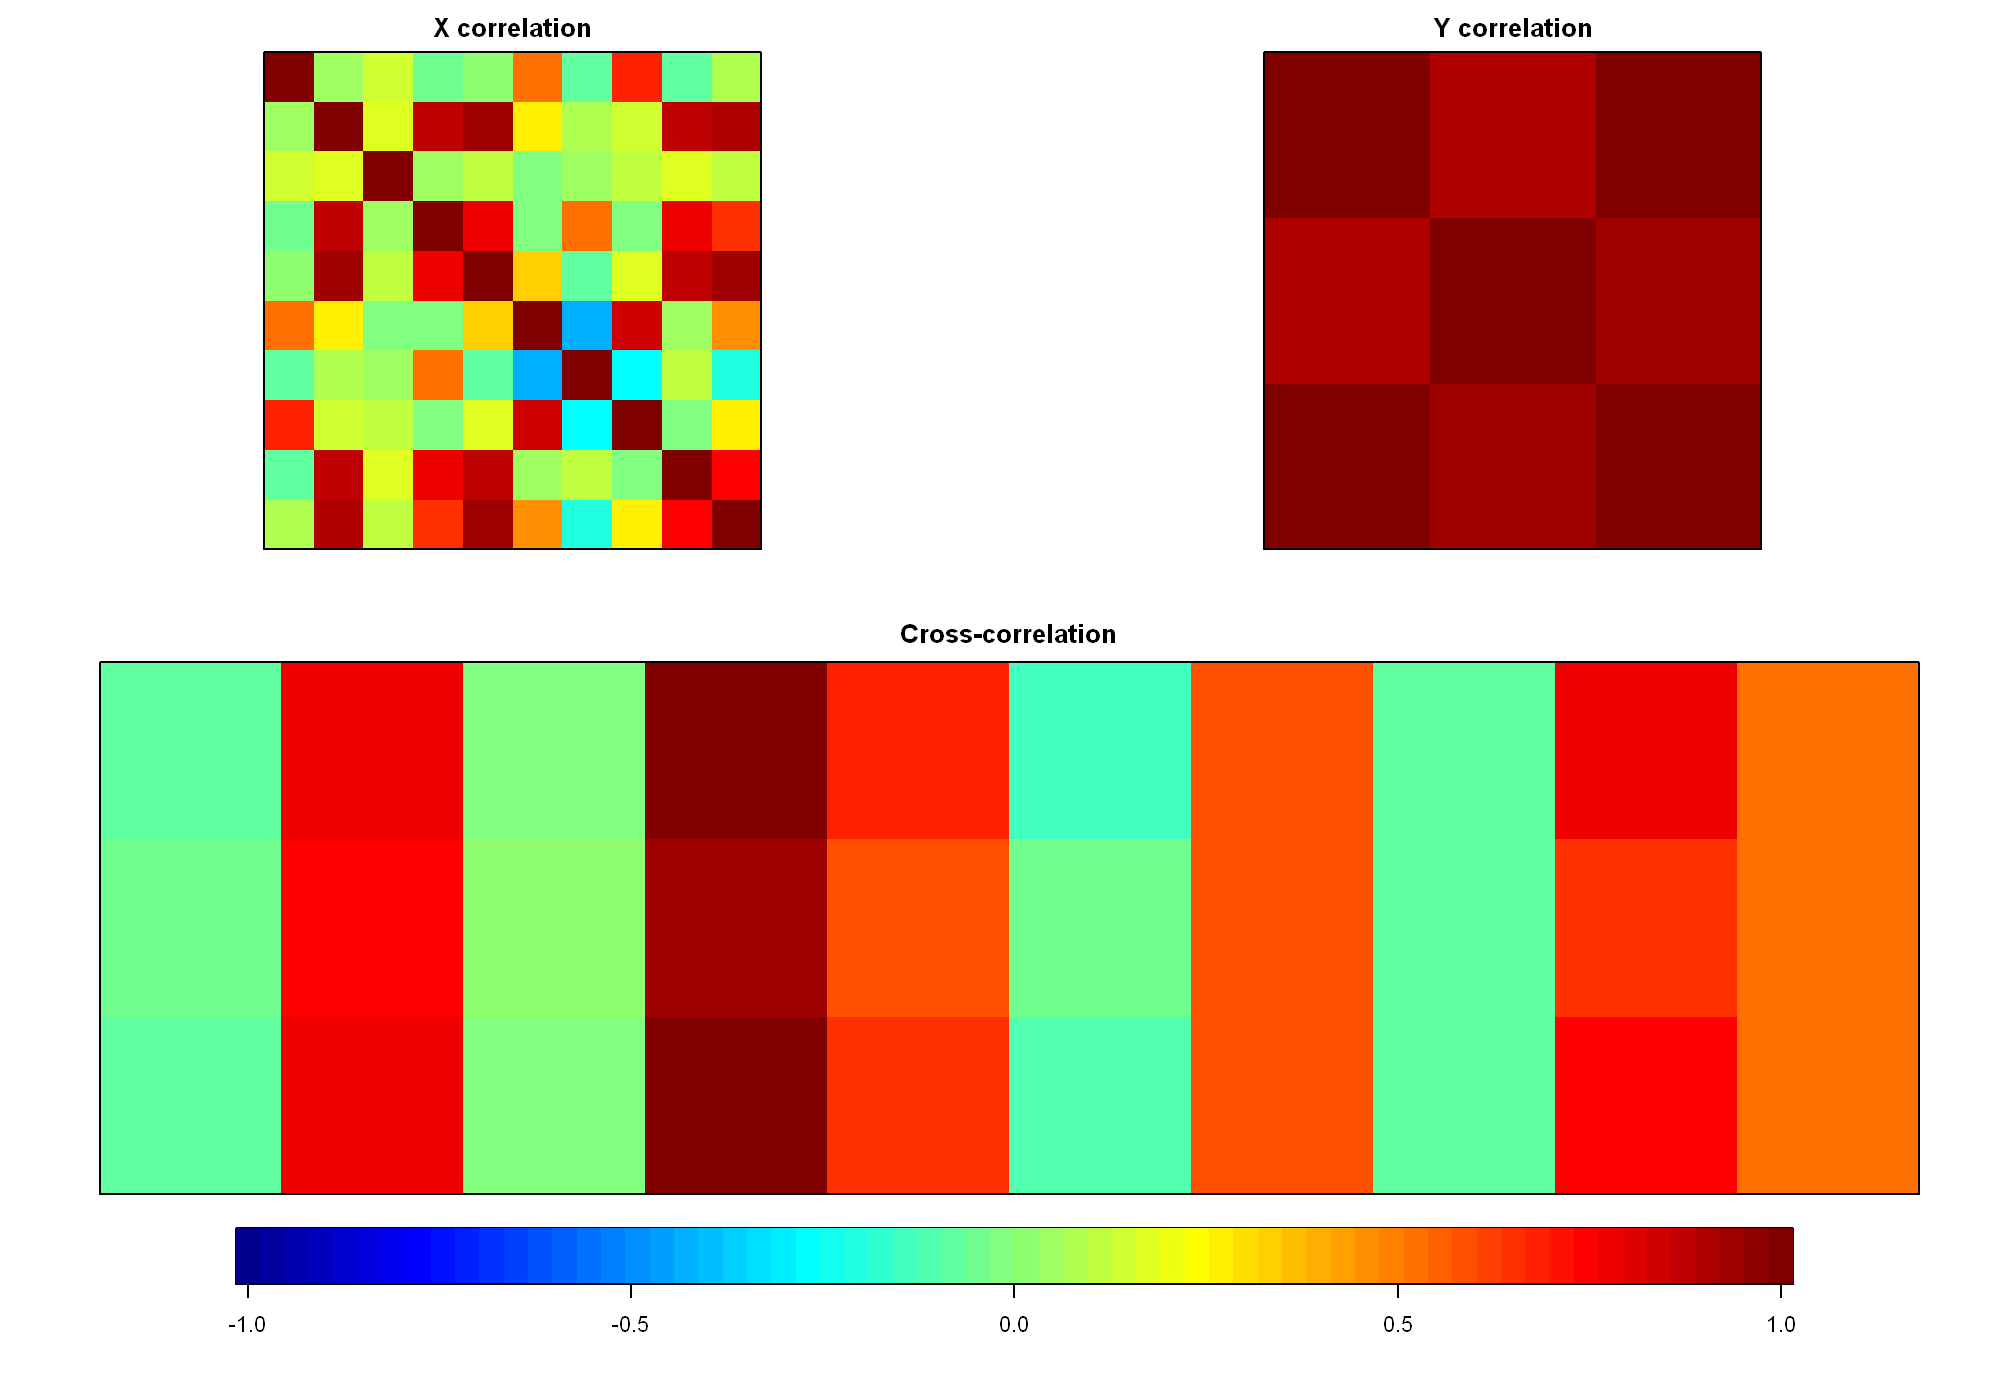

In [ ]:
img.matcor(matcor(X, Y ), type = 2)

## D. Uji Asumsi Normalitas

In [ ]:
mvn(X)
mvn(Y)

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 48.52523       0  NO

$univariateNormality
               Test      Variable Statistic   p value Normality
1  Anderson-Darling    CO.GT.     2501.1533  <0.001      NO    
2  Anderson-Darling  PT08.S1.CO.   355.4125  <0.001      NO    
3  Anderson-Darling   NMHC.GT.    2820.9492  <0.001      NO    
4  Anderson-Darling   C6H6.GT.    2272.5848  <0.001      NO    
5  Anderson-Darling PT08.S2.NMHC.  119.2082  <0.001      NO    
6  Anderson-Darling    NOx.GT.     188.7943  <0.001      NO    
7  Anderson-Darling PT08.S3.NOx.   159.0311  <0.001      NO    
8  Anderson-Darling    NO2.GT.     894.6616  <0.001      NO    
9  Anderson-Darling PT08.S4.NO2.   183.3416  <0.001      NO    
10 Anderson-Darling  PT08.S5.O3.    45.6823  <0.001      NO    

$Descriptives
                 n        Mean   Std.Dev Median  Min    Max   25th   75th
CO.GT.        9357  -34.207524  77.65717    1.5 -200   11.9    0.6    2.6
PT08.S1.CO.   9357 1048.990061 329.83271 1053.0 -200 2040.0  921.0 1221.0
NMHC.GT.      9357 -159.090093 139.78909 -200.0 -200 1189.0 -200.0 -200.0
C6H6.GT.      9357    1.865683  41.38021    7.9 -200   63.7    4.0   13.6
PT08.S2.NMHC. 9357  894.595276 342.33325  895.0 -200 2214.0  711.0 1105.0
NOx.GT.       9357  168.616971 257.43387  141.0 -200 1479.0   50.0  284.0
PT08.S3.NOx.  9357  794.990168 321.99355  794.0 -200 2683.0  637.0  960.0
NO2.GT.       9357   58.148873 126.94046   96.0 -200  340.0   53.0  133.0
PT08.S4.NO2.  9357 1391.479641 467.21012 1446.0 -200 2775.0 1185.0 1662.0
PT08.S5.O3.   9357  975.072032 456.93818  942.0 -200 2523.0  700.0 1255.0
                     Skew   Kurtosis
CO.GT.        -1.66564534  0.7764412
PT08.S1.CO.   -1.72095155  5.8312880
NMHC.GT.       4.07447779 18.8484336
C6H6.GT.      -4.50731741 19.1730172
PT08.S2.NMHC. -0.79318027  2.3670340
NOx.GT.        0.82496763  1.5030090
PT08.S3.NOx.  -0.38463642  3.1012216
NO2.GT.       -1.22523671  0.2741107
PT08.S4.NO2.  -1.24371109  3.2633022
PT08.S5.O3.   -0.03465077  0.6365370

$multivariateNormality
           Test      HZ p value MVN
1 Henze-Zirkler 466.857       0  NO

$univariateNormality
              Test  Variable Statistic   p value Normality
1 Anderson-Darling     T      2041.459  <0.001      NO    
2 Anderson-Darling    RH      1329.045  <0.001      NO    
3 Anderson-Darling    AH      2383.691  <0.001      NO    

$Descriptives
      n      Mean  Std.Dev  Median  Min    Max    25th   75th      Skew
T  9357  9.778305 43.20362 17.2000 -200 44.600 10.9000 24.100 -4.444042
RH 9357 39.485380 51.21614 48.6000 -200 88.700 34.1000 61.900 -3.931147
AH 9357 -1.673907 40.53292  0.9768 -200 21.806  0.6923 12.461 -4.557481
   Kurtosis
T  18.75948
RH 15.75108
AH 19.42985

## E. Korelasi Kanonik

### Dengan Menggunakan Library

In [ ]:
cancor(X, Y) #default function from stats library
can.air = cc(X, Y)


Canonical correlation analysis of:
	 10   X  variables:  CO.GT., PT08.S1.CO., NMHC.GT., C6H6.GT., PT08.S2.NMHC., NOx.GT., PT08.S3.NOx., NO2.GT., PT08.S4.NO2., PT08.S5.O3. 
  with	 3   Y  variables:  T, RH, AH 

    CanR  CanRSQ    Eigen  percent    cum                          scree
1 0.9975 0.99506 201.2308 99.60889  99.61 ******************************
2 0.6521 0.42520   0.7397  0.36616  99.98                               
3 0.2190 0.04798   0.0504  0.02495 100.00                               

Test of H0: The canonical correlations in the 
current row and all that follow are zero

     CanR LR test stat approx F numDF denDF   Pr(> F)    
1 0.99752      0.00271   5938.3    30 27427 < 2.2e-16 ***
2 0.65207      0.54722    365.3    18 18690 < 2.2e-16 ***
3 0.21904      0.95202     58.9     8  9346 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

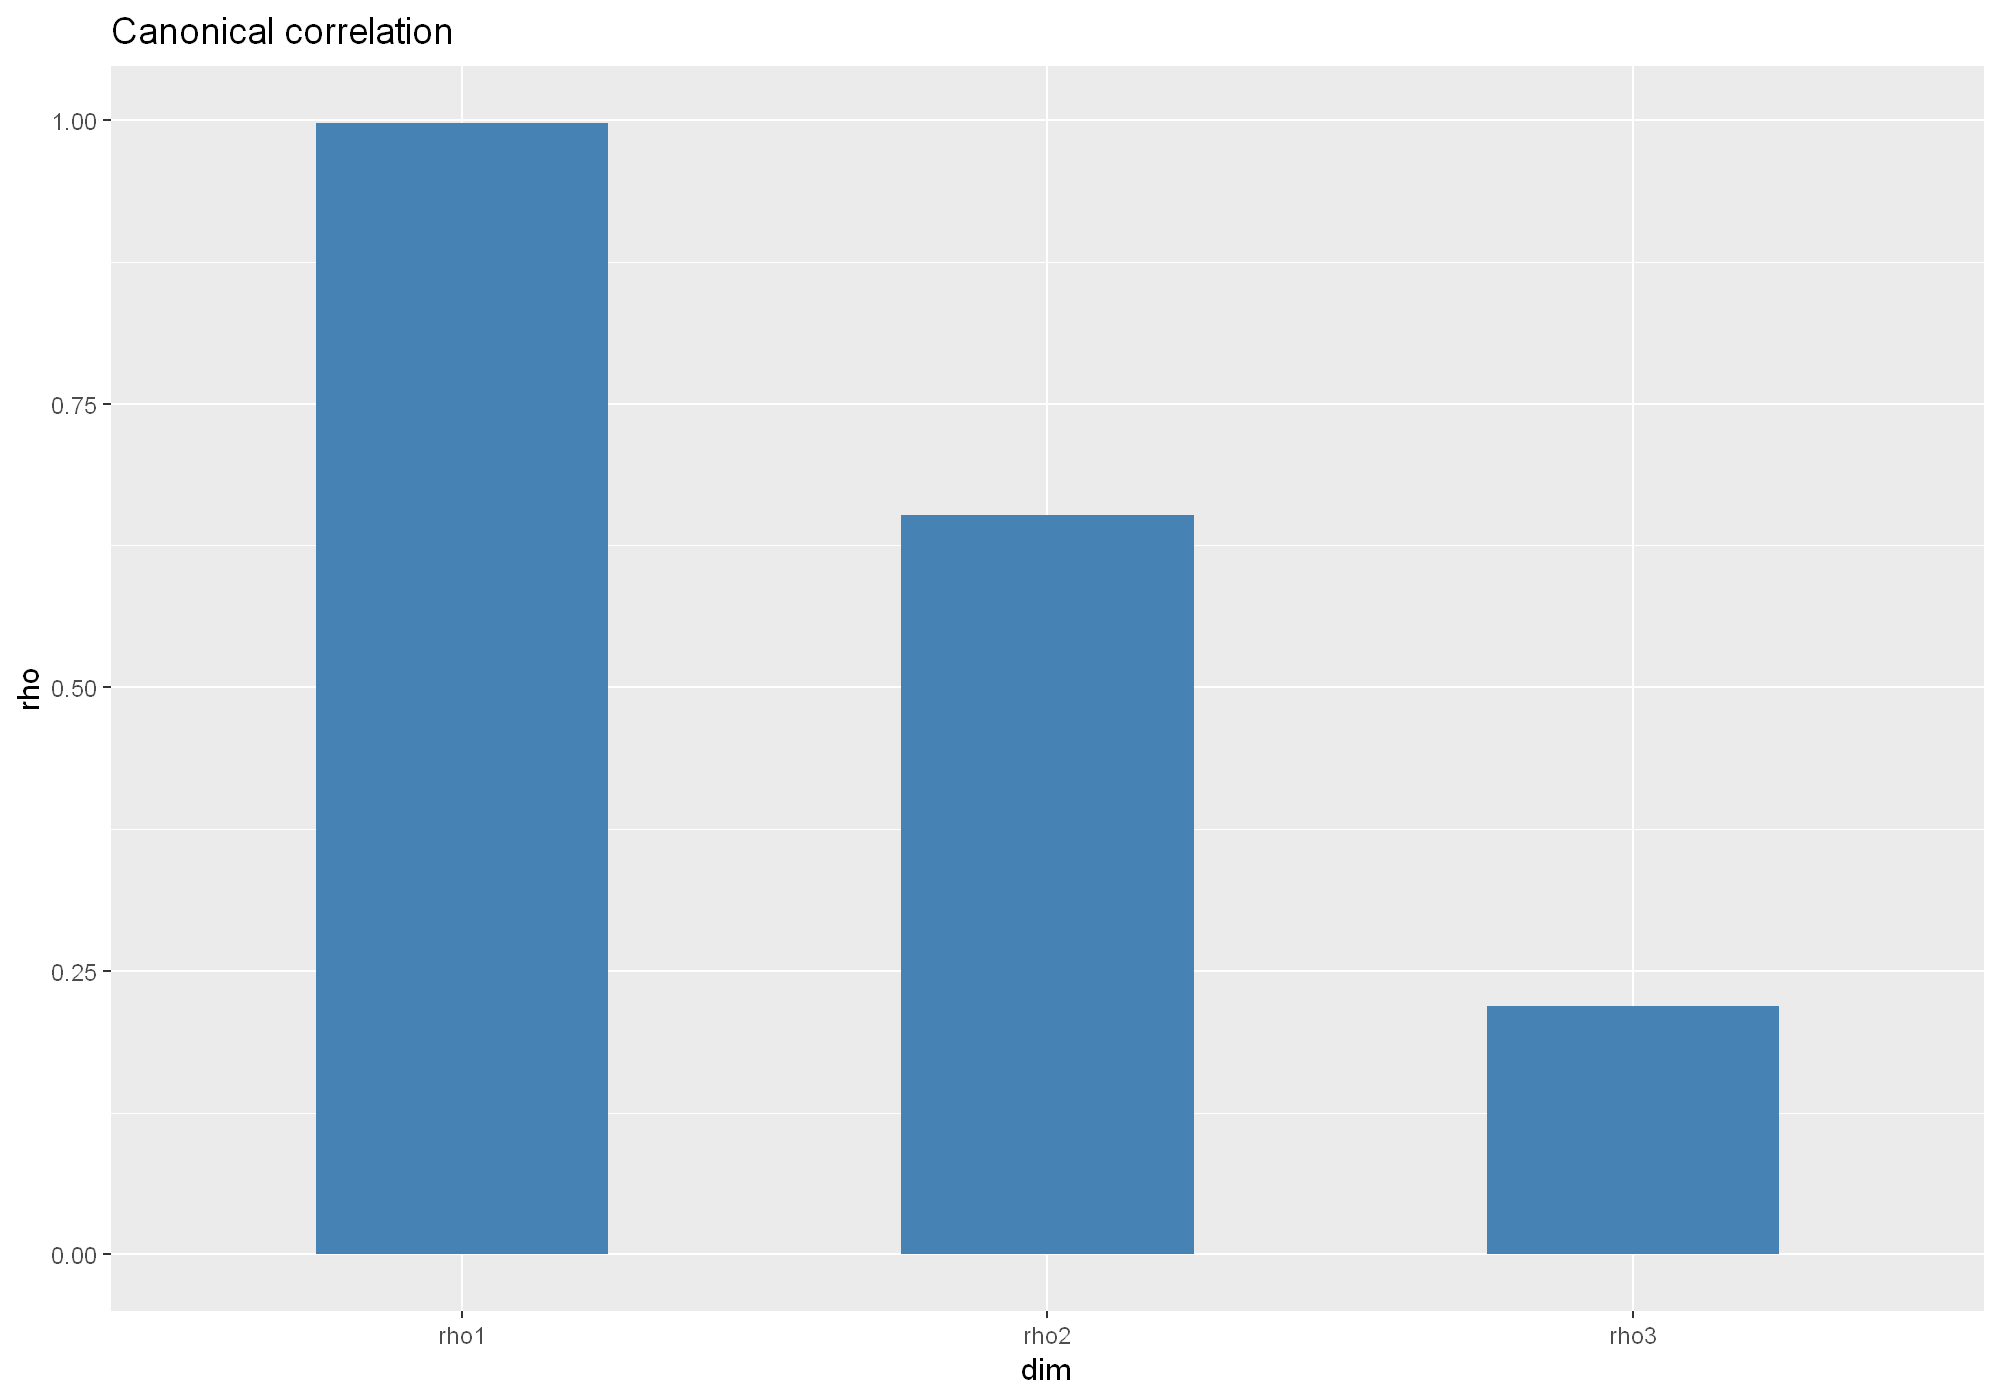

In [ ]:
can.coef = data.frame(rho = can.air$cor, dim = c("rho1", "rho2", "rho3"))
ggplot(can.coef, aes(x = dim, y = rho)) + geom_bar(stat = "identity", width = 0.5, fill = "steel blue") +
  labs(title = "Canonical correlation")

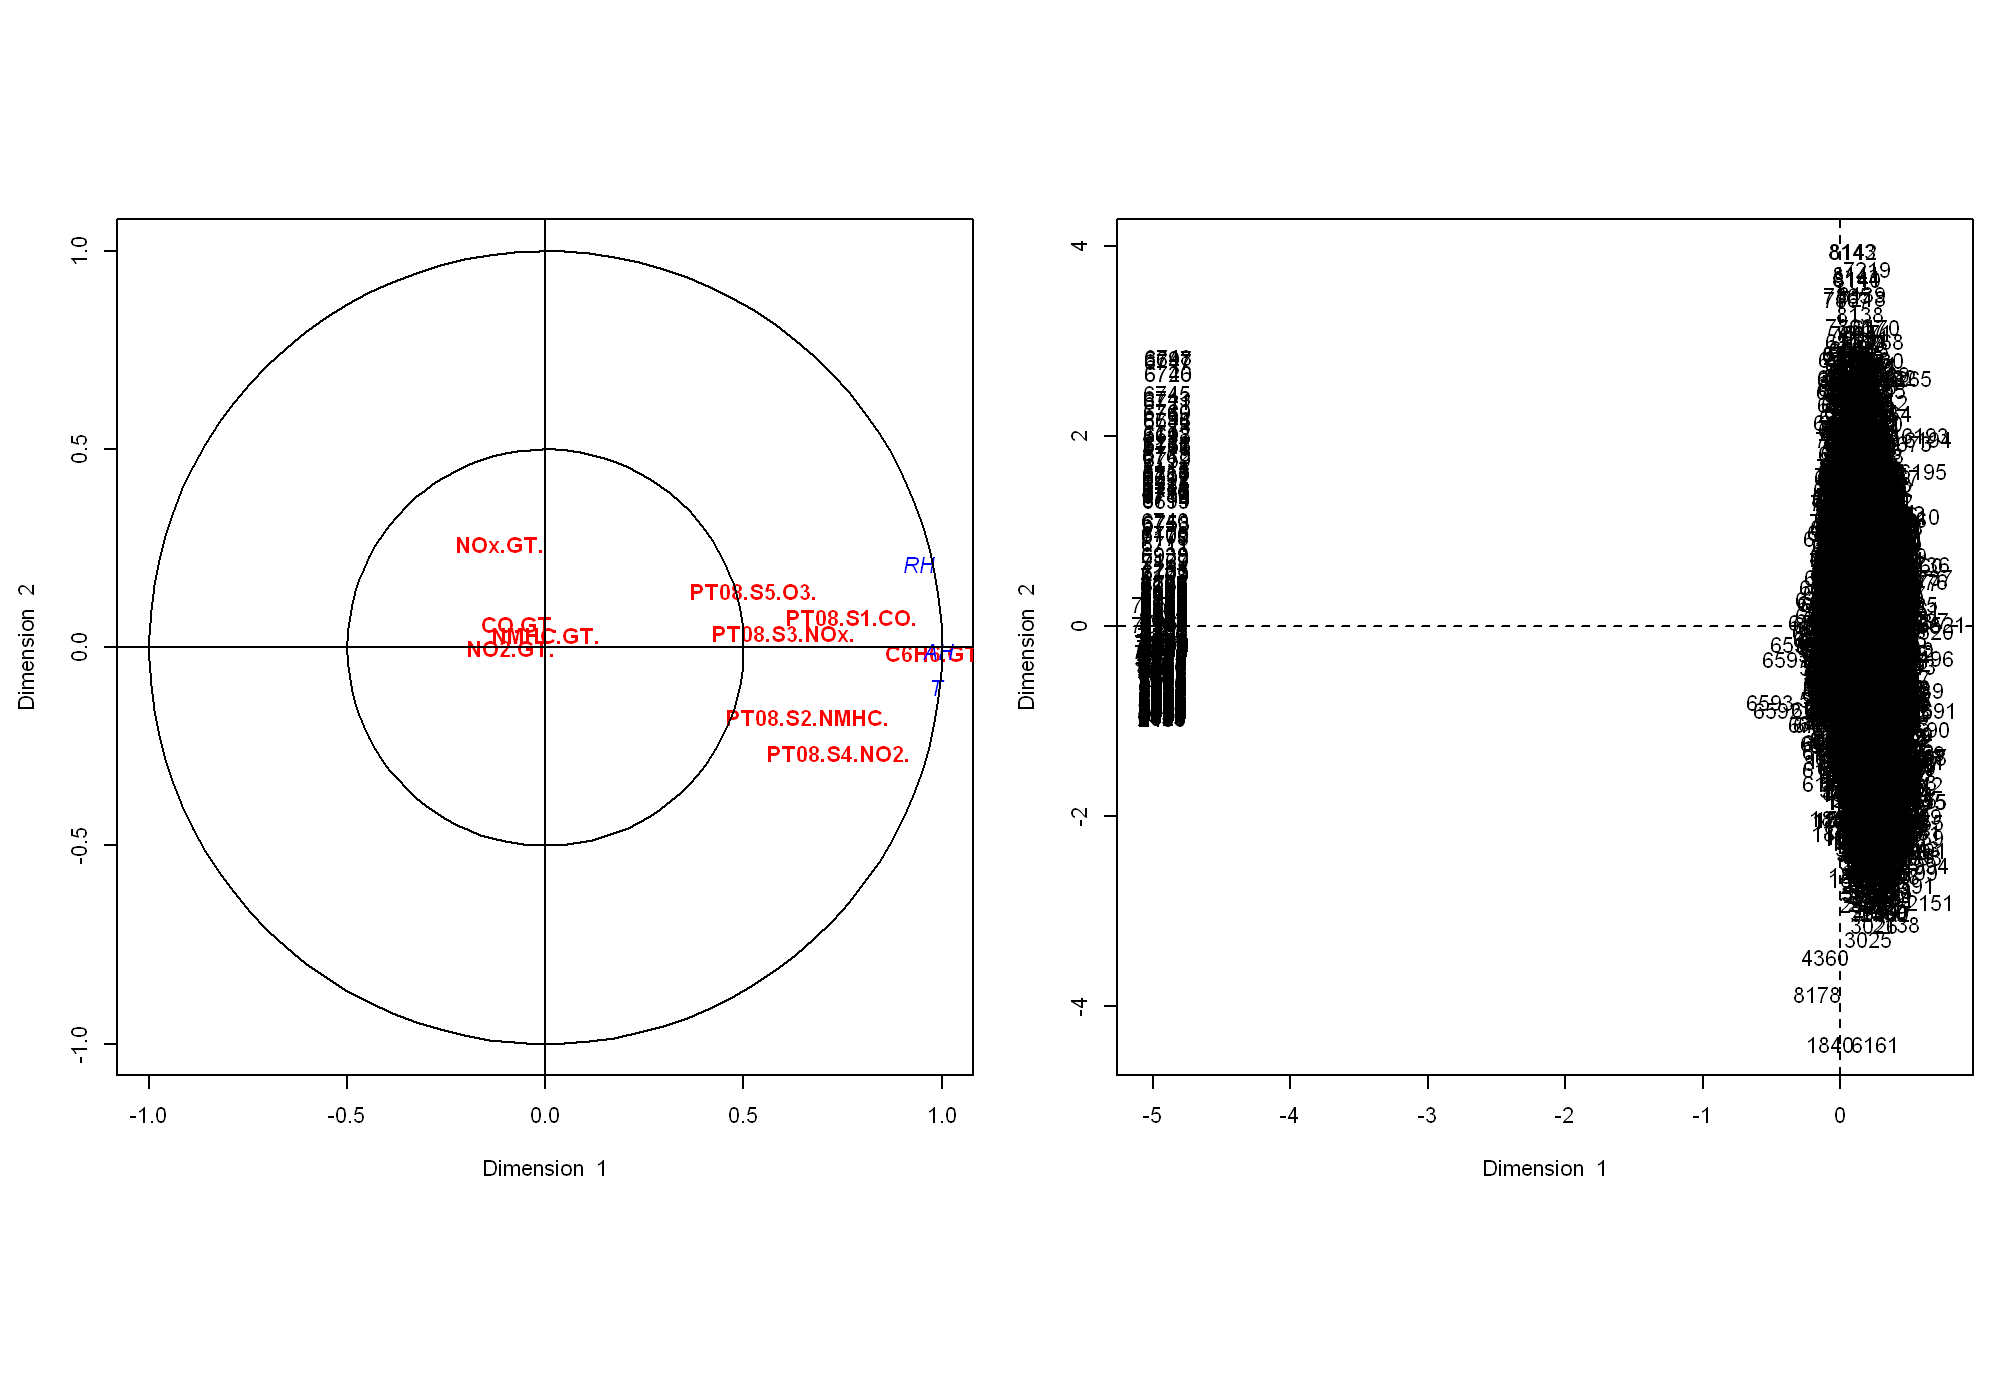

In [ ]:
plt.cc(can.air, var.label = TRUE)

### Dengan Manual

In [ ]:
rxx = cor(X)
ryy = cor(Y)
rxy = cor(X, Y)
ryx = cor(Y, X)

In [ ]:
#Following formula from Rencher (2012), we are going to compute multiplication of inverse and the partition
#matrix above. That is : Rxx^-1 * Rxy * Ryy^-1 * Ryx #Buku pers 11.10 ke bawah
rho.mat = solve(rxx)%*%rxy%*%solve(ryy)%*%ryx

In [ ]:
#Eigen values of the resulting matrix is the squared canonical correlations that we are interested in
sq.rho = eigen(rho.mat)$values #squared canonical correlations

In [ ]:
#canonical correlations
sqrt(sq.rho)

[1] 9.975245e-01+0.000000e+00i 6.520720e-01+0.000000e+00i
 [3] 2.190423e-01+0.000000e+00i 0.000000e+00+2.221150e-08i
 [5] 1.571093e-08+0.000000e+00i 1.429838e-08+5.771234e-09i
 [7] 1.429838e-08-5.771234e-09i 0.000000e+00+1.049256e-08i
 [9] 3.512485e-10+4.837271e-09i 3.512485e-10-4.837271e-09i

## F. Uji Hipotesis Independensi

### Dengan Menggunakan Library

In [ ]:
ccan <- candisc::cancor(X,Y)
summary(ccan) #11.4 raw canonical -> a' nya


Canonical correlation analysis of:
	 10   X  variables:  CO.GT., PT08.S1.CO., NMHC.GT., C6H6.GT., PT08.S2.NMHC., NOx.GT., PT08.S3.NOx., NO2.GT., PT08.S4.NO2., PT08.S5.O3. 
  with	 3   Y  variables:  T, RH, AH 

    CanR  CanRSQ    Eigen  percent    cum                          scree
1 0.9975 0.99506 201.2308 99.60889  99.61 ******************************
2 0.6521 0.42520   0.7397  0.36616  99.98                               
3 0.2190 0.04798   0.0504  0.02495 100.00                               

Test of H0: The canonical correlations in the 
current row and all that follow are zero

     CanR LR test stat approx F numDF denDF   Pr(> F)    
1 0.99752      0.00271   5938.3    30 27427 < 2.2e-16 ***
2 0.65207      0.54722    365.3    18 18690 < 2.2e-16 ***
3 0.21904      0.95202     58.9     8  9346 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Raw canonical coefficients

   X  variables: 
                    Xcan1       Xcan2      Xcan3
CO.GT.     

 - korelasi kanonik signifikan dengan nol
 - set variabel x dan y beruhubungan signifikan

In [ ]:
p.asym(can.air$cor, dim(X)[1], length(X), length(Y), tstat = "Hotelling")
p.asym(can.air$cor, dim(X)[1], length(X), length(Y),tstat = "Pillai")
p.asym(can.air$cor, dim(X)[1], length(X), length(Y),tstat = "Roy")
p.asym(can.air$cor, dim(X)[1], length(X), length(Y),tstat = "Wilks")

 Hotelling-Lawley Trace, using F-approximation:
                 stat      approx df1   df2 p.value
1 to 3:  202.02095295 62913.81410  30 28028       0
2 to 3:    0.79012667   410.19280  18 28034       0
3 to 3:    0.05039757    58.88116   8 28040       0
 Pillai-Bartlett Trace, using F-approximation:
               stat    approx df1   df2 p.value
1 to 3:  1.46823254 895.83449  30 28038       0
2 to 3:  0.47317738 291.75390  18 28044       0
3 to 3:  0.04797952  56.98747   8 28050       0
 Roy's Largest Root, using F-approximation:
              stat   approx df1  df2 p.value
1 to 1:  0.9950552 627370.6   3 9353       0

 F statistic for Roy's Greatest Root is an upper bound.
Wilks' Lambda, using F-approximation (Rao's F):
                stat     approx df1      df2 p.value
1 to 3:  0.002705935 5938.27690  30 27427.16       0
2 to 3:  0.547223405  365.30256  18 18690.00       0
3 to 3:  0.952020483   58.87696   8  9346.00       0


### Dengan Manual

In [ ]:
#Approach with f distribution
#Testing overall significance can also be made based only upon correlation matrix
wilk.gl = det(cor(datafinal))/(det(cor(X))*det(cor(Y))) #pake matriks korelasi

wf = dim(datafinal)[1]-(dim(X)[2]+dim(Y)[2]+3)/2
tf = sqrt((dim(X)[2]^2*dim(Y)[2]^2-4)/(dim(X)[2]^2+dim(Y)[2]^2-5))
df1 = dim(X)[2]*dim(Y)[2]
df2 = wf*tf-df1/2+1
ap.f = (1-wilk.gl^(1/tf))*df2/(wilk.gl^(1/tf)*df1)

wilk.gl
pf(ap.f, df1, df2, lower.tail = FALSE) #pvalue for f distribution approach

[1] 0.002705935

[1] 0

In [ ]:
wilk.gl = prod(1-sq.rho)
pillai.gl = sum(sq.rho)
hotel.gl = sum(sq.rho/(1-sq.rho))

hotel.gl
pillai.gl
wilk.gl

[1] 202.021+0i

[1] 1.468233+0i

[1] 0.002705935+0i

In [ ]:
#For roy test, it is basically only testing significance with 1st dimension.
#Extension for testing succeeding dimensions can be made by modifying the formula based on eigen values
wilk.gl2 = prod(1-sq.rho[-1]) #testing dimension 2 to 3
wilk.gl2

[1] 0.5472234+0i

## G. Koefisien Fungsi Kanonik/Canonical Variates

In [ ]:
coef(ccan, type="both", standardize=FALSE)

,Xcan1,Xcan2,Xcan3
CO.GT.,5.011969e-05,2.621620e-04,0.001141472
PT08.S1.CO.,-6.654716e-05,3.620302e-03,-0.006806494
NMHC.GT.,-1.430055e-04,8.087694e-04,-0.001996911
C6H6.GT.,3.013952e-02,1.387751e-02,0.068816630
PT08.S2.NMHC.,-1.351607e-03,-8.396481e-03,-0.005282703
NOx.GT.,4.702417e-05,3.870728e-03,0.001867508
PT08.S3.NOx.,-3.105477e-04,-4.094131e-04,-0.004509376
NO2.GT.,-1.090667e-04,-6.348762e-03,-0.003673944
PT08.S4.NO2.,4.813099e-04,-1.306711e-05,0.002057076
PT08.S5.O3.,-4.134270e-05,2.257718e-03,0.001286801


In [ ]:
# standardized coefficients
coef(ccan, type="both", standardize=TRUE)

,Xcan1,Xcan2,Xcan3
CO.GT.,0.003892153,0.020358762,0.0886435
PT08.S1.CO.,-0.021949429,1.194094146,-2.2450043
NMHC.GT.,-0.019990610,0.113057139,-0.2791463
C6H6.GT.,1.247179386,0.574254200,2.8476464
PT08.S2.NMHC.,-0.462699981,-2.874394498,-1.8084448
NOx.GT.,0.012105614,0.996456359,0.4807598
PT08.S3.NOx.,-0.099994343,-0.131828387,-1.4519900
NO2.GT.,-0.013844973,-0.805914764,-0.4663722
PT08.S4.NO2.,0.224872856,-0.006105085,0.9610867
PT08.S5.O3.,-0.018891060,1.031637387,0.5879885


# Clustering Analysis

# Analisis Kluster

## A. Import Library dan Data

### 1. Import Library

In [ ]:
packages <- c("Hmisc", "matlib", "Matrix","expm","matrixcalc","ellipsis","Hotelling","dplyr","psych","RcmdrMisc","Rcsdp","mvnormtest","factoextra","cluster","ggplot2","tibble","NbClust","ClustOfVar")
if ( length(missing_pkgs <- setdiff(packages, rownames(installed.packages()))) > 0) {
  message("Installing missing package(s): ", paste(missing_pkgs, collapse = ", "))
  install.packages(missing_pkgs)
}
lapply(packages, library, character.only = TRUE)

[[1]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[2]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[3]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[4]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[5]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[6]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[7]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[8]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[9]]
 [1] "ClustOfVar" "NbClust"    "tibble"     "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survi

### 2. Import Data

In [ ]:
data <- read.table("sobar72.csv", header=TRUE, sep=",")
data <- as.matrix(data[1:19])
head(data) #data kangker serviks

behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8
10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4
10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15
10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4
8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7
10,14,8,6,15,8,10,1,3,4,2,14,8,7,2,7,13,9,6


## B. Preprocessing Data

### 1. Standarisasi Data

In [ ]:
datanew <- scale(data)
head(datanew)

behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
0.2808717,0.0882285,0.30214667,-1.42533462,-2.6730651,1.1947676,0.9163363,-1.151311,-0.09905318,-0.3540692,-0.7024641,0.4200606,-0.4102368,-0.7299311,0.28762379,0.3764637,0.3339617,0.40186665,-0.5081748
0.2808717,-0.7587651,-0.02746788,0.76592714,0.2749104,-0.1185647,-1.0629501,1.015863,-0.71035282,-1.0557109,-0.9965189,0.7318582,0.8002981,-0.2585854,-0.05752476,-1.2452262,-1.2690545,-1.27202419,-1.4005792
0.2808717,0.9352221,-2.66438430,-2.15575520,0.2749104,0.5381014,0.9163363,-1.151311,-0.91411936,-0.3540692,-0.9965189,-1.7625224,-1.6207717,-1.2012767,-0.05752476,0.1447937,-1.7270592,-1.51115145,1.0535330
0.2808717,-0.7587651,-0.35708243,0.76592714,0.6960498,-0.1185647,-1.0629501,-1.151311,-0.71035282,-1.0557109,-0.9965189,0.7318582,0.8002981,-0.2585854,-0.74782184,-1.4768962,-1.4980569,-1.27202419,-1.4005792
-1.4043583,-0.7587651,-1.34592609,0.03550656,-1.4096470,-0.1185647,-0.4031880,-1.151311,-0.71035282,-1.2895915,-0.9965189,0.7318582,-1.1365577,-1.2012767,-0.05752476,0.3764637,-1.2690545,-1.27202419,-0.7312759
0.2808717,0.5117253,-1.01631154,-0.69491403,0.6960498,0.5381014,0.9163363,-1.151311,-1.11788591,-1.0557109,-0.9965189,0.4200606,-0.4102368,-0.2585854,-1.43811893,-0.7818862,0.5629640,-0.07638788,-0.9543770


### 2. Dissimilarity matrix

#### Euclidean Distance

In [ ]:
dist_data_euc <- dist(datanew, method="euclidean")
dist(datanew, method="euclidean")

           1         2         3         4         5         6         7
2   6.025901                                                            
3   6.074059  7.009447                                                  
4   6.094742  2.359082  6.633271                                        
5   4.603539  4.566632  5.304614  4.281029                              
6   4.568646  4.773170  5.192080  4.134763  4.638993                    
7   6.617594  5.403798  4.634175  5.716588  5.473894  5.199341          
8   5.818105  4.928845  6.473883  5.448031  4.803268  5.117842  5.200128
9   5.861819  7.203653  5.876030  7.117532  6.947512  5.352856  6.218941
10  5.952587  5.005300  5.947272  5.396928  3.821007  5.005974  5.411228
11  6.568337  6.510186  4.876541  6.347303  4.864182  5.788372  5.418083
12  5.036607  5.012707  4.381560  4.621810  3.731245  3.441444  4.845460
13  6.288964  6.650751  5.509122  6.346141  5.873665  4.806355  5.407676
14  5.299484  4.674464  6.938215  5.159958  5.22535

#### Manhattan Distance

In [ ]:
dist(datanew, method="manhattan")

           1         2         3         4         5         6         7
2  21.512462                                                            
3  19.234737 23.360526                                                  
4  21.247012  4.068897 21.977842                                        
5  16.732910 13.650023 17.381179 12.725343                              
6  13.021583 16.192098 17.234739 13.044545 16.509566                    
7  23.195776 16.916708 12.088935 18.487777 19.574484 16.827447          
8  21.279559 17.416937 23.707868 19.446011 16.560580 17.535509 18.940098
9  19.962043 26.182668 17.076889 24.415710 25.499075 16.486161 18.776897
10 23.107083 16.232522 19.994577 17.803591 12.373134 15.427409 17.227806
11 22.455963 21.151332 14.382549 20.226653 14.684409 18.798536 17.565813
12 15.360211 15.754574 11.176708 13.987616 10.701537 11.112900 14.359972
13 19.940329 22.252090 15.904450 19.763767 19.439400 13.707458 15.669215
14 18.177304 16.151110 23.547575 17.210555 16.96365

## C. Hierarchical Clustering

### 1. Single Linkage

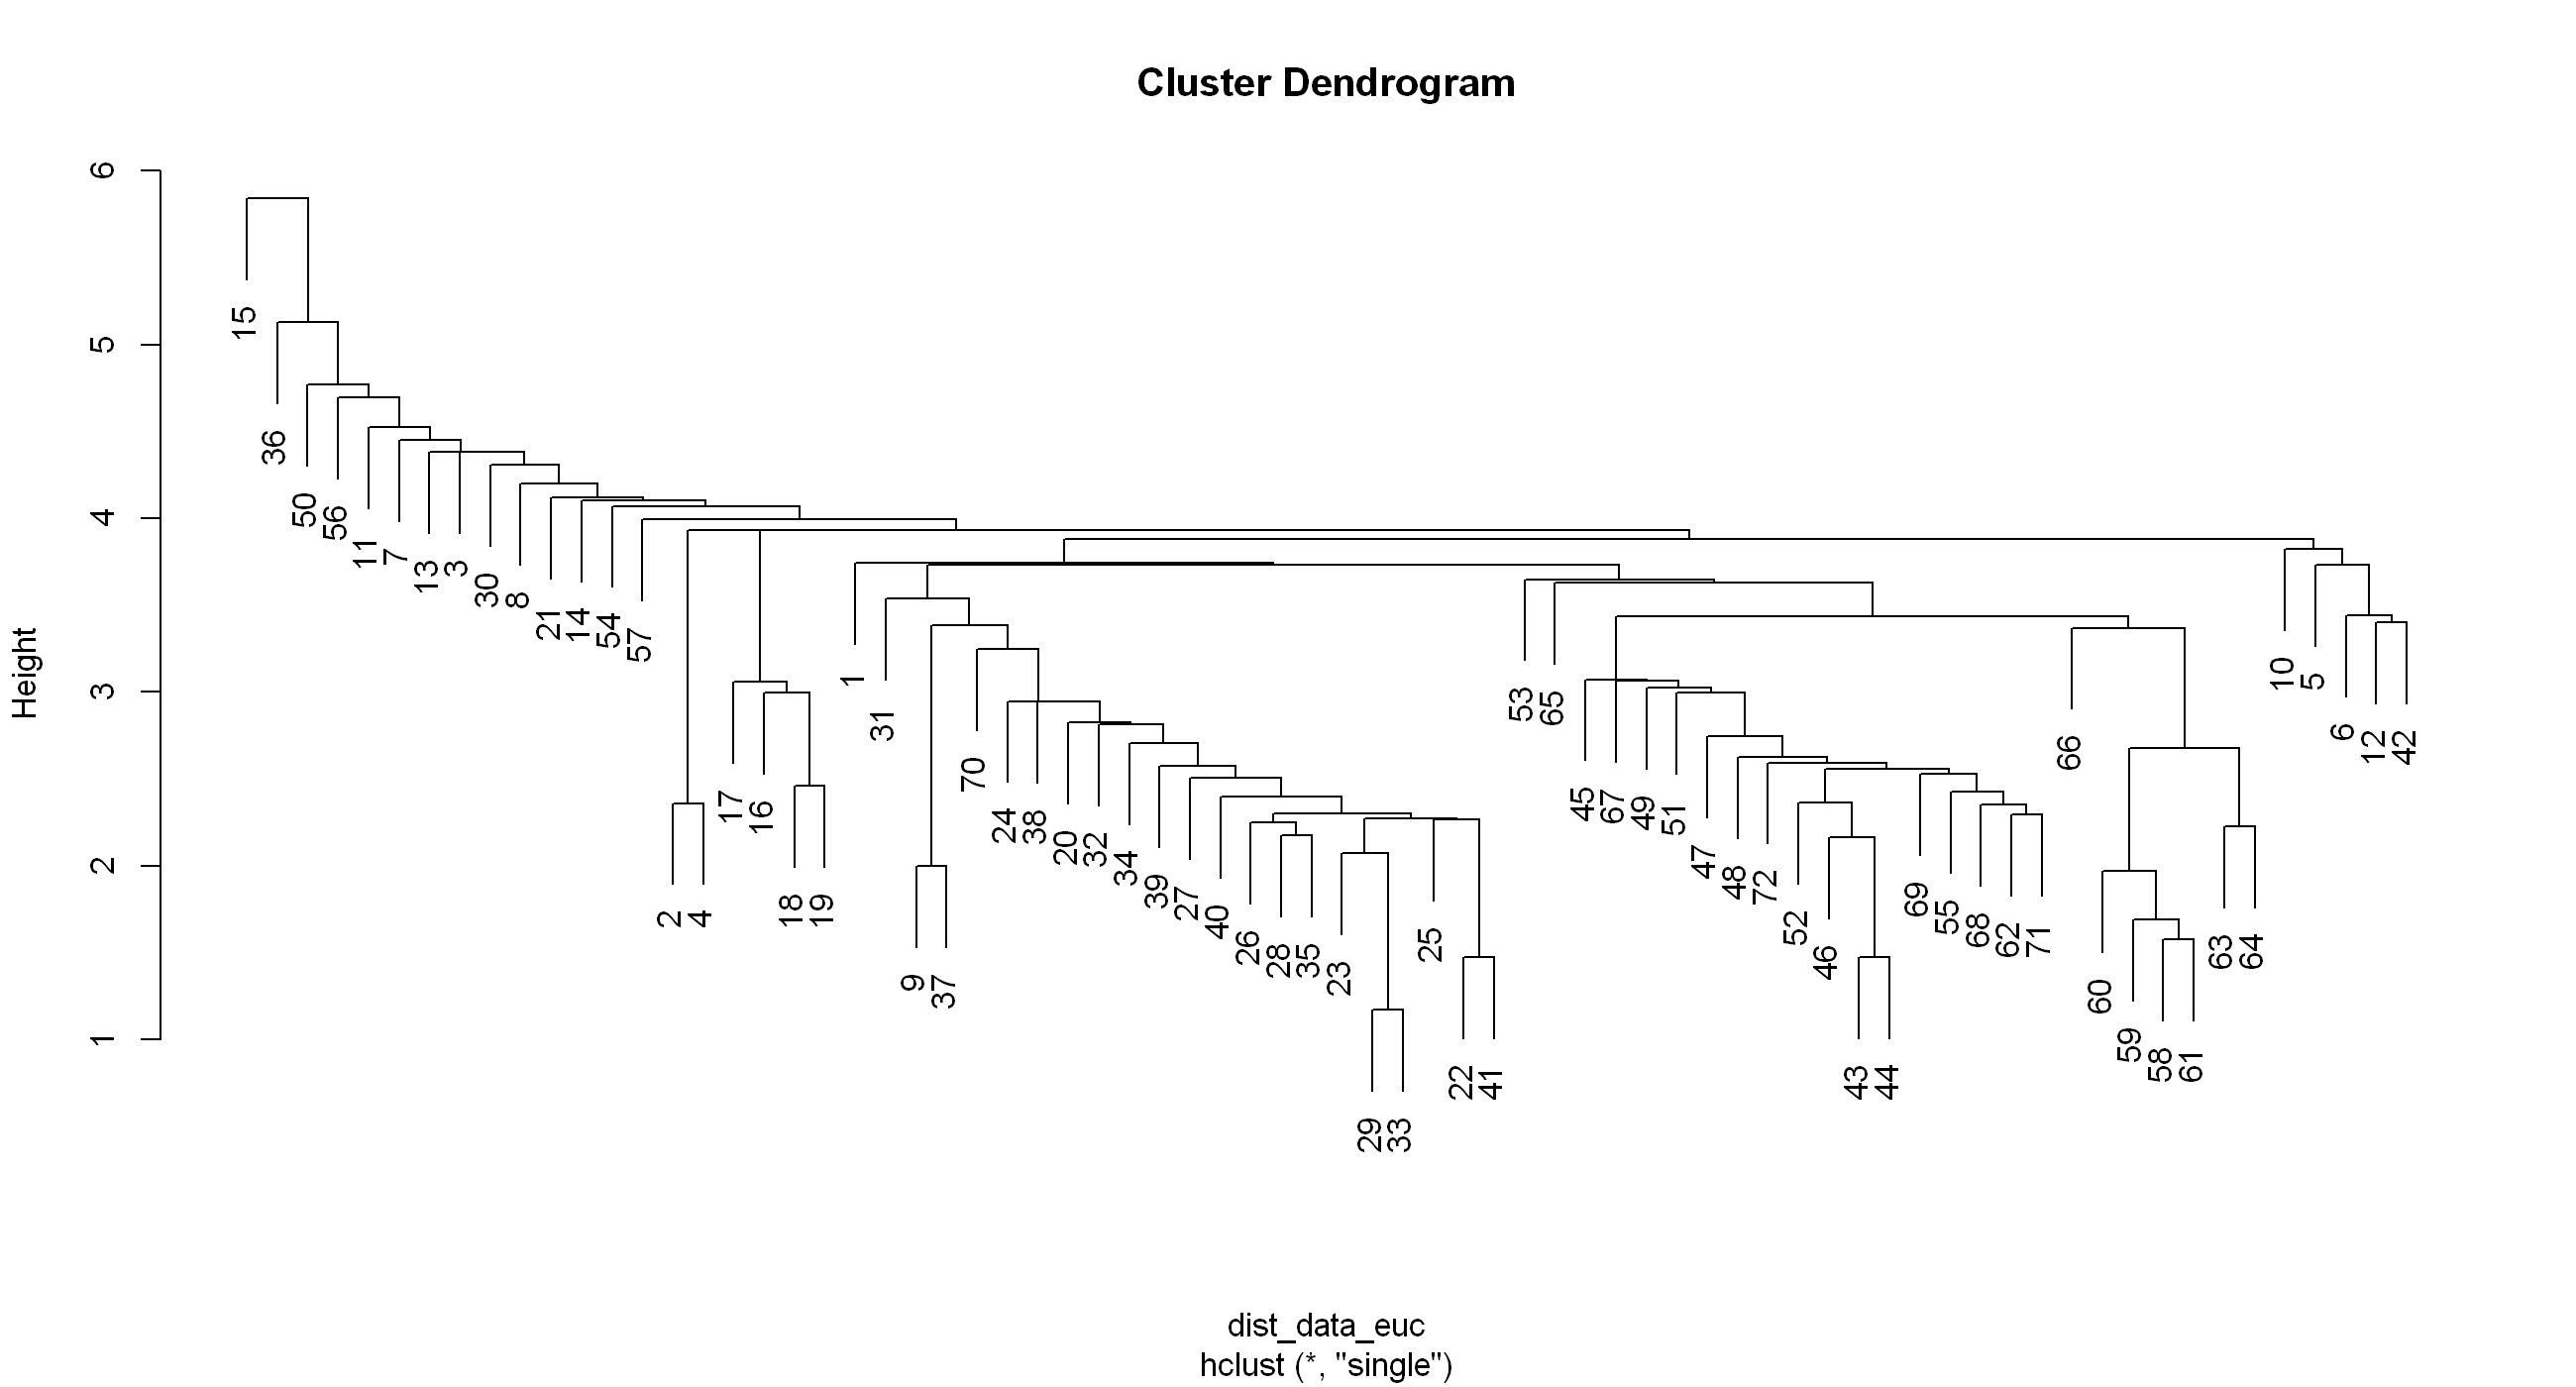

In [ ]:
options(repr.plot.width = 13, repr.plot.height = 7, repr.plot.res = 200)

sin_hc <- hclust(dist_data_euc, method="single")
plot(hclust(dist_data_euc, method="single"))

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


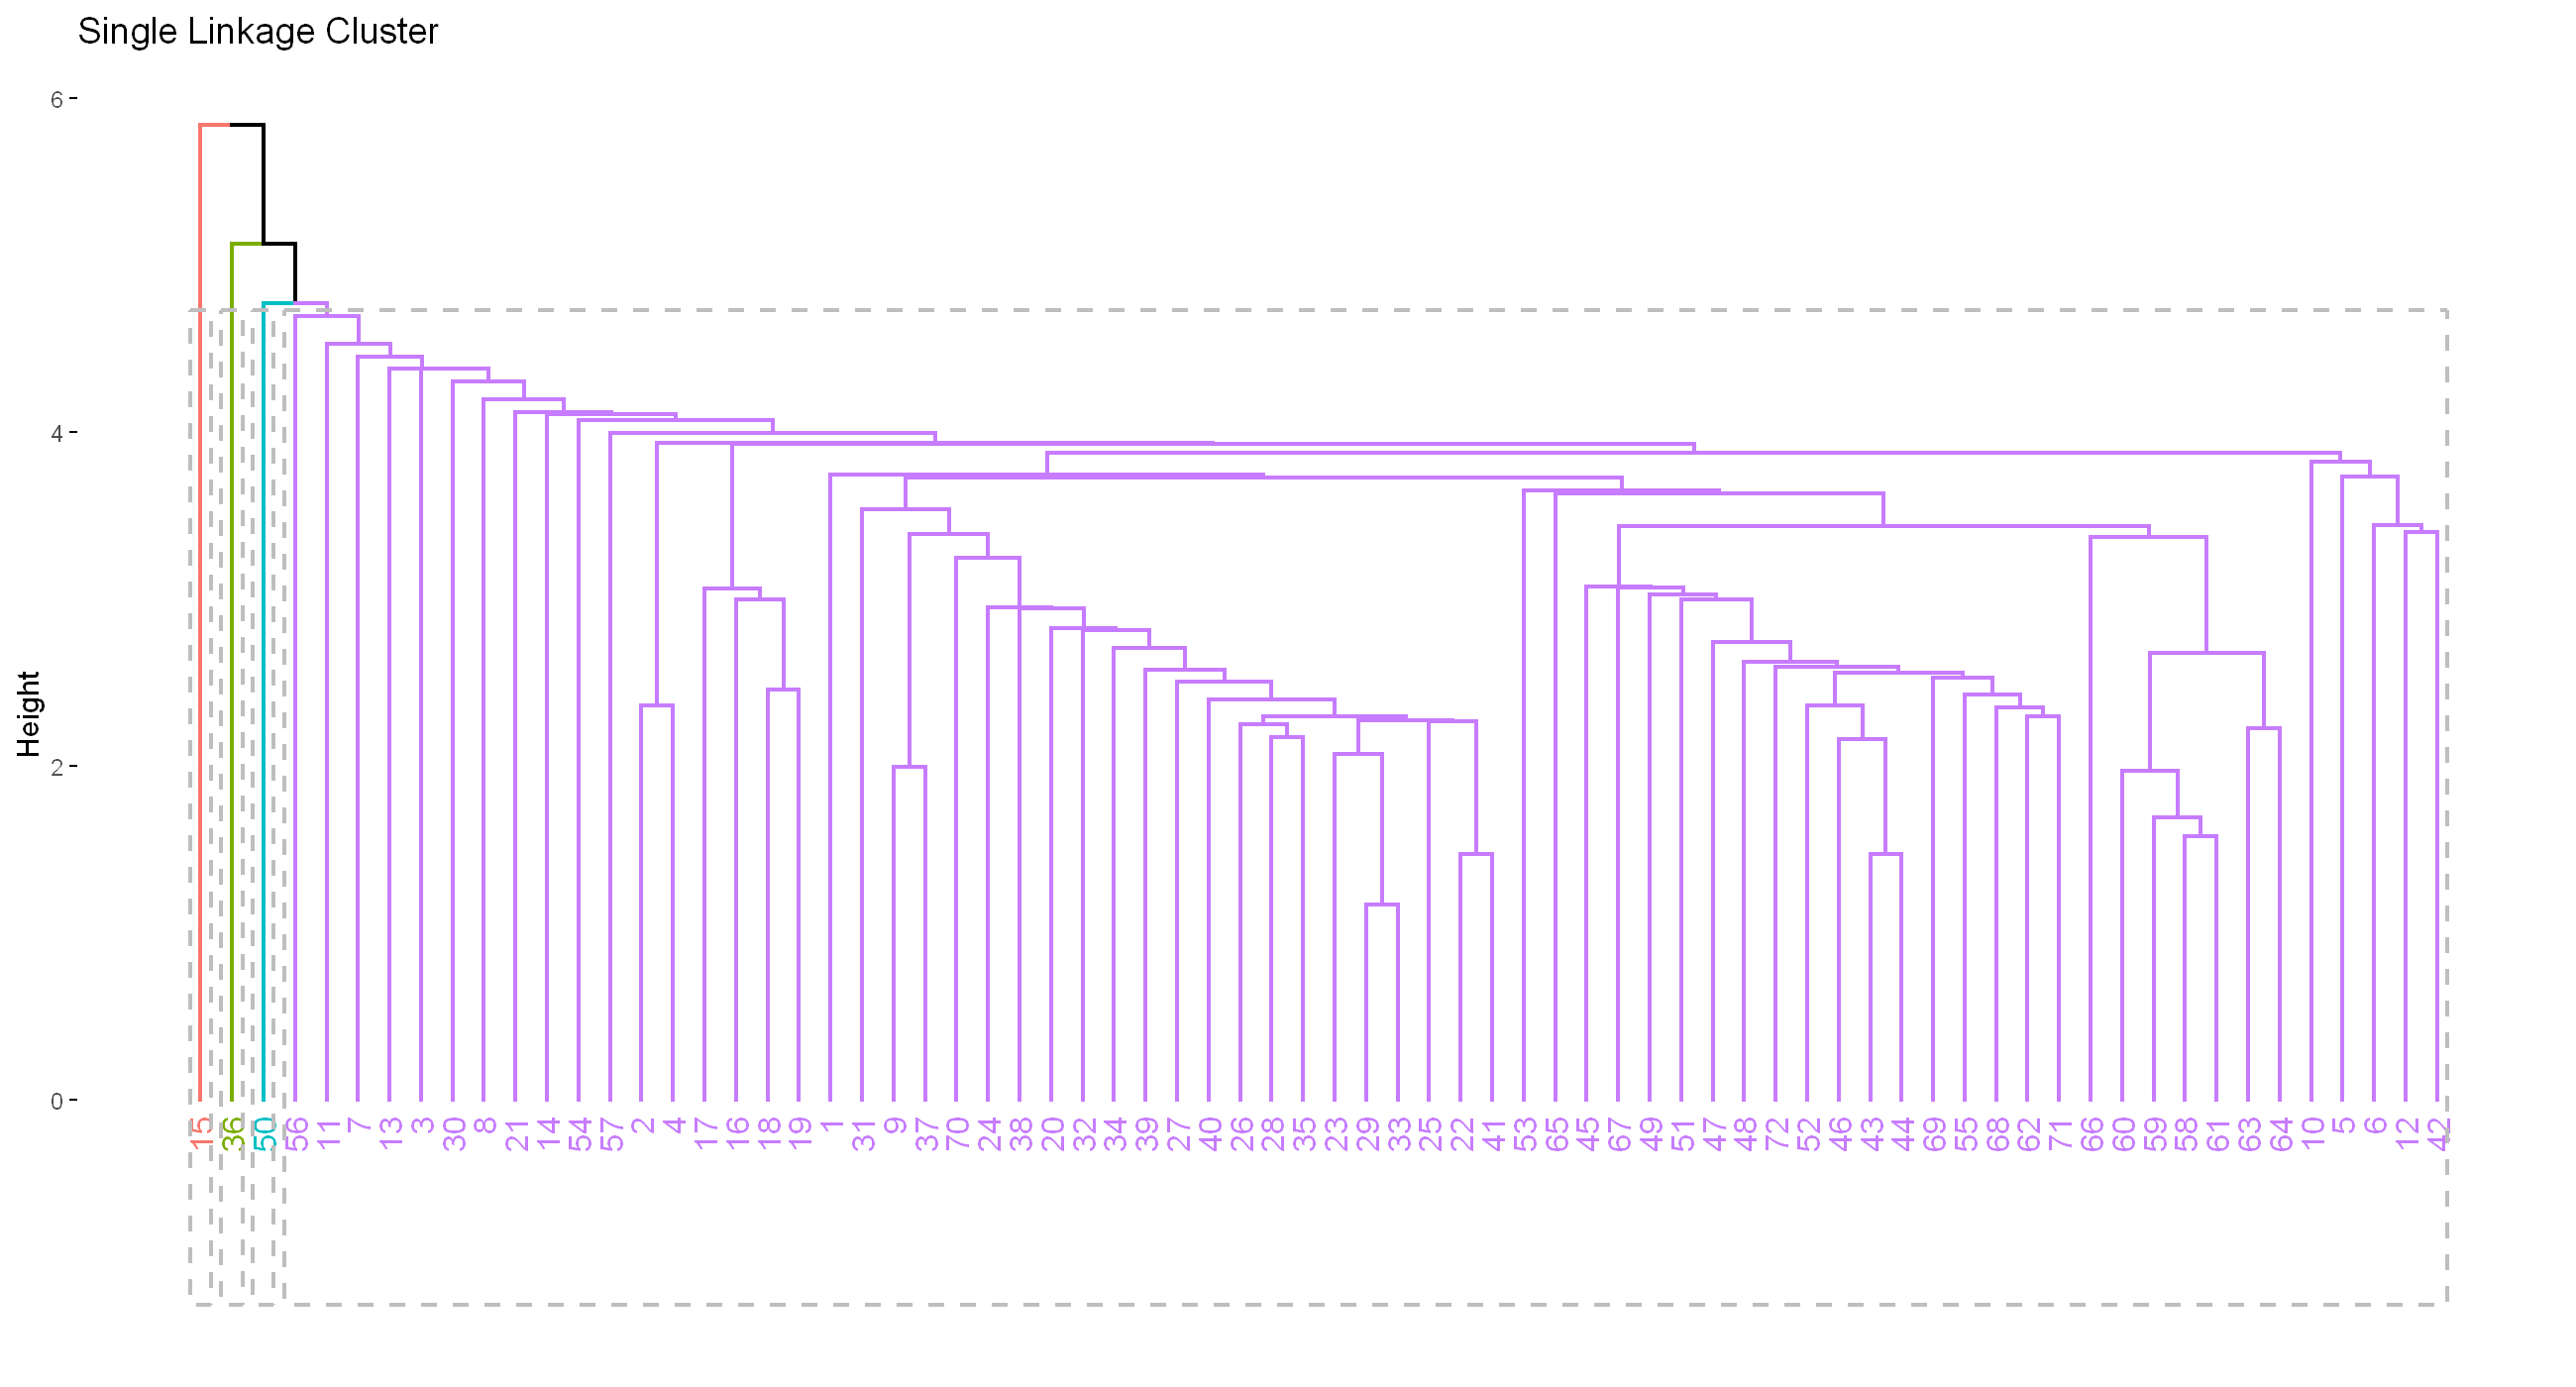

In [ ]:
fviz_dend(sin_hc, k = 4, rect = TRUE, main = "Single Linkage Cluster")

In [ ]:
single_coph <- cophenetic(sin_hc)
cor(single_coph, dist_data_euc)

single_clust <- cutree(sin_hc, k = 4)
table(single_clust)

[1] 0.6364644

single_clust
 1  2  3  4 
69  1  1  1 

### 2. Complete Linkage

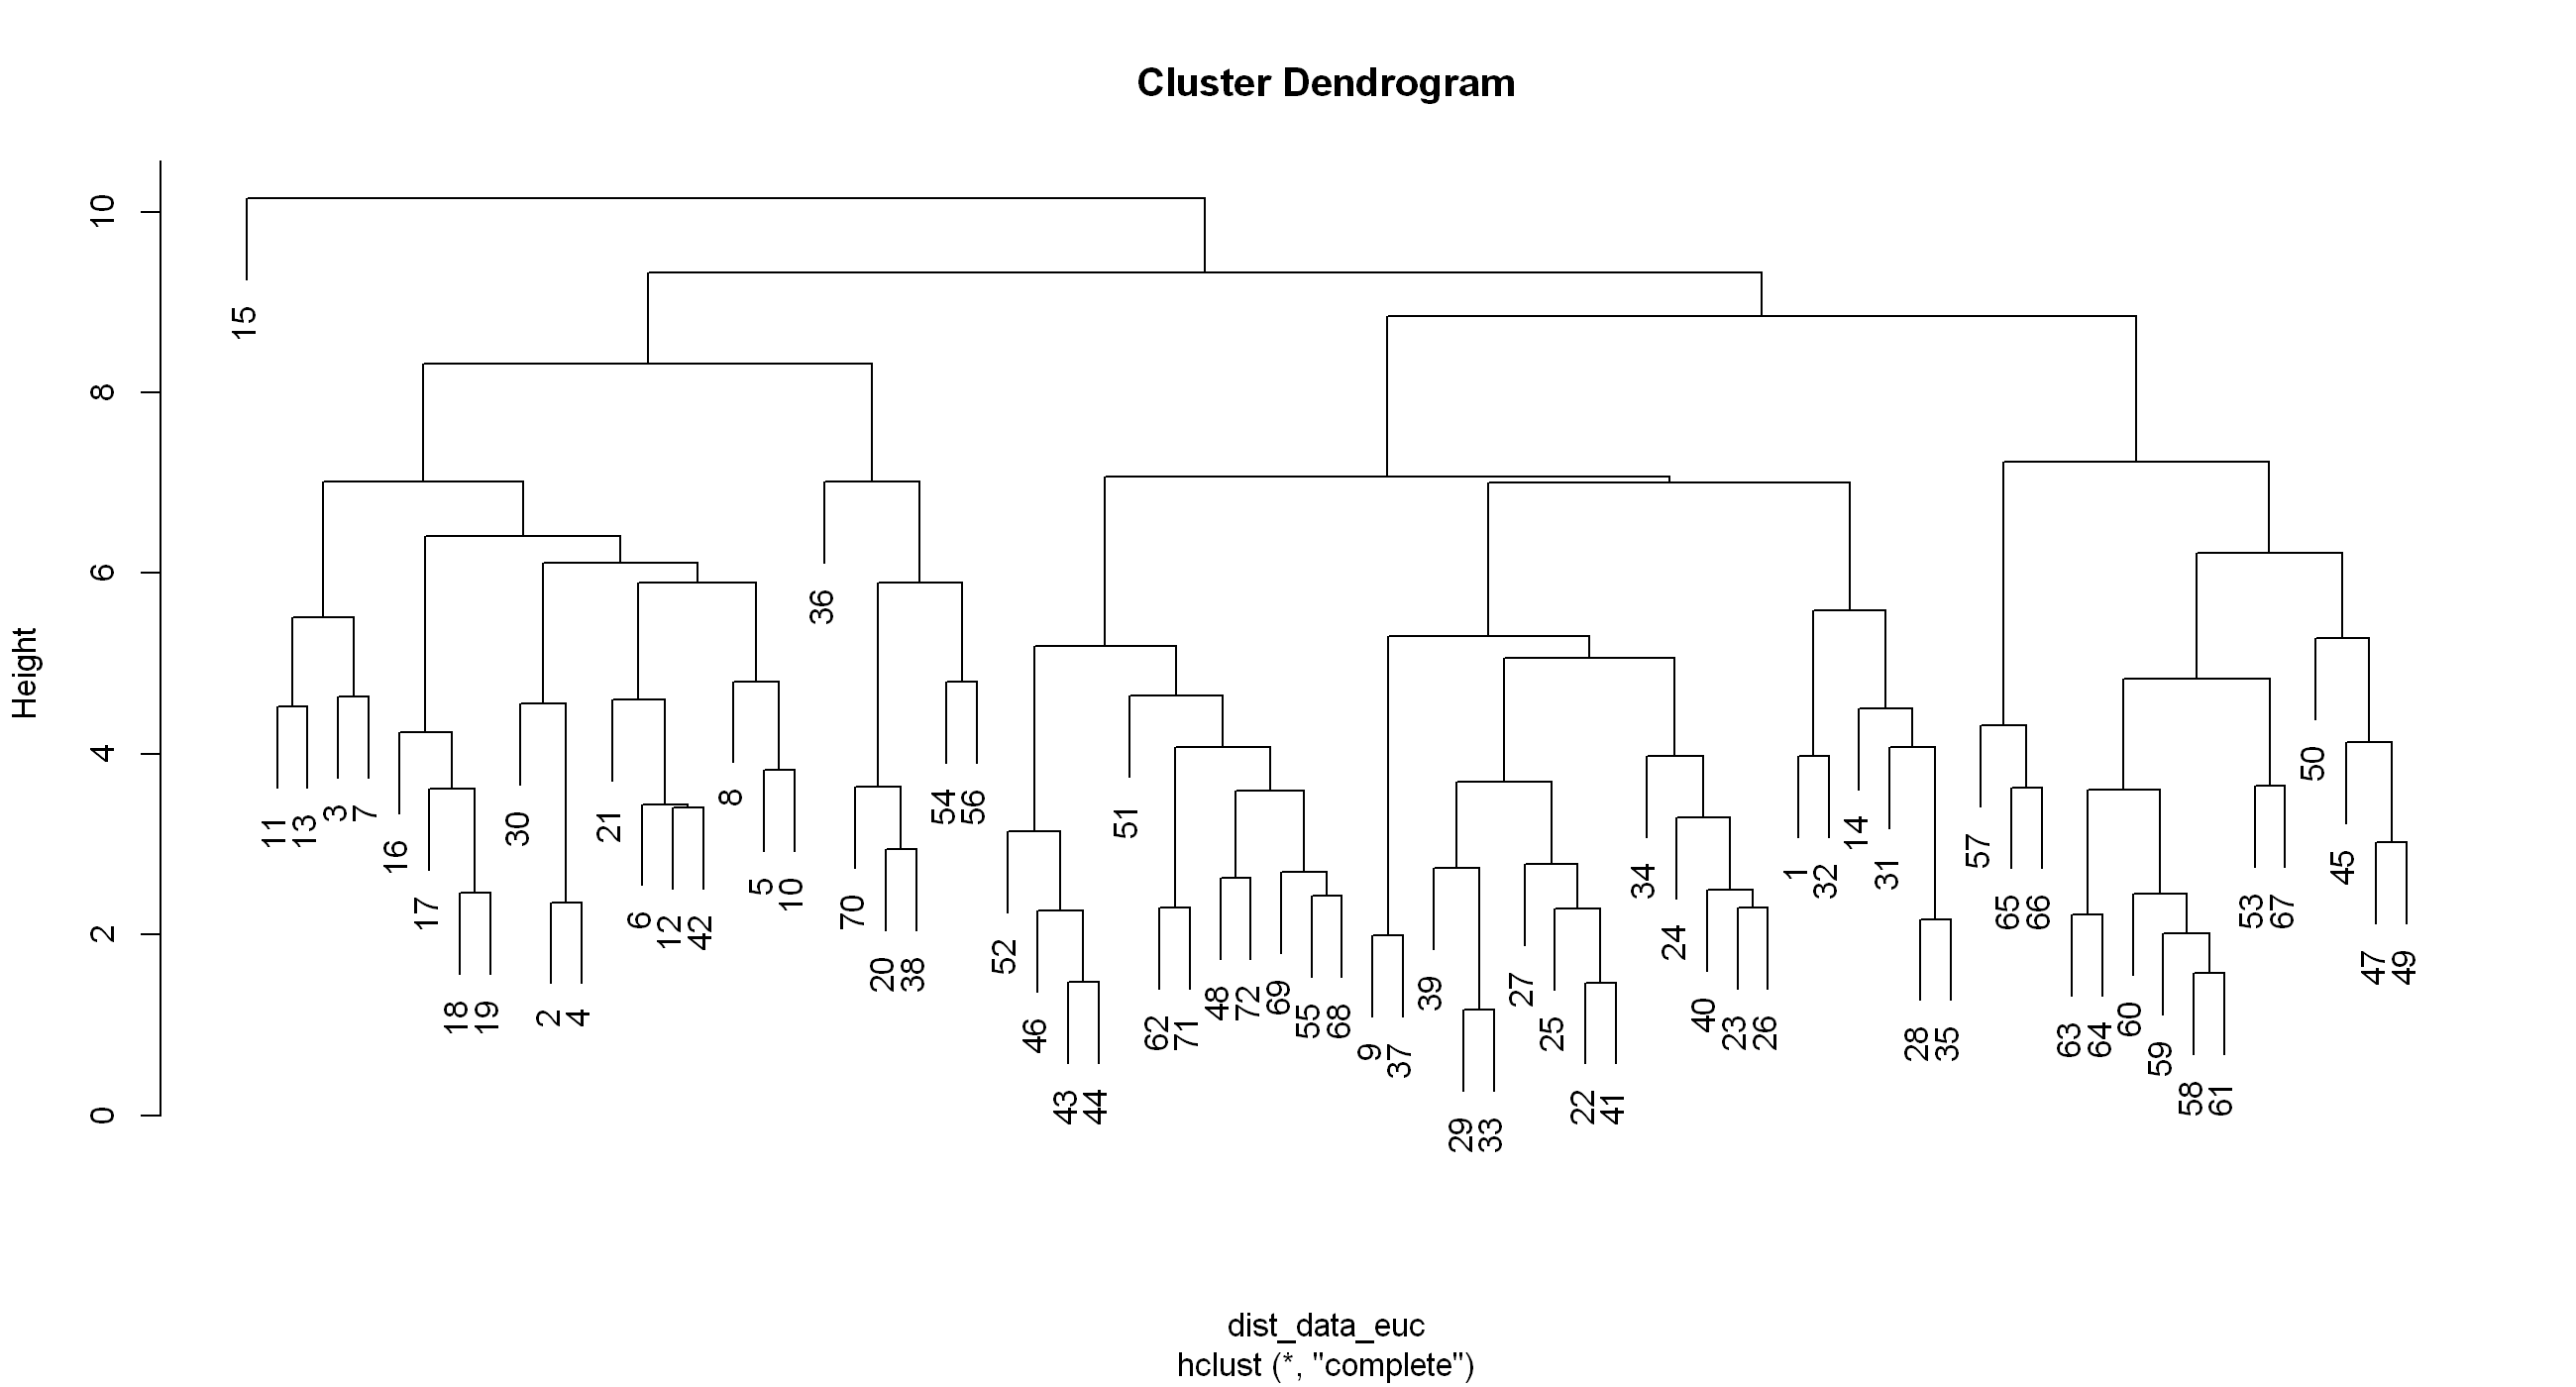

In [ ]:
com_hc <- hclust(dist_data_euc, method="complete")
plot(hclust(dist_data_euc, method="complete"))

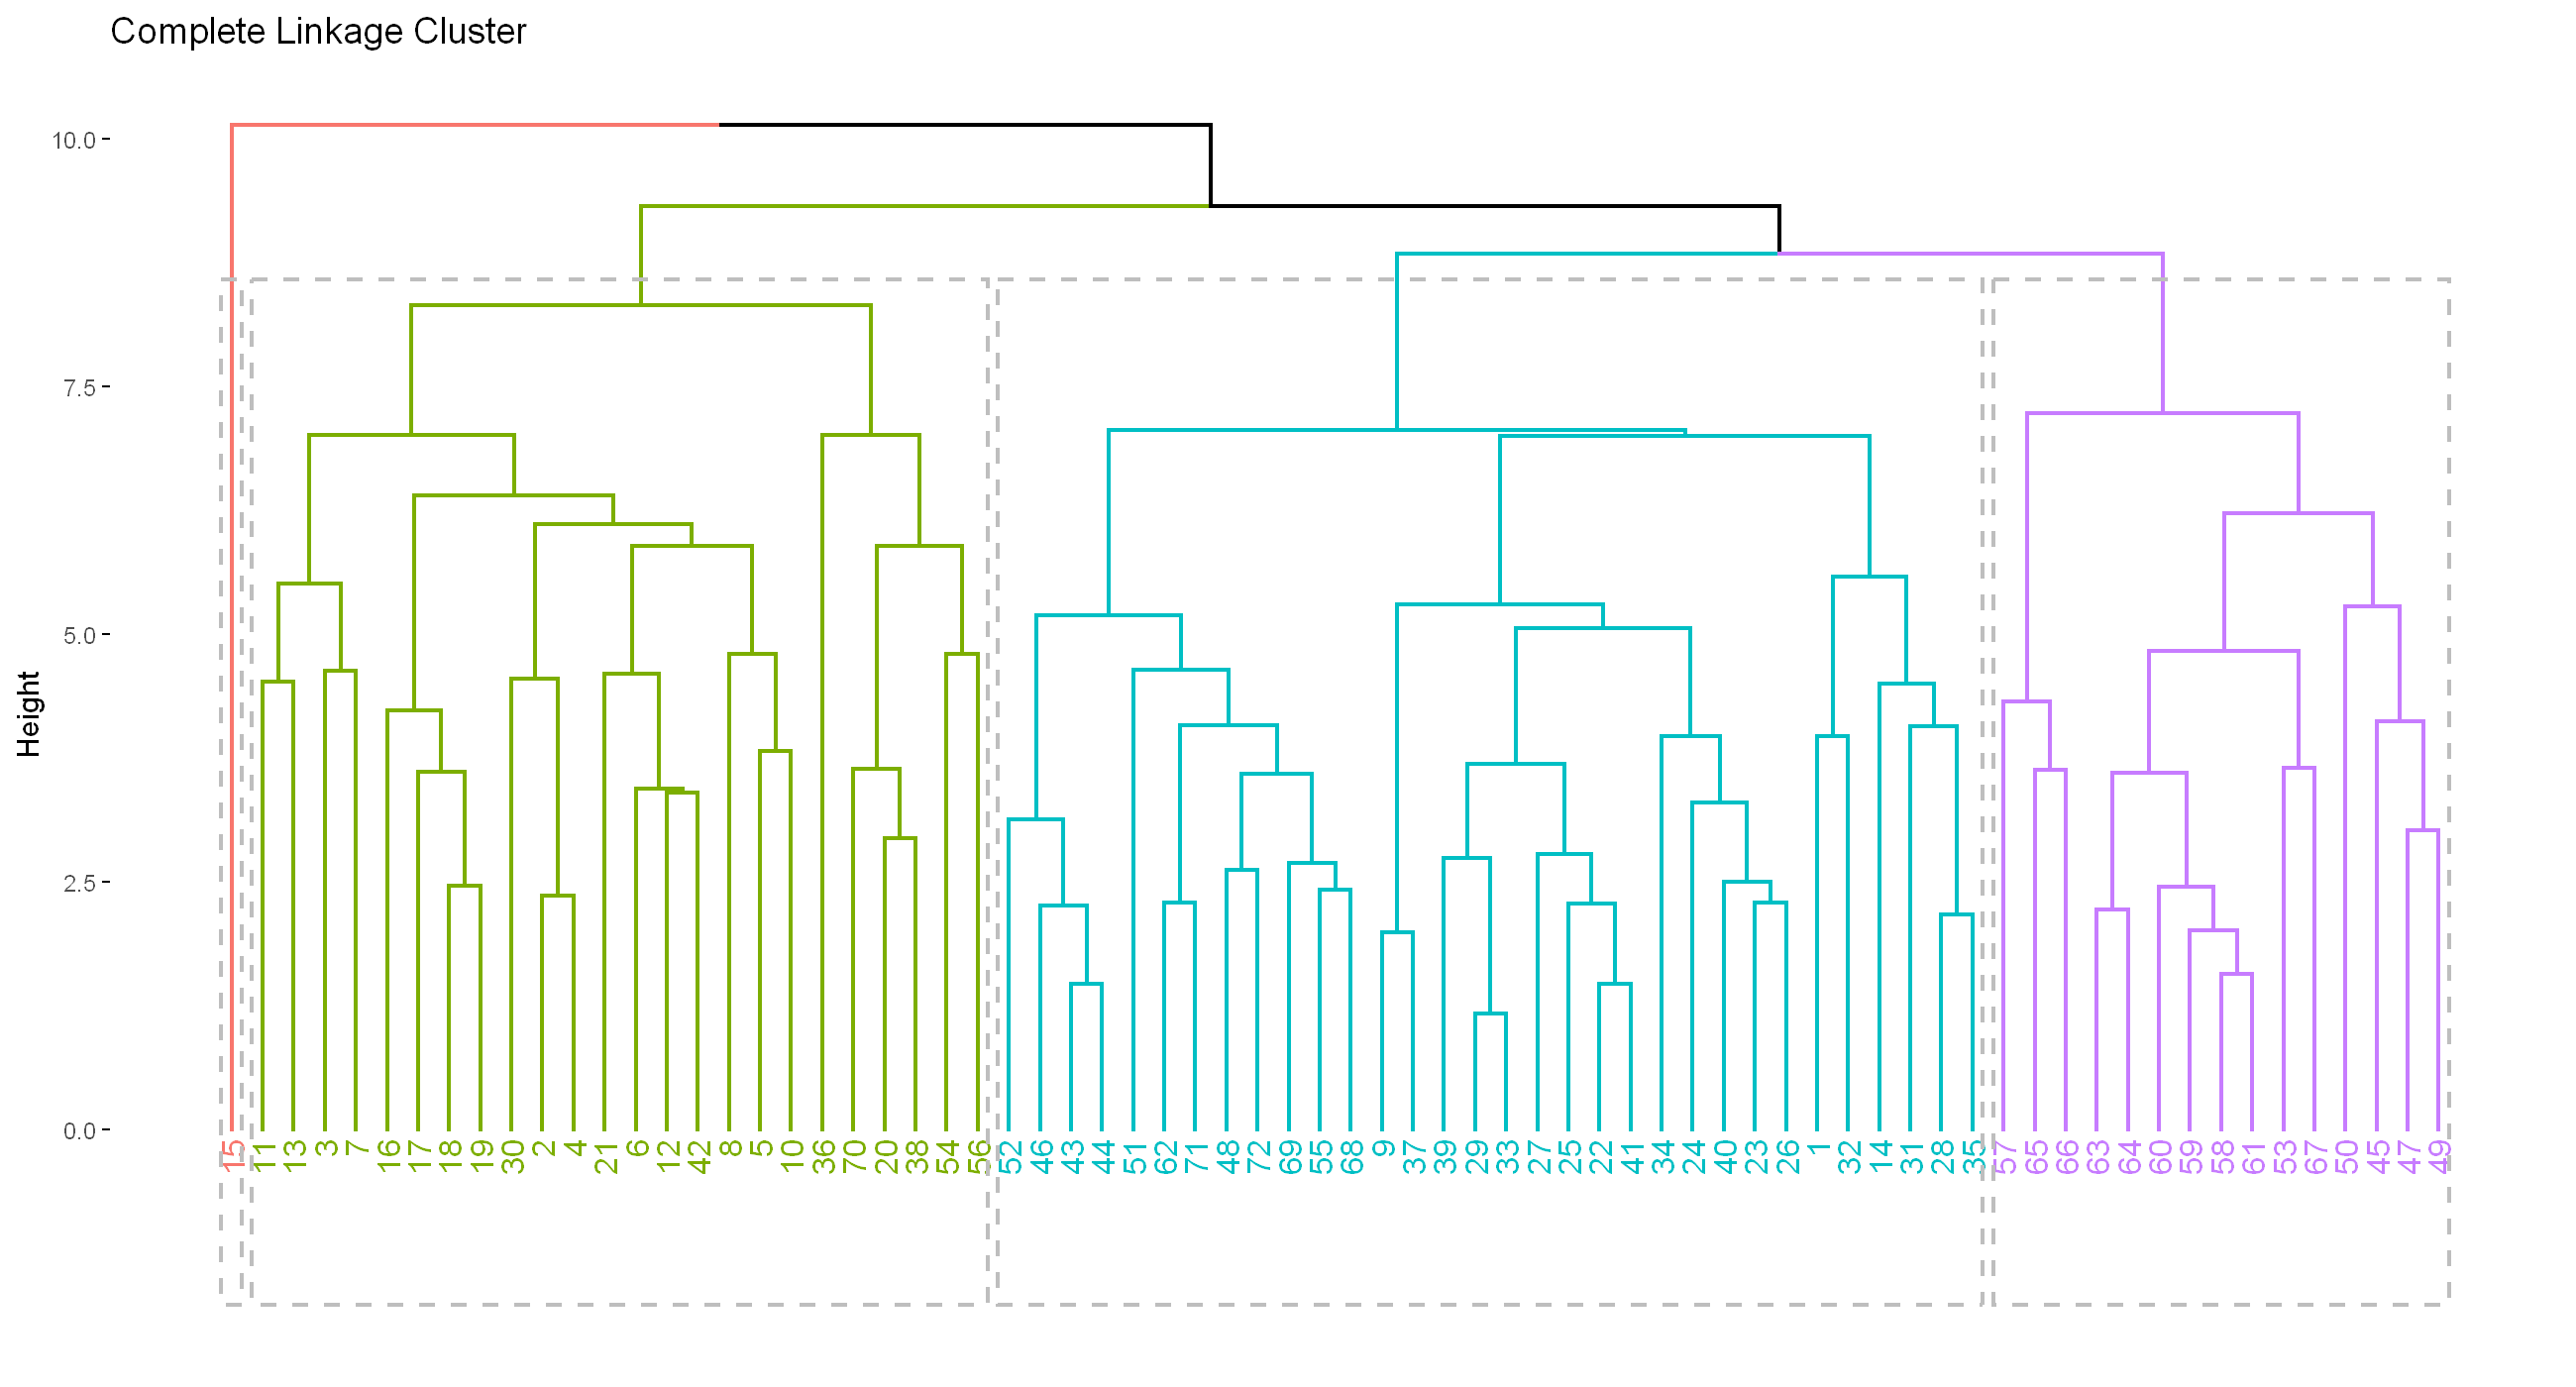

In [ ]:
fviz_dend(com_hc, k = 4, rect = T, main = "Complete Linkage Cluster")

In [ ]:
complete_coph <- cophenetic(com_hc)
cor(complete_coph, dist_data_euc)

complete_clust <- cutree(com_hc, k = 4)
table(complete_clust)

[1] 0.6425443

complete_clust
 1  2  3  4 
32 24  1 15 

### 3. Average Linkage

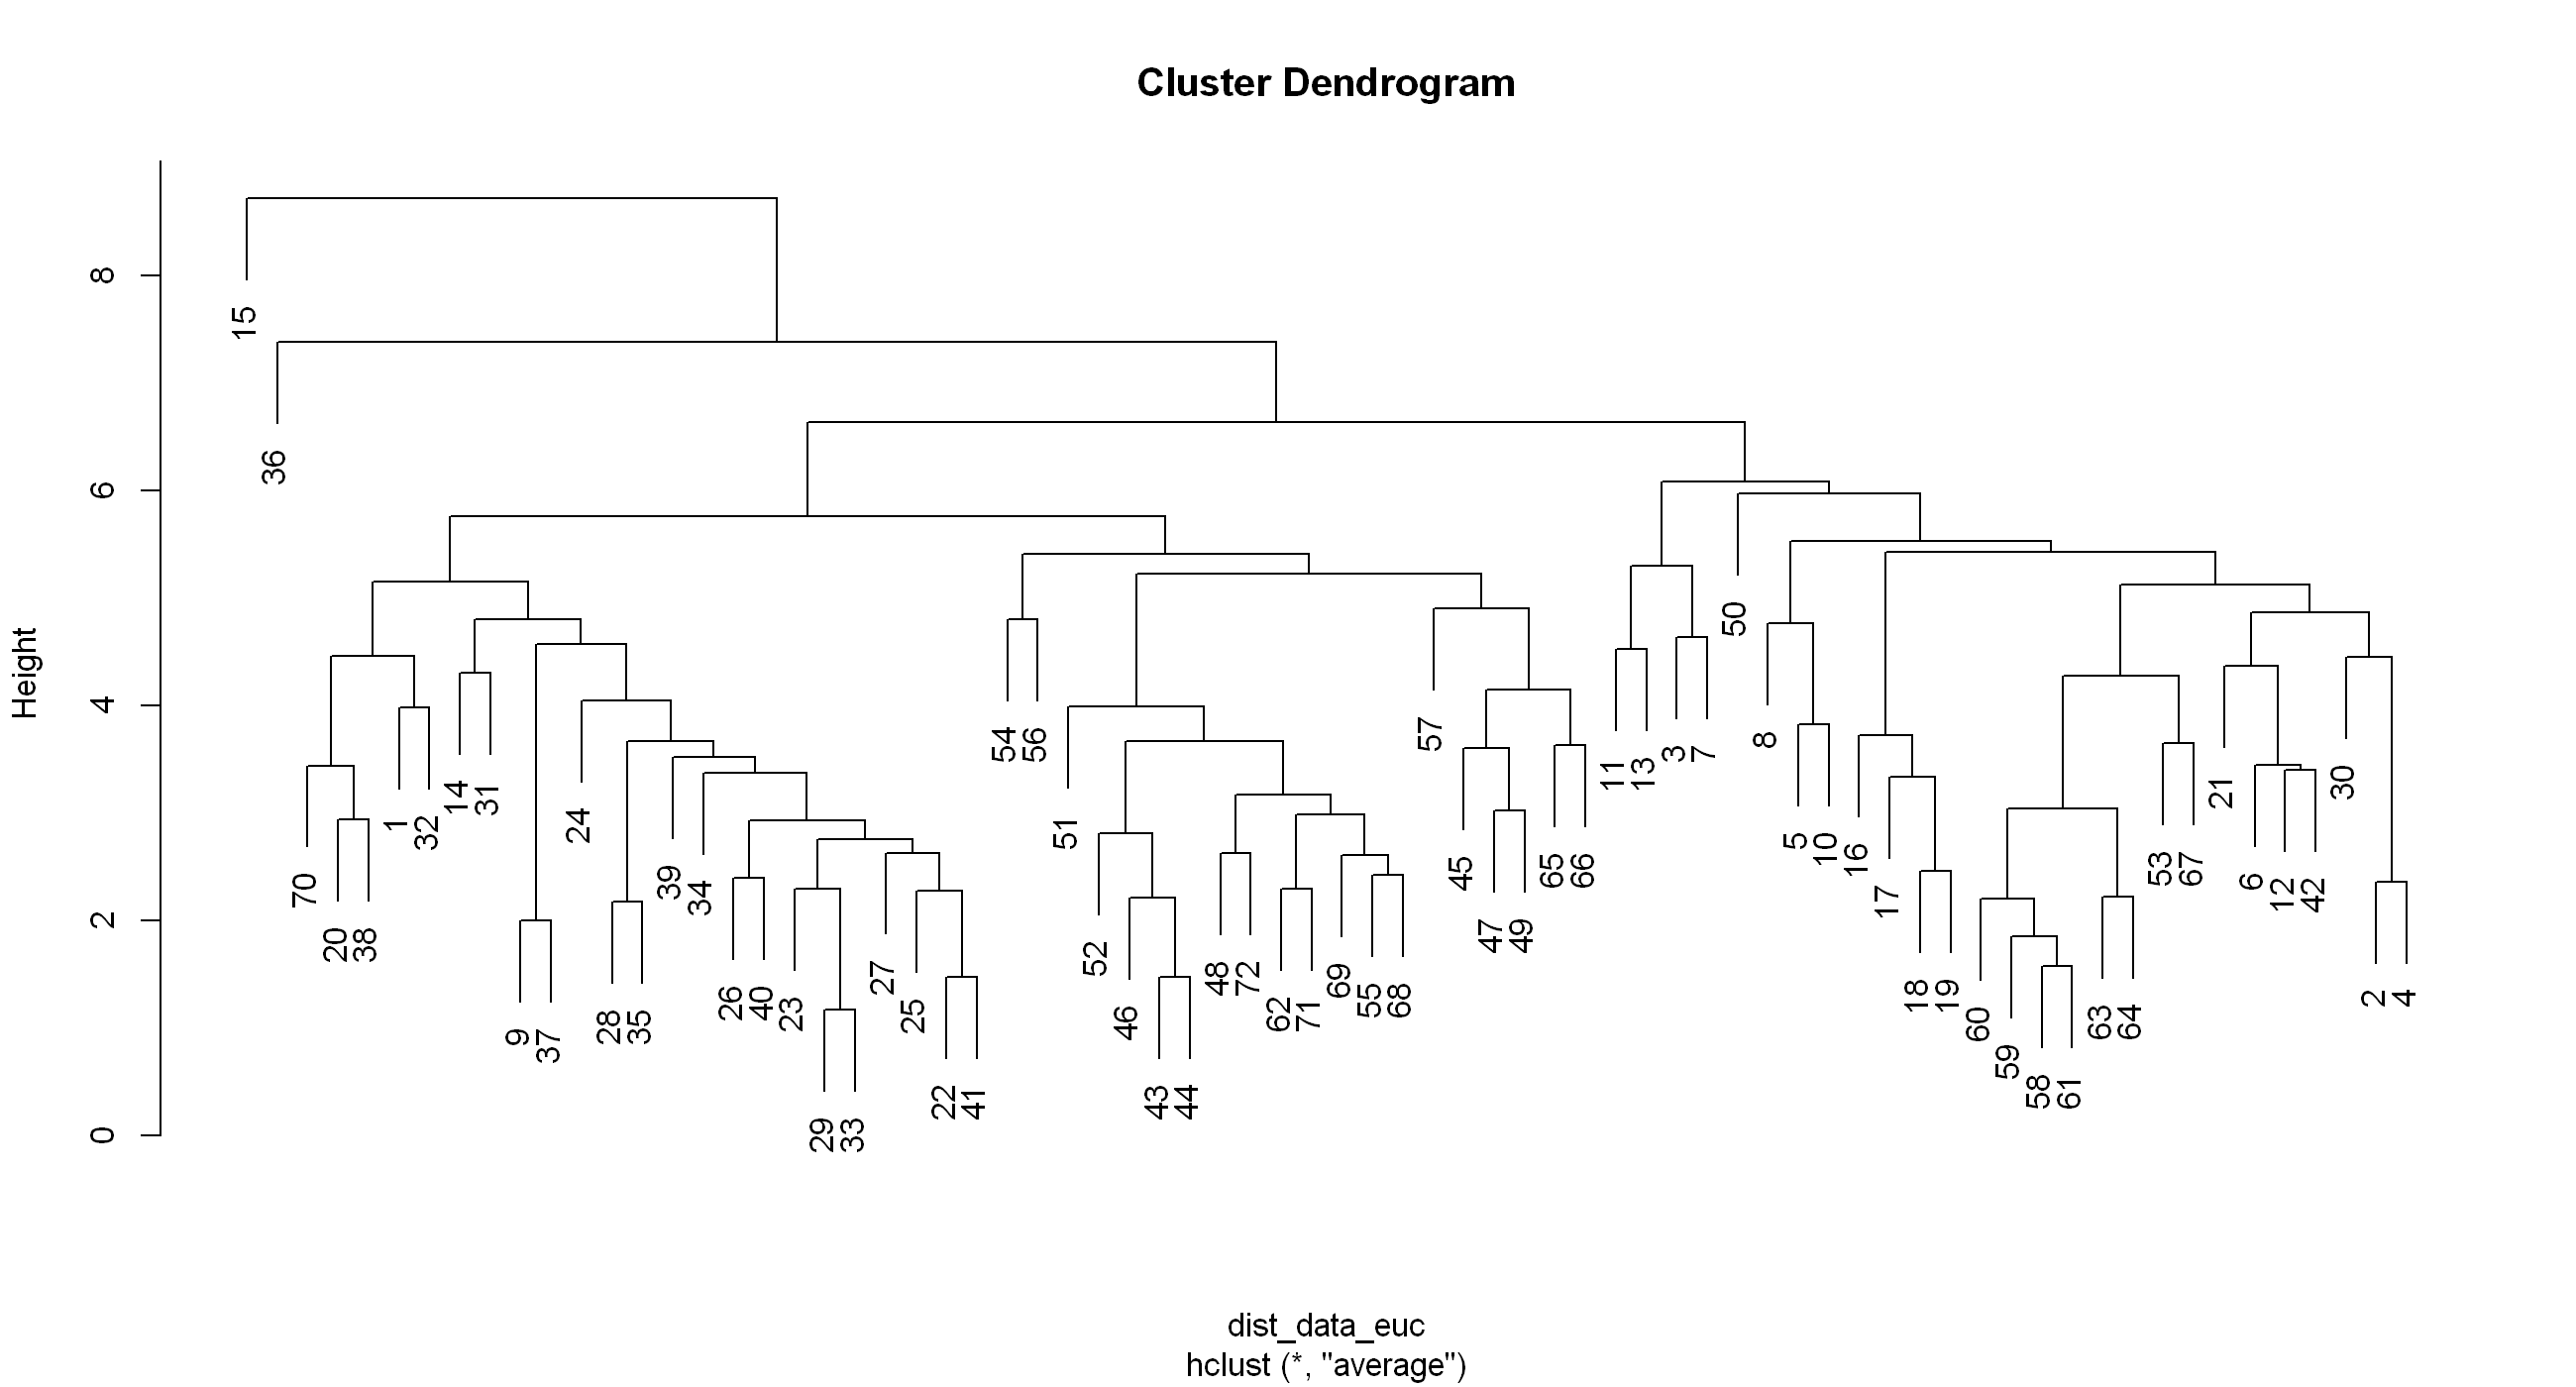

In [ ]:
ave_hc <- hclust(dist_data_euc, method="average")
plot(hclust(dist_data_euc, method="average"))

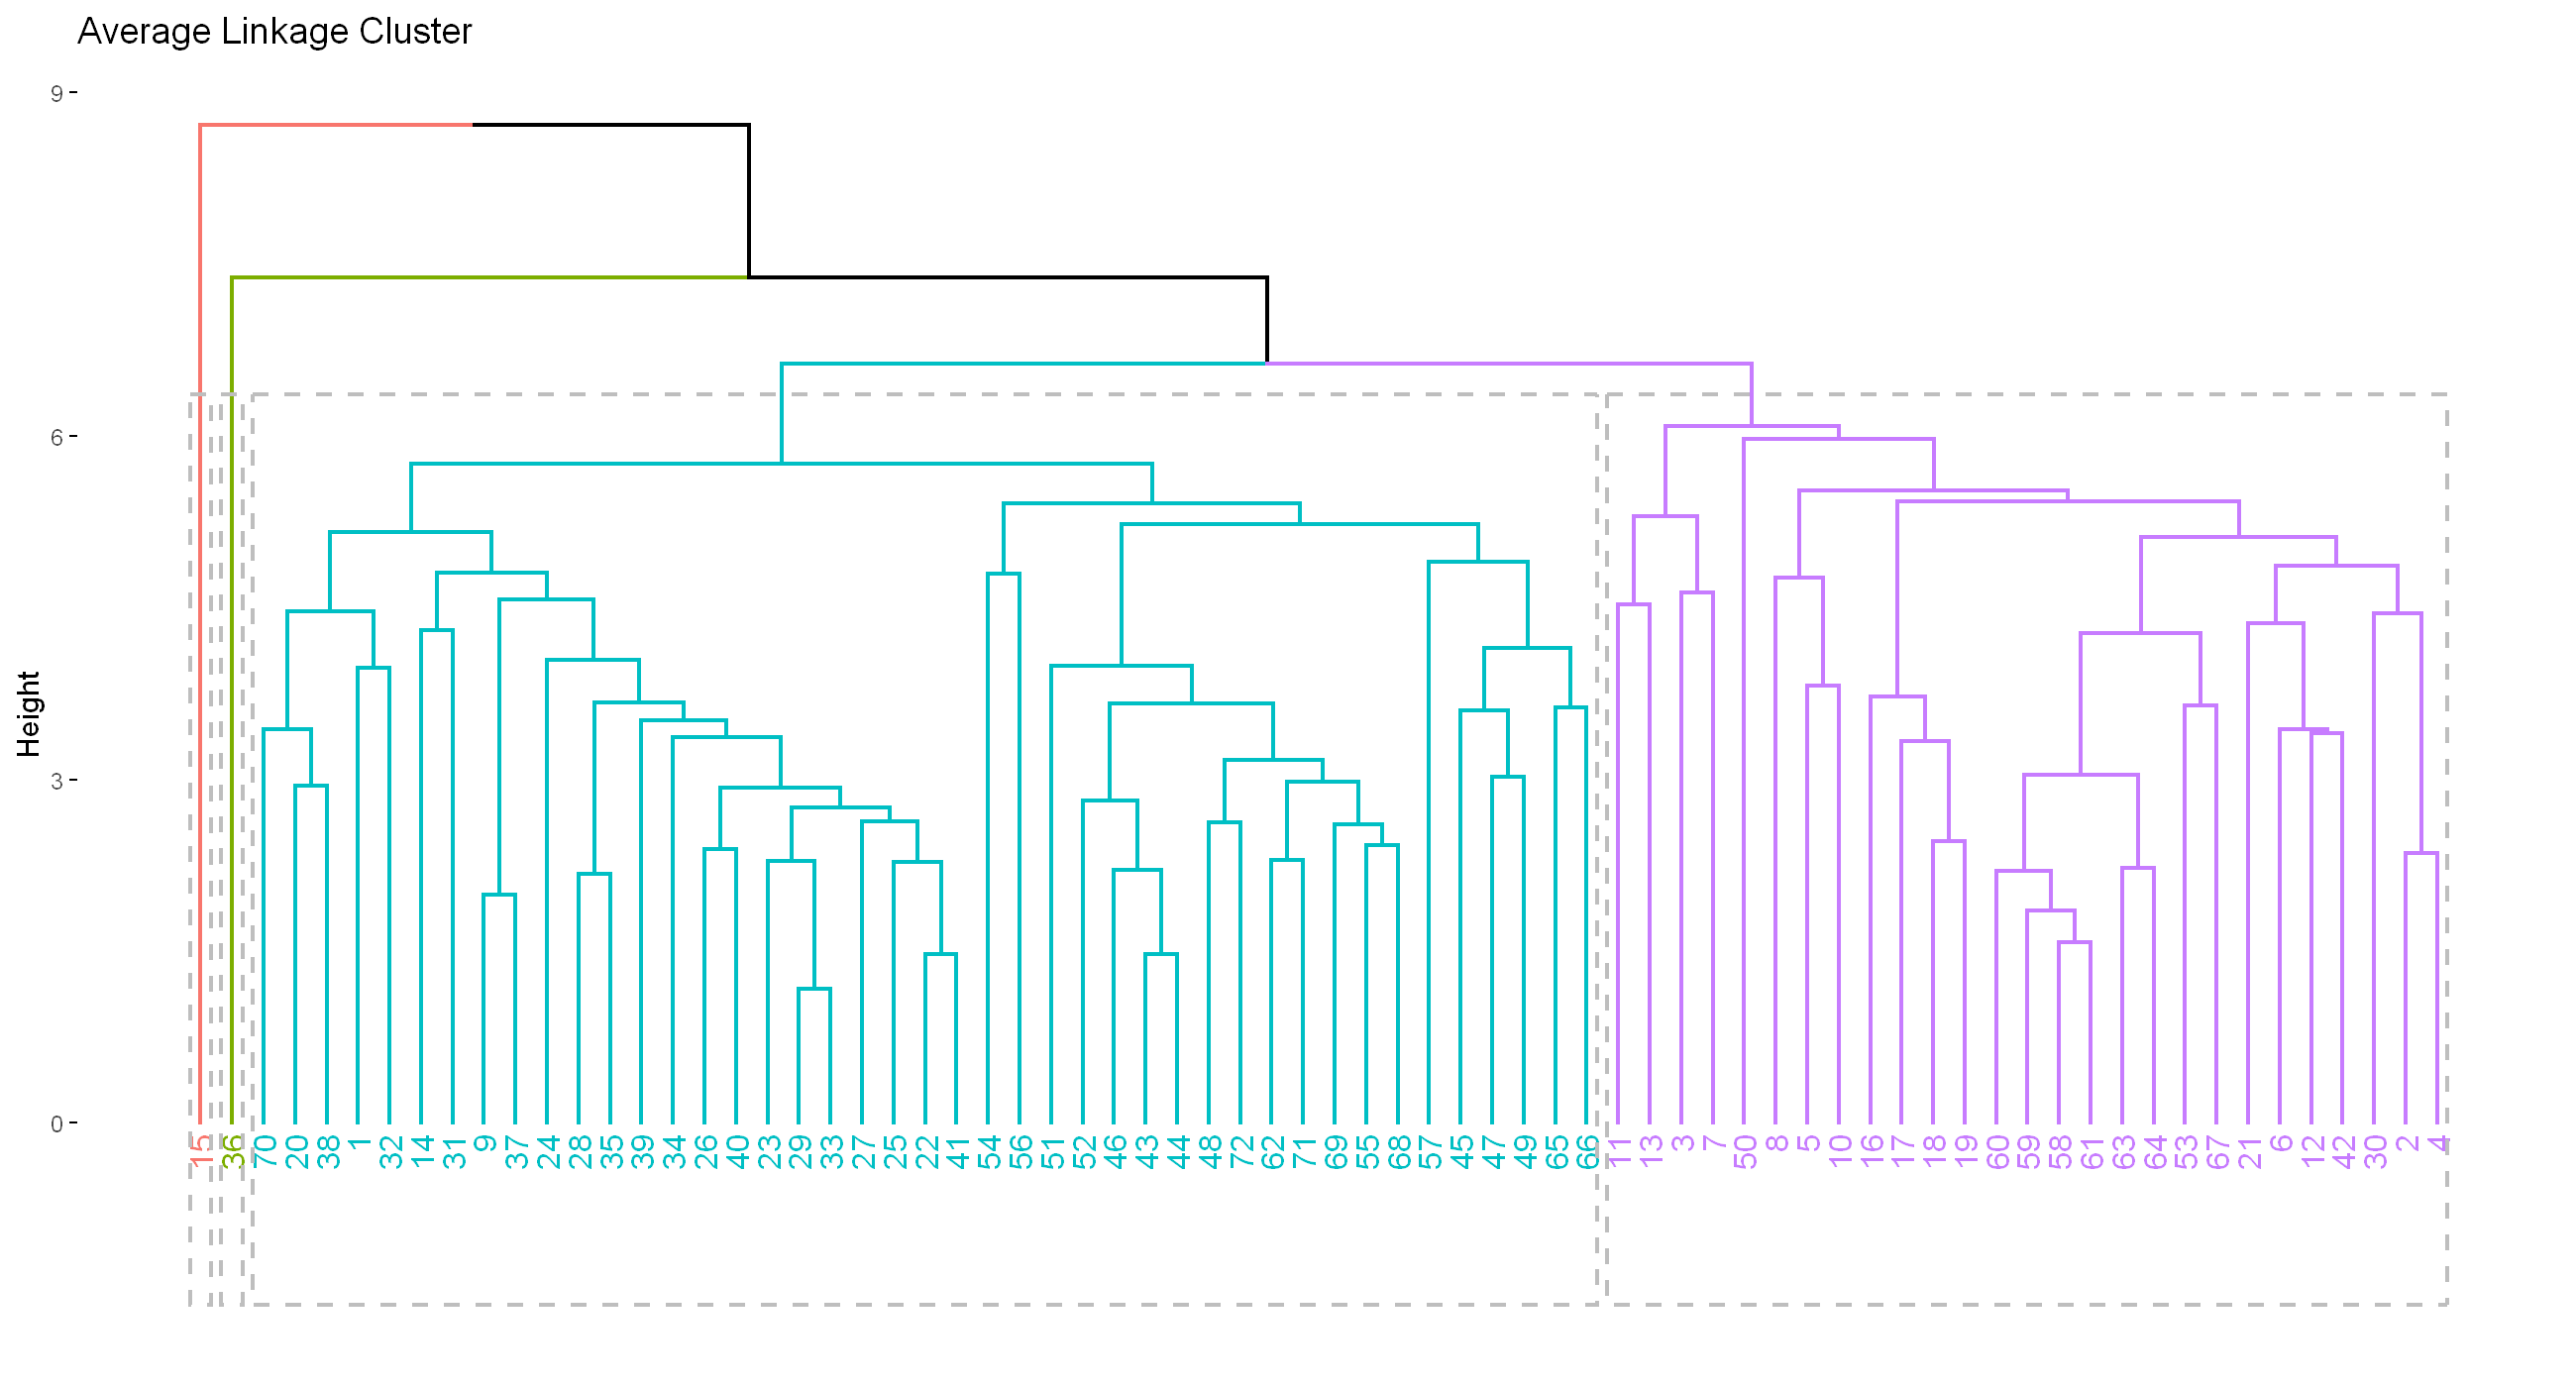

In [ ]:
fviz_dend(ave_hc, k = 4, rect = T, main = "Average Linkage Cluster")

In [ ]:
avg_coph <- cophenetic(ave_hc)
cor(avg_coph, dist_data_euc)

avg_clust <- cutree(ave_hc, k = 4)
table(avg_clust)

[1] 0.7538292

avg_clust
 1  2  3  4 
43 27  1  1 

### 4. Centroid Linkage

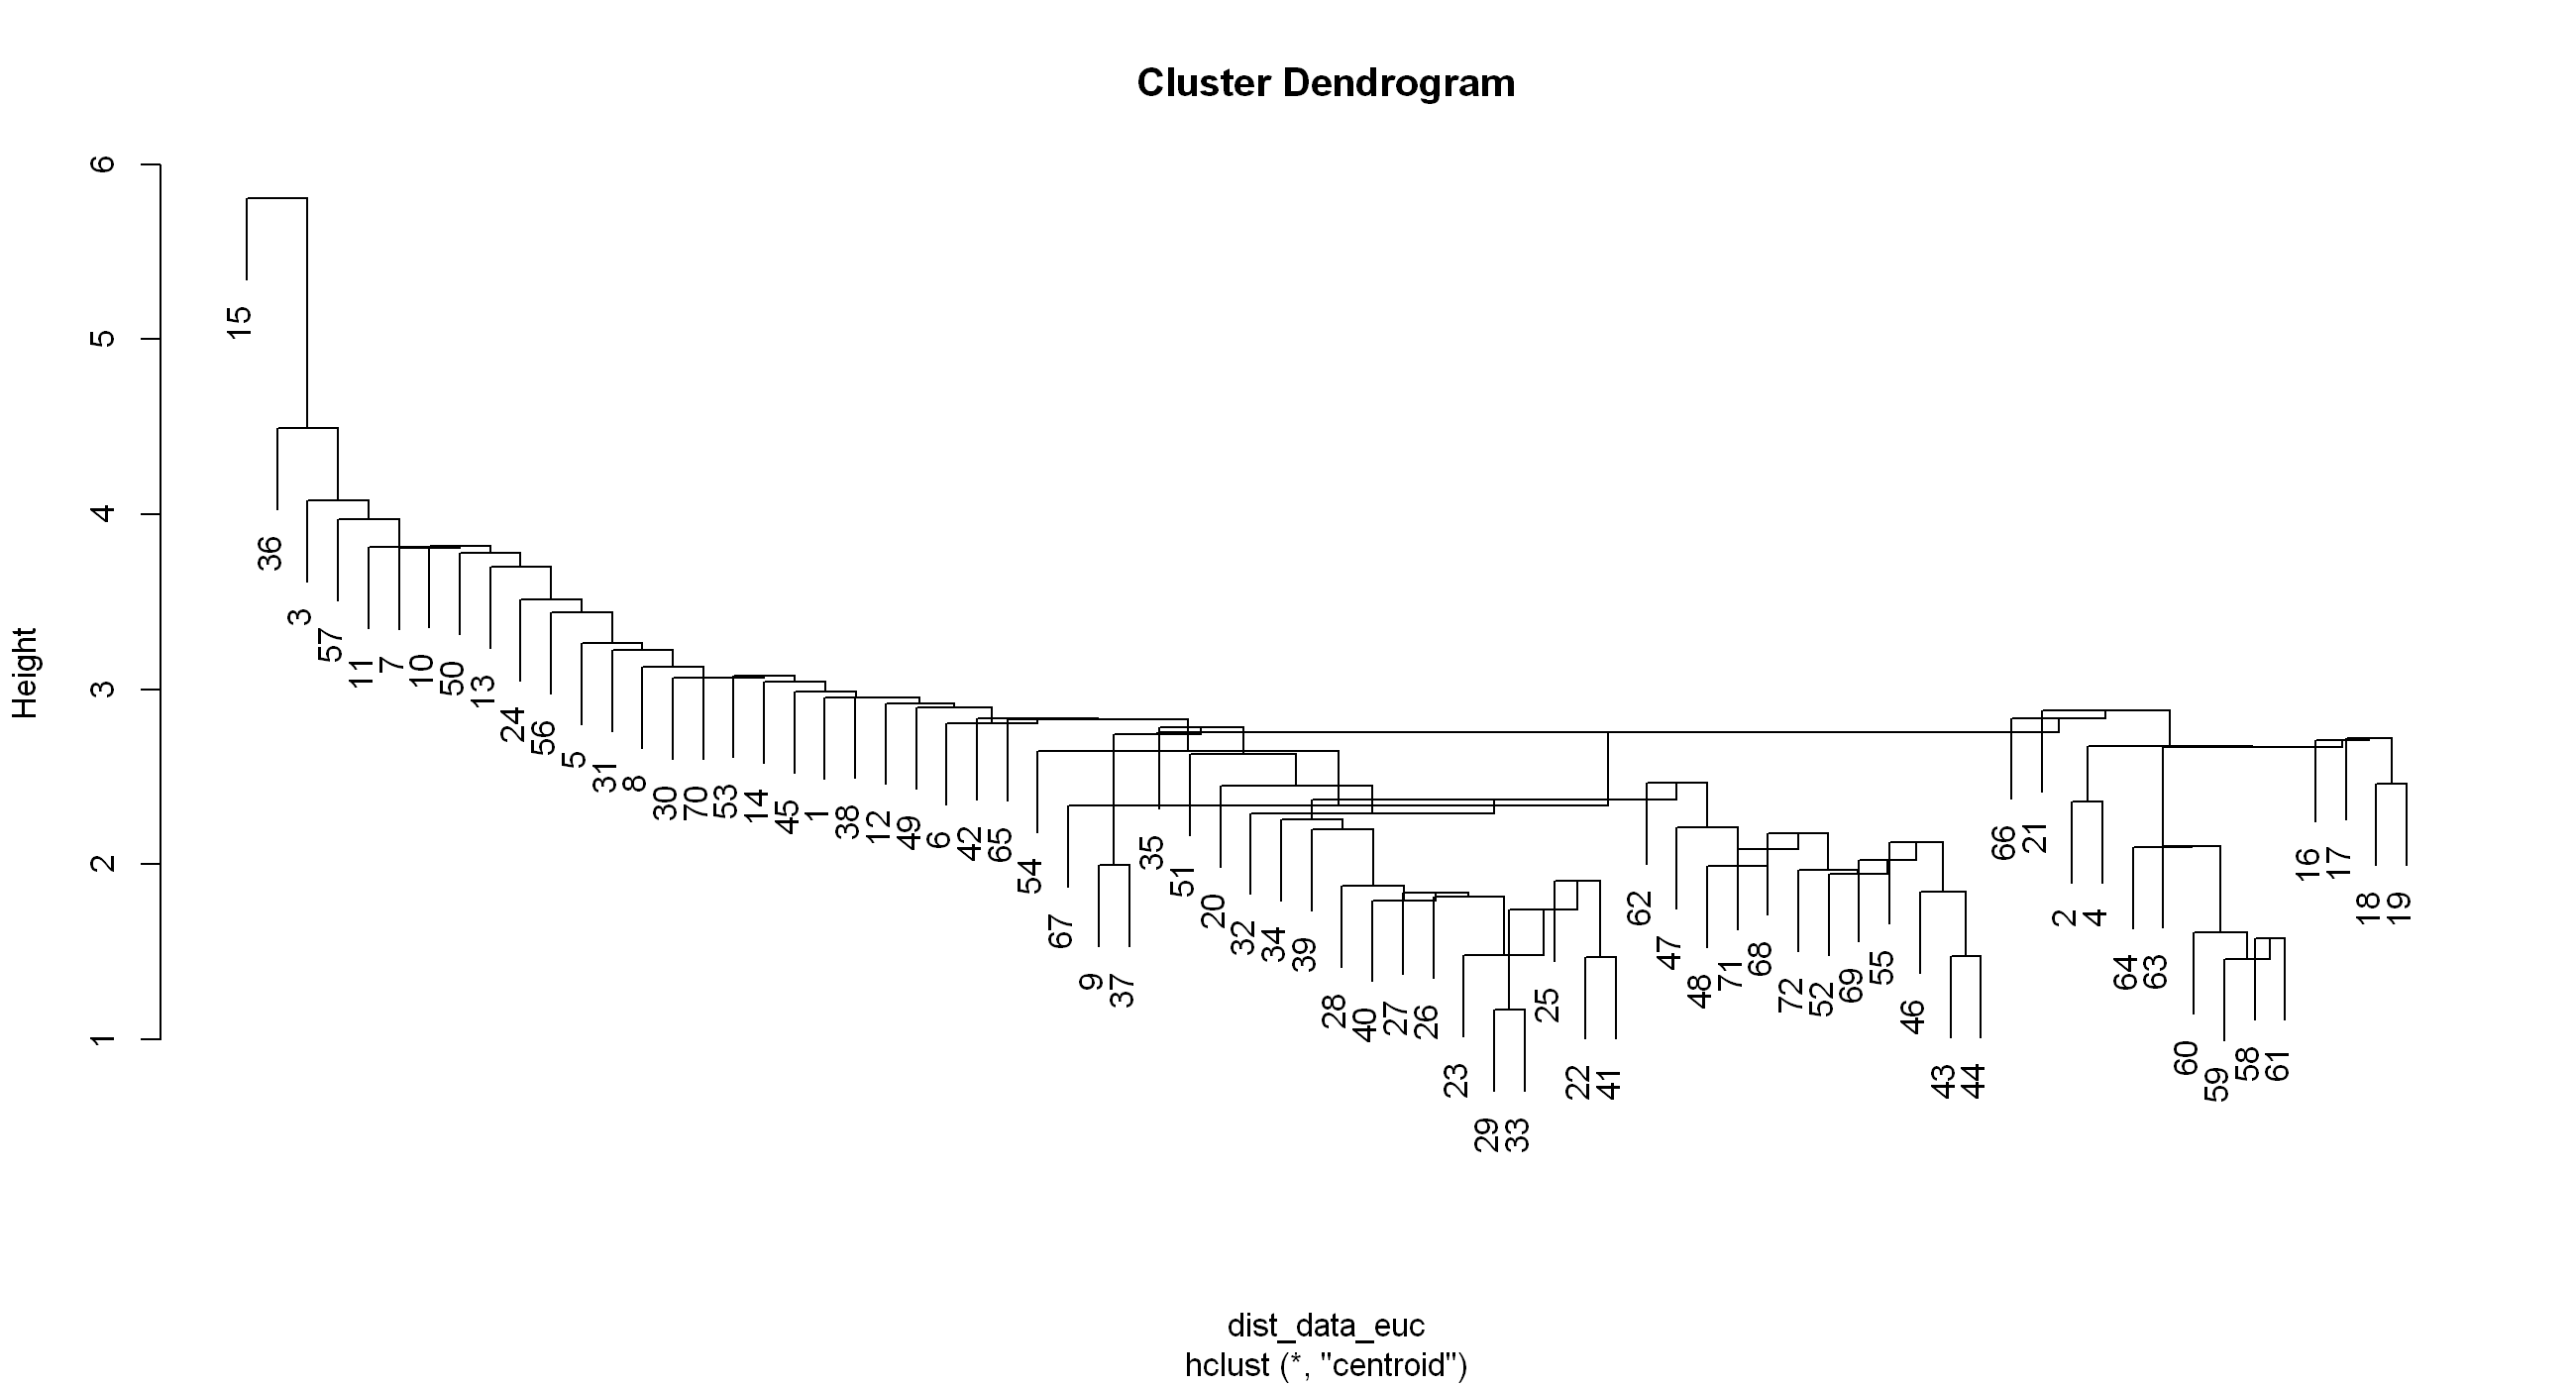

In [ ]:
cen_hc <- hclust(dist_data_euc, method="centroid")
plot(hclust(dist_data_euc, method="centroid"))

Warning message in get_col(col, k):
"Length of color vector was shorter than the number of clusters - color vector was recycled"
Warning message in data.frame(xmin = unlist(xleft), ymin = unlist(ybottom), xmax = unlist(xright), :
"row names were found from a short variable and have been discarded"


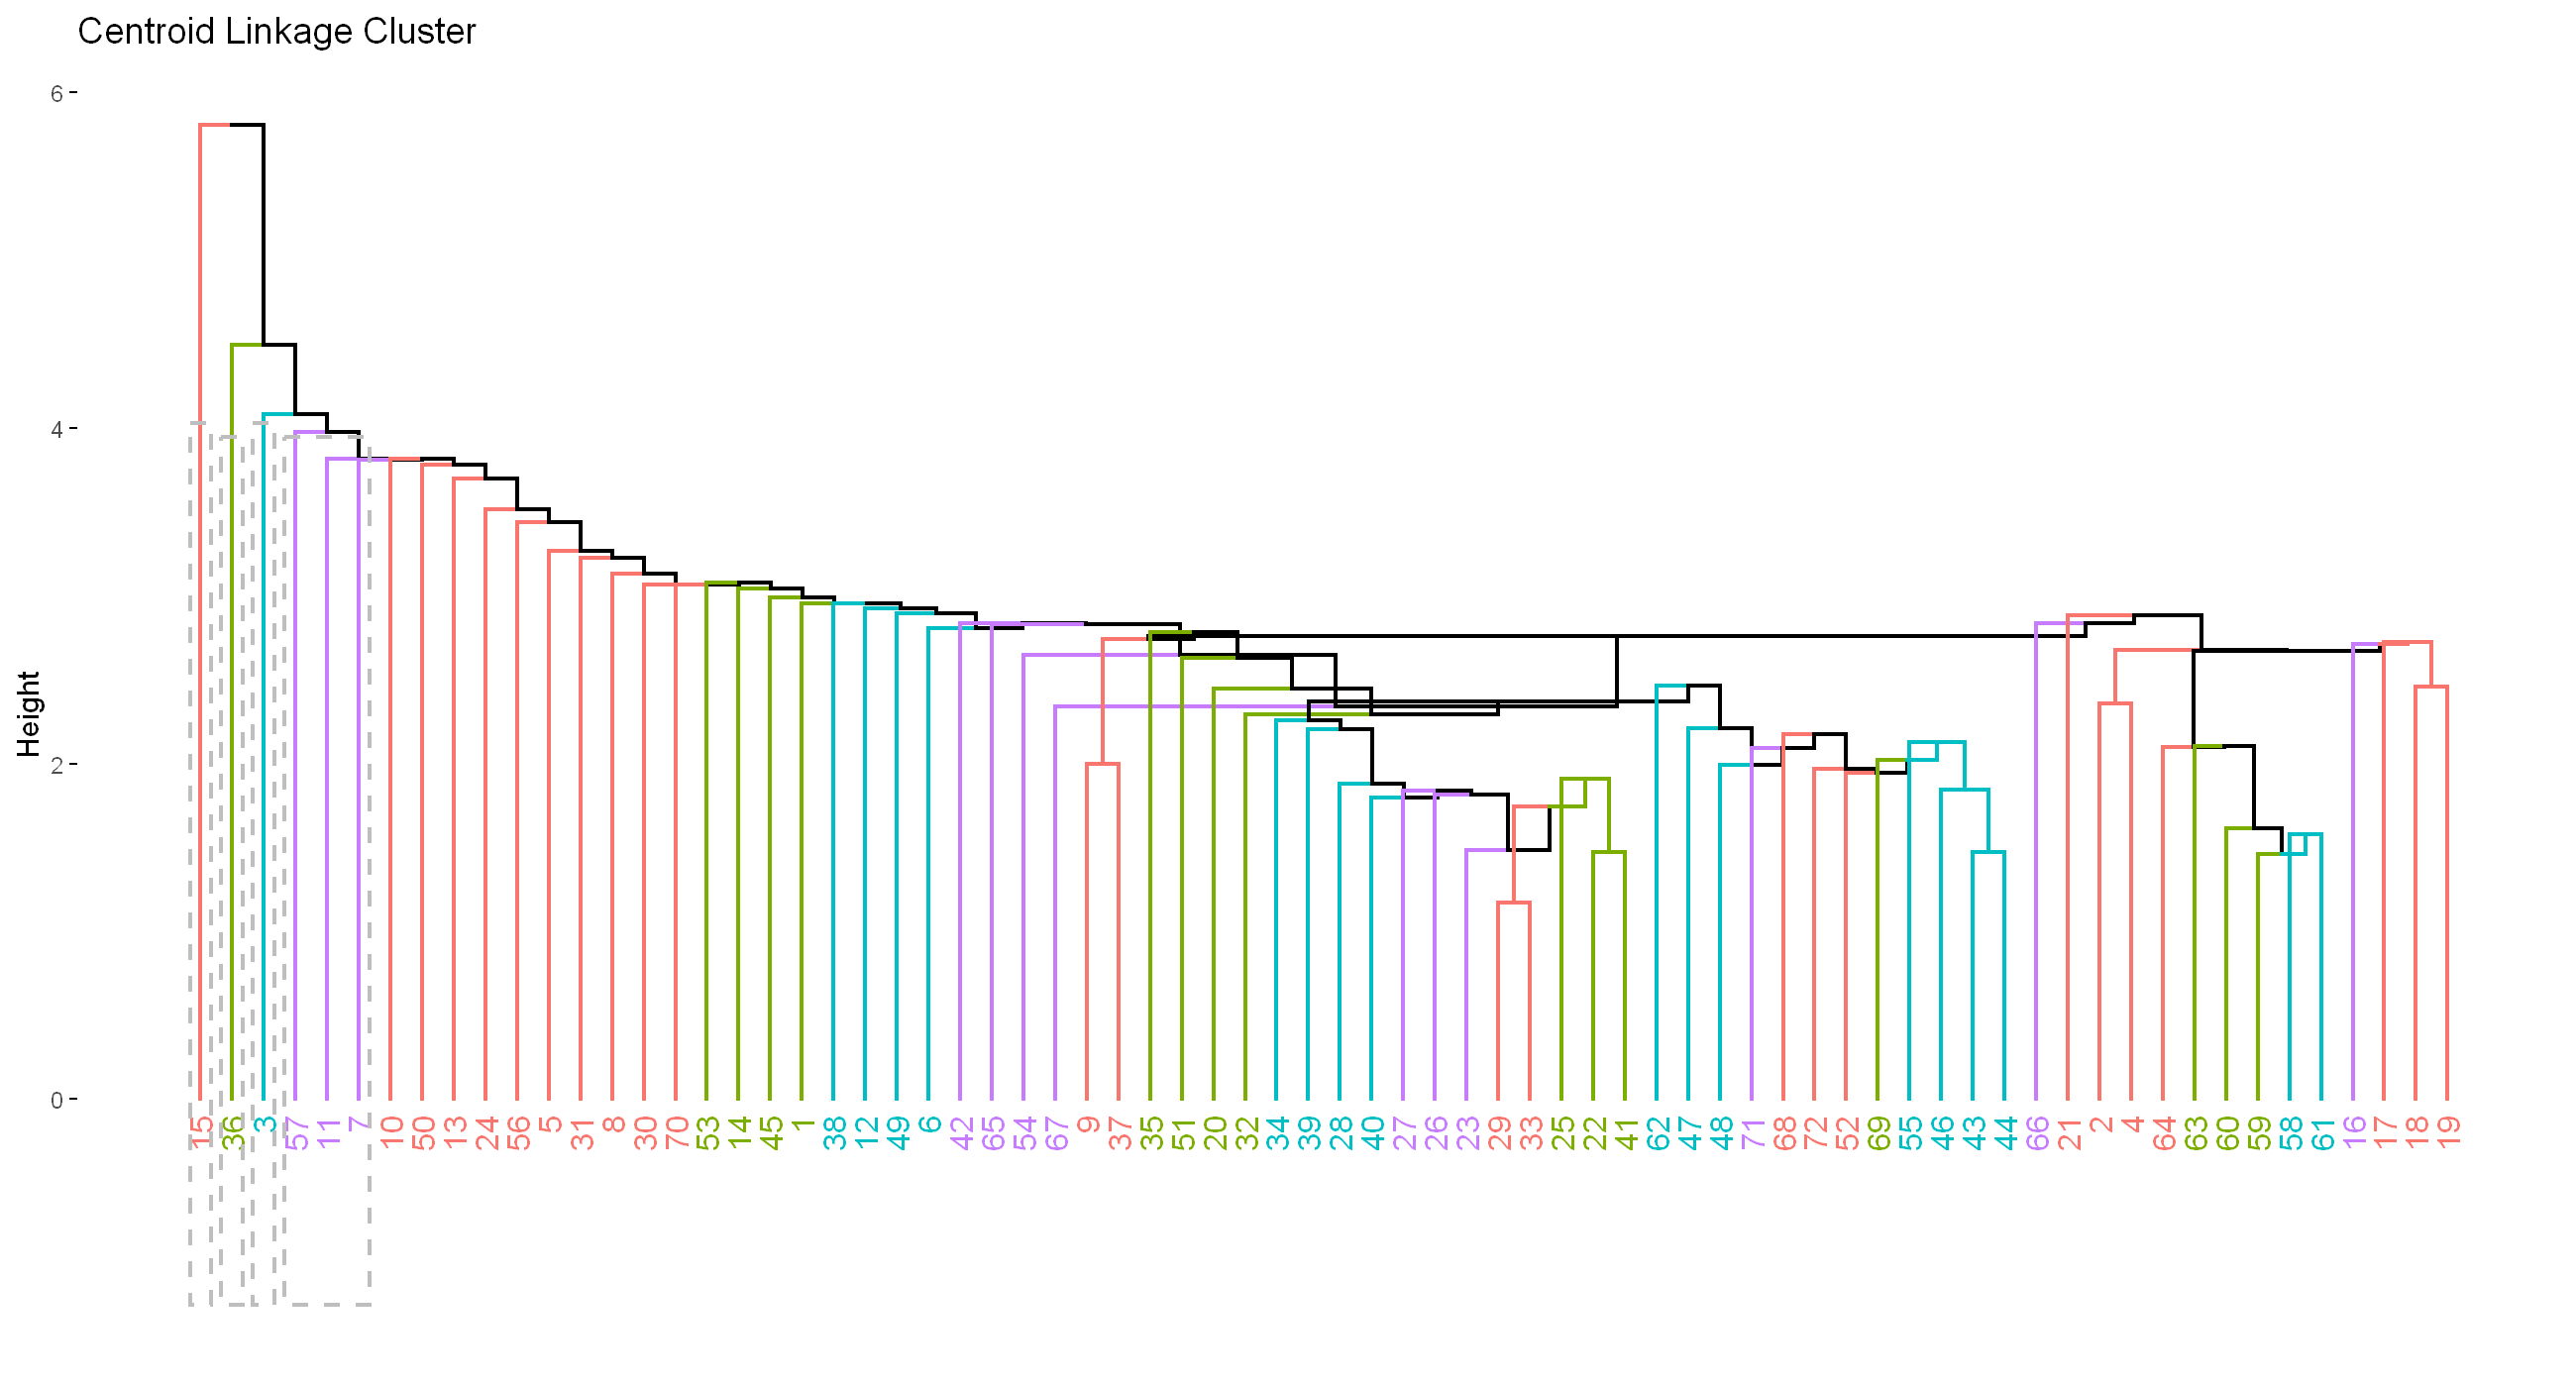

In [ ]:
fviz_dend(cen_hc, k = 4, rect = T, main = "Centroid Linkage Cluster")

In [ ]:
centroid_coph <- cophenetic(cen_hc)
cor(centroid_coph, dist_data_euc)

cen_clust <- cutree(cen_hc, k = 4)
table(cen_clust)

[1] 0.57048

cen_clust
 1  2  3  4 
69  1  1  1 

### 5. Ward’s minimum Variance

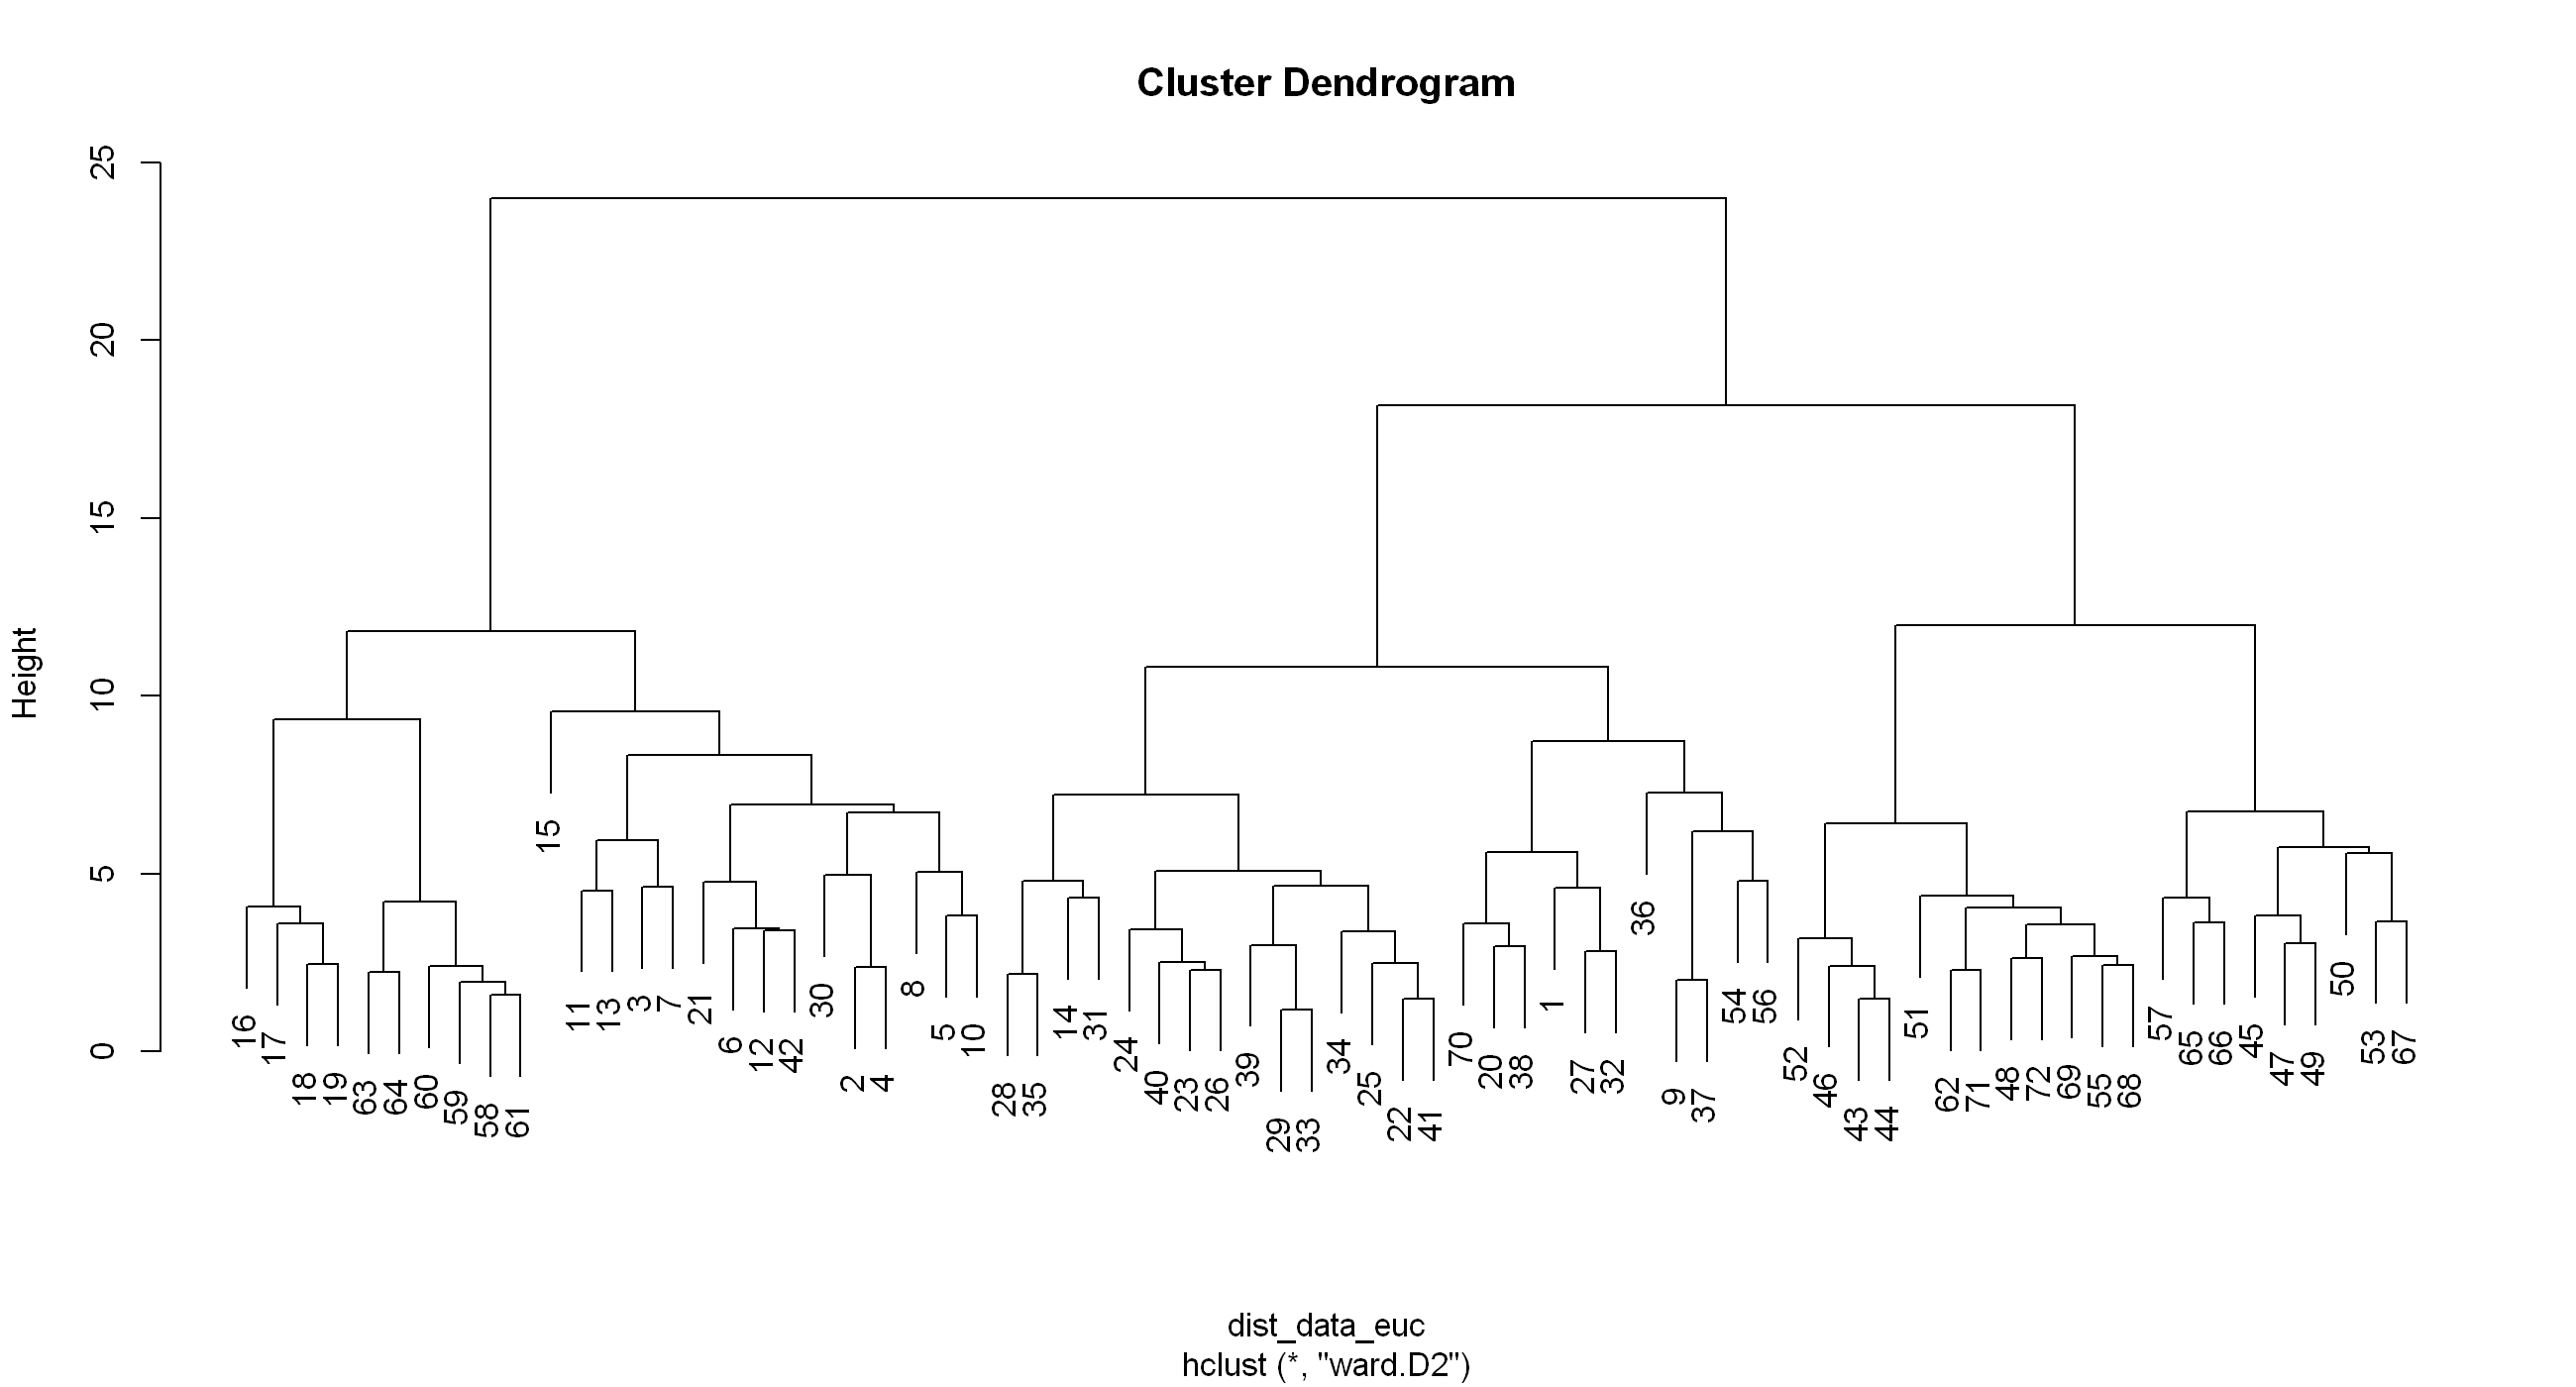

In [ ]:
ward_hc <- hclust(dist_data_euc, method="ward.D2")
plot(hclust(dist_data_euc, method="ward.D2"))

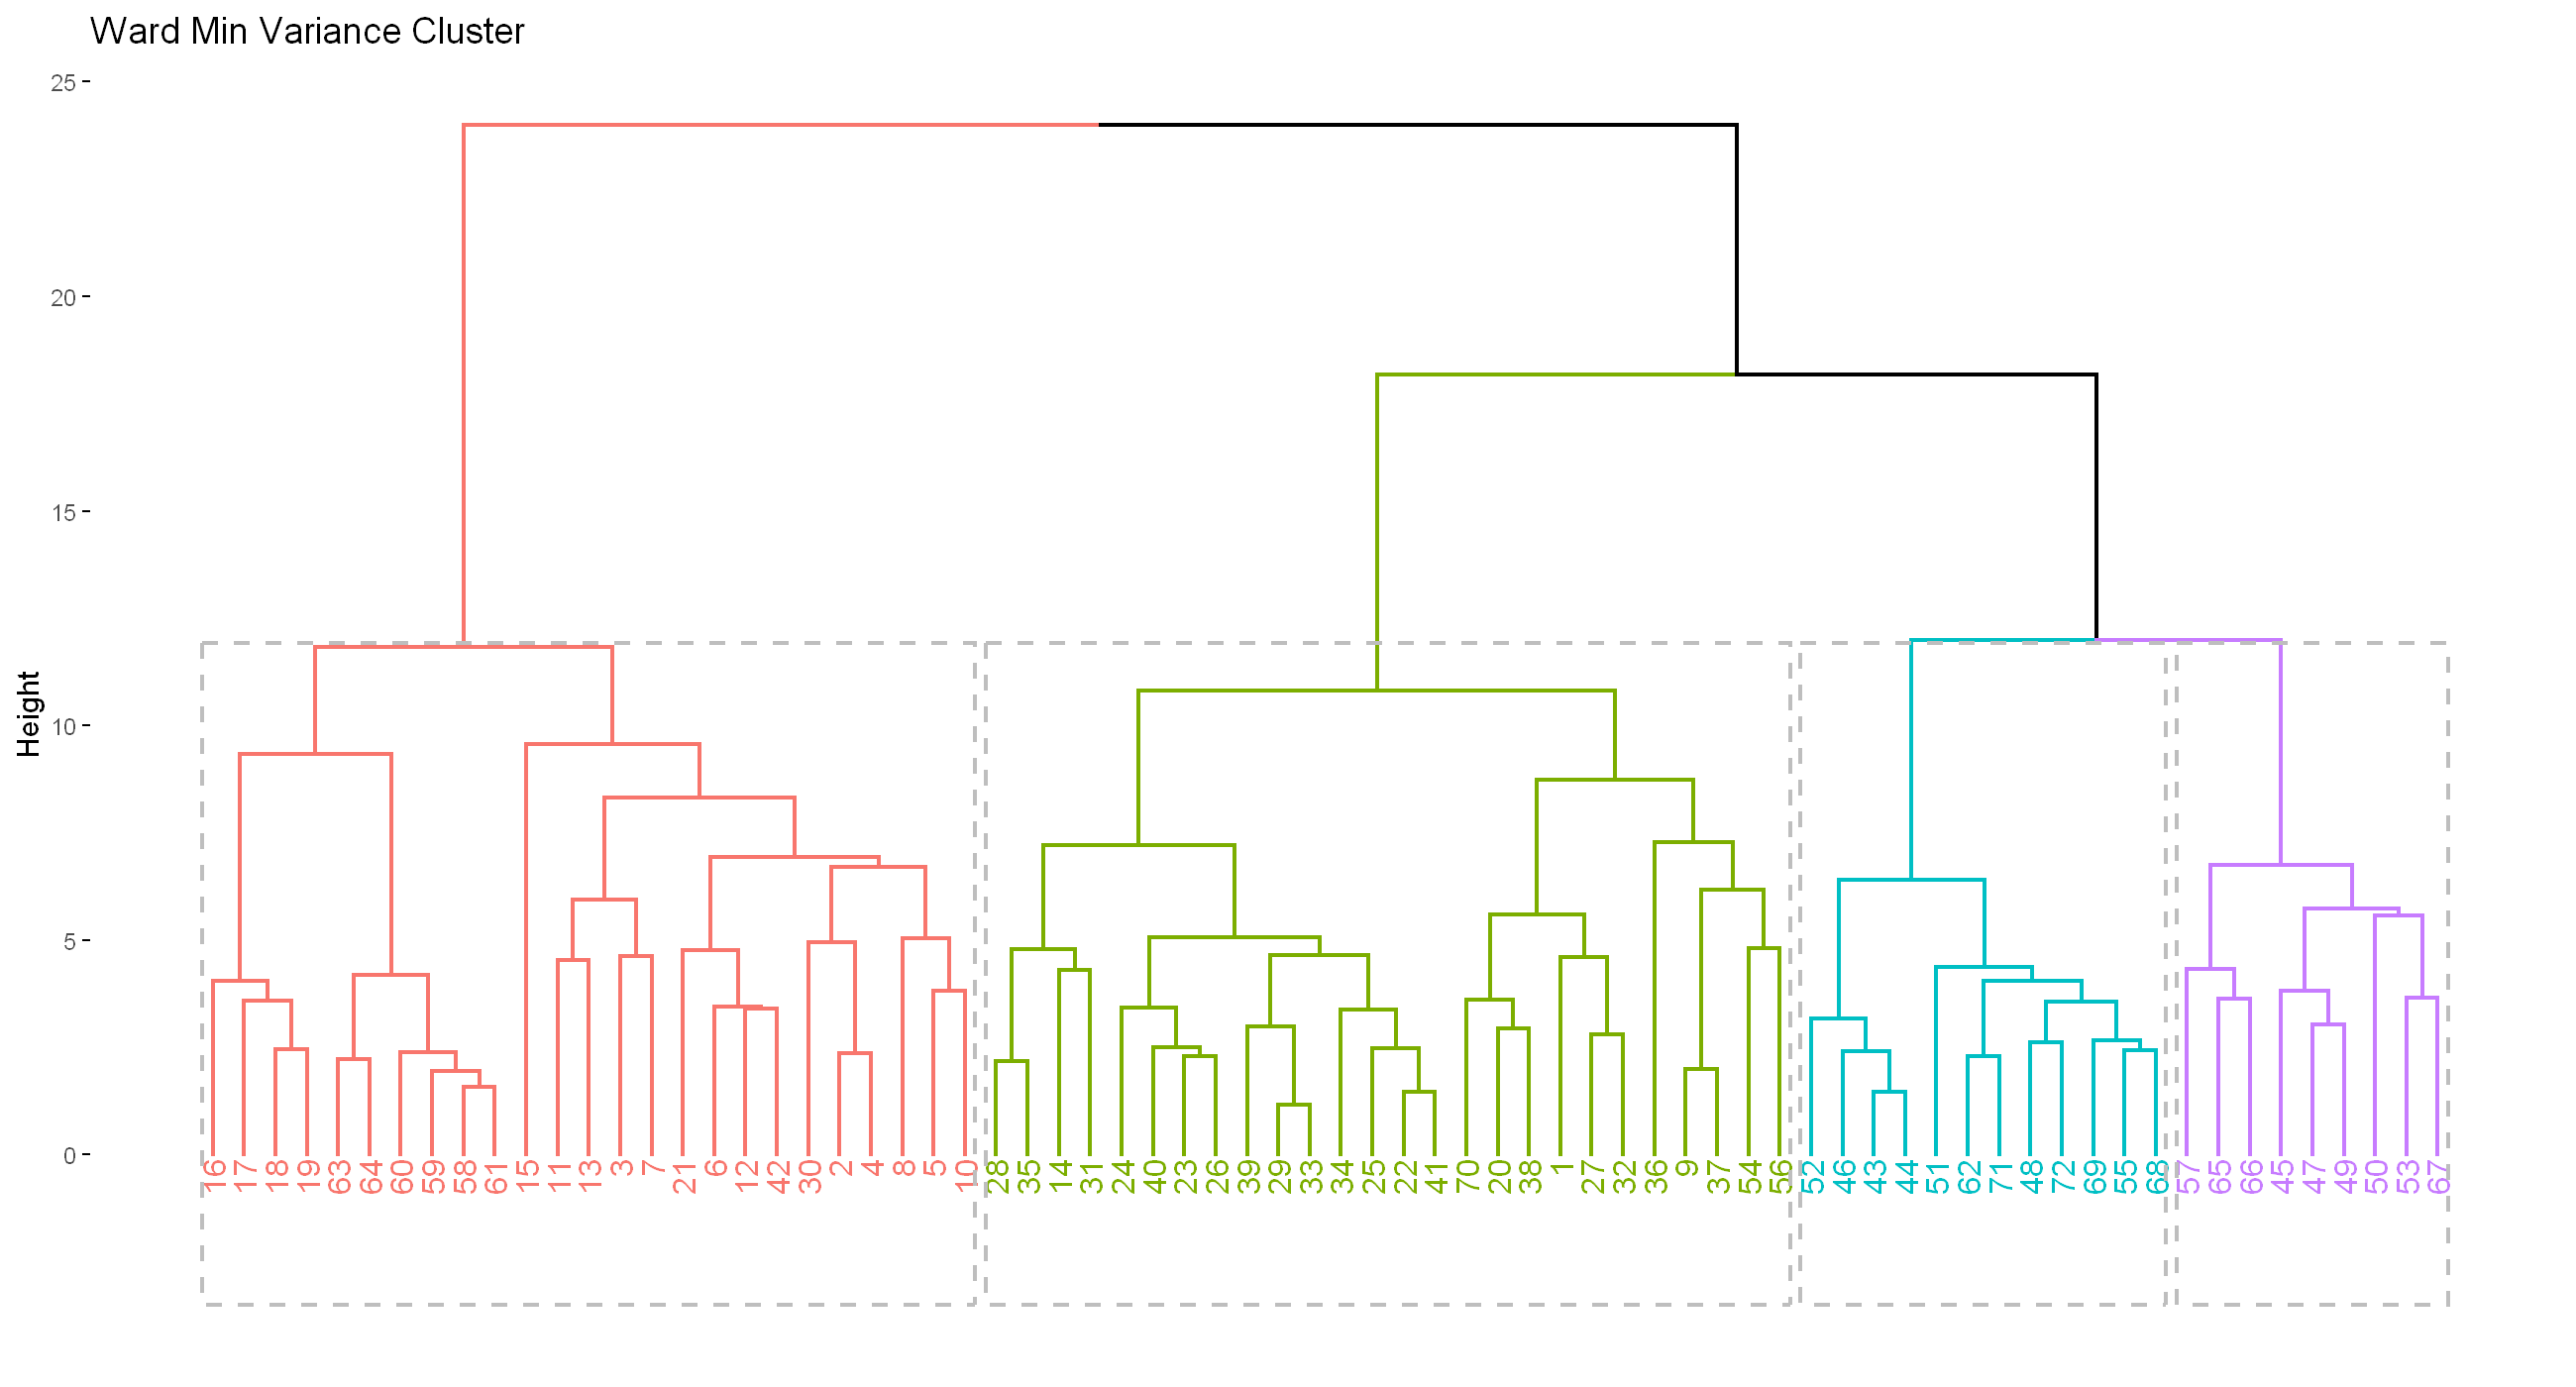

In [ ]:
fviz_dend(ward_hc, k = 4, rect = T, main = "Ward Min Variance Cluster")

In [ ]:
ward_coph <- cophenetic(ward_hc)
cor(ward_coph, dist_data_euc)

ward_clust <- cutree(ward_hc, k = 4)
table(ward_clust)

[1] 0.6144728

ward_clust
 1  2  3  4 
26 25 12  9 

### 6. Pemilihan Dendrogram dan Banyak Cluster

In [ ]:
data.frame(complete = cor(complete_coph, dist_data_euc),
          single = cor(single_coph, dist_data_euc),
          average = cor(avg_coph, dist_data_euc),
          centroid = cor(centroid_coph, dist_data_euc),
          ward = cor(ward_coph, dist_data_euc)) %>%

tidyr::pivot_longer(cols = colnames(.),names_to = "method", values_to = "correlation")

method,correlation
<chr>,<dbl>
complete,0.6425443
single,0.6364644
average,0.7538292
centroid,0.5704800
ward,0.6144728


Dapat terlihat bahwa nilai korelasi yang dihasilkan average linkage paling tinggi dibanding metode lainnya, disusul oleh complete linkage, dan single linkage.

Mempertimbangkan pula dendrogram yang dihasilkan, dendrogram dari average linkage menghasilkan cluster outlier yang hanya berisi cea_cervix, dan ditakutkan membuat hasil clustering tidak optimal.

Oleh karena itu, akan dipilih metode ward minimum variance dengan pertimbangan hasil correlation yang lumayan tinggi dan menghasilkan dendrogram yang cukup mudah diinterpretasikan.

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


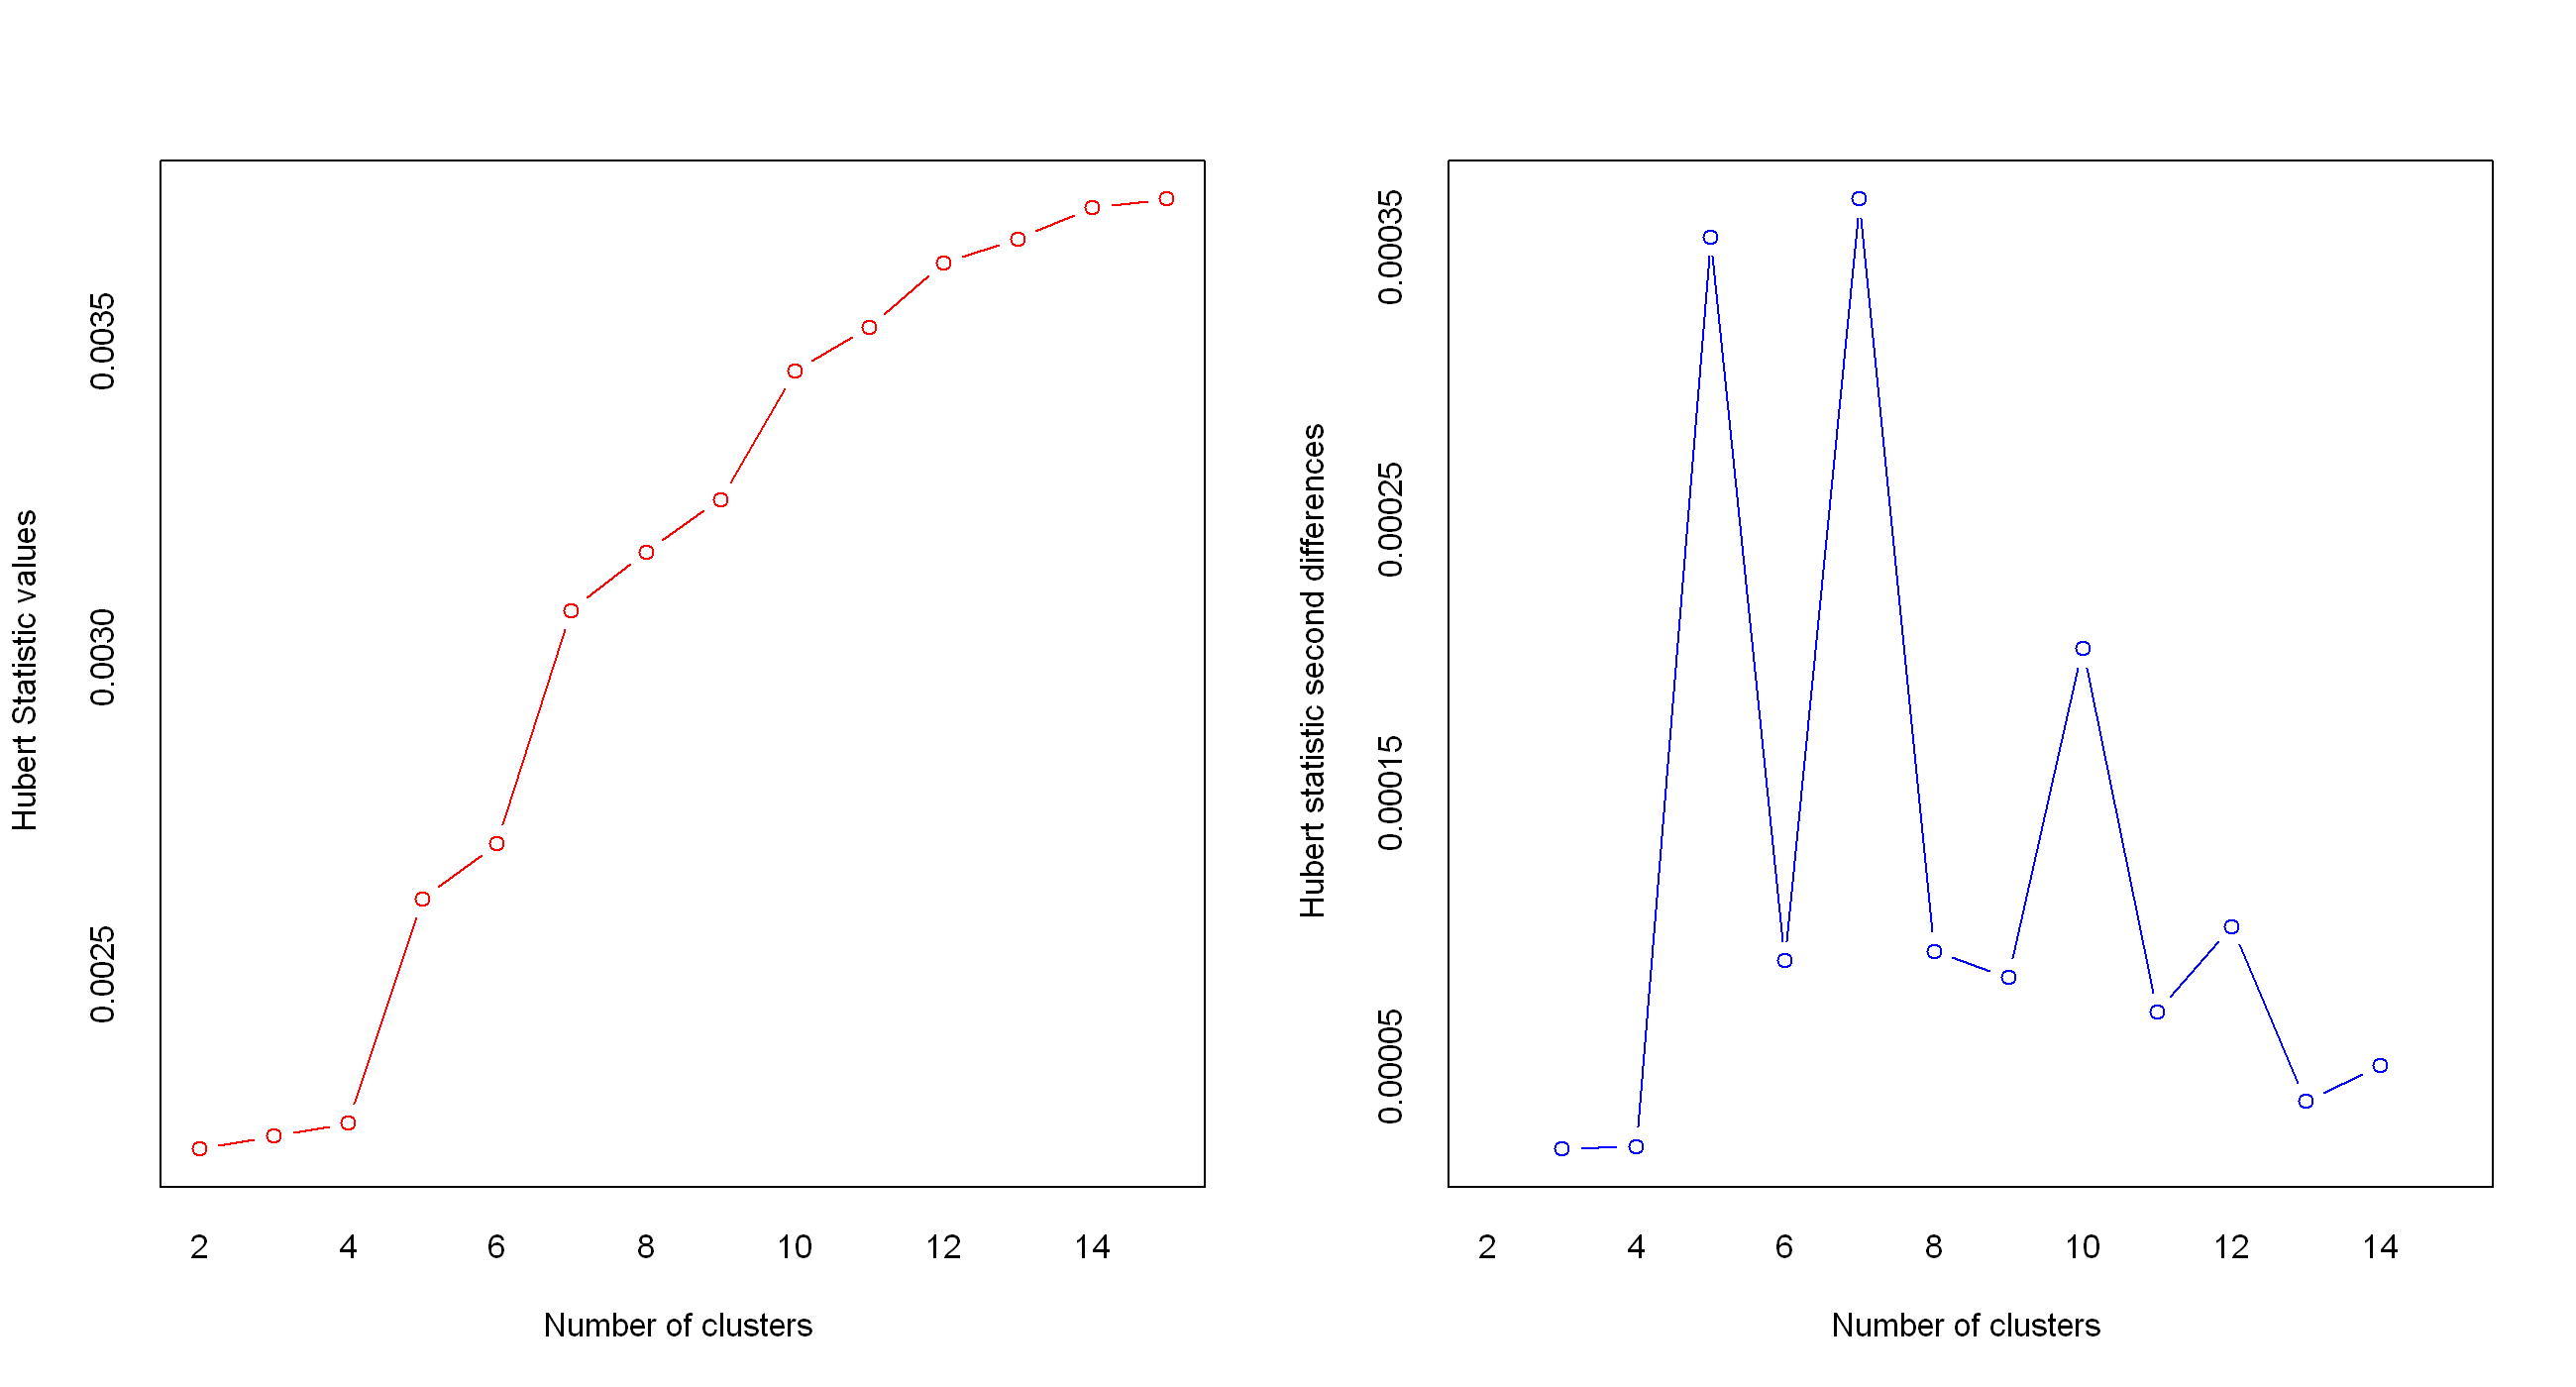

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 10 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 2 proposed 11 as the best number of clusters 
* 4 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
*************************

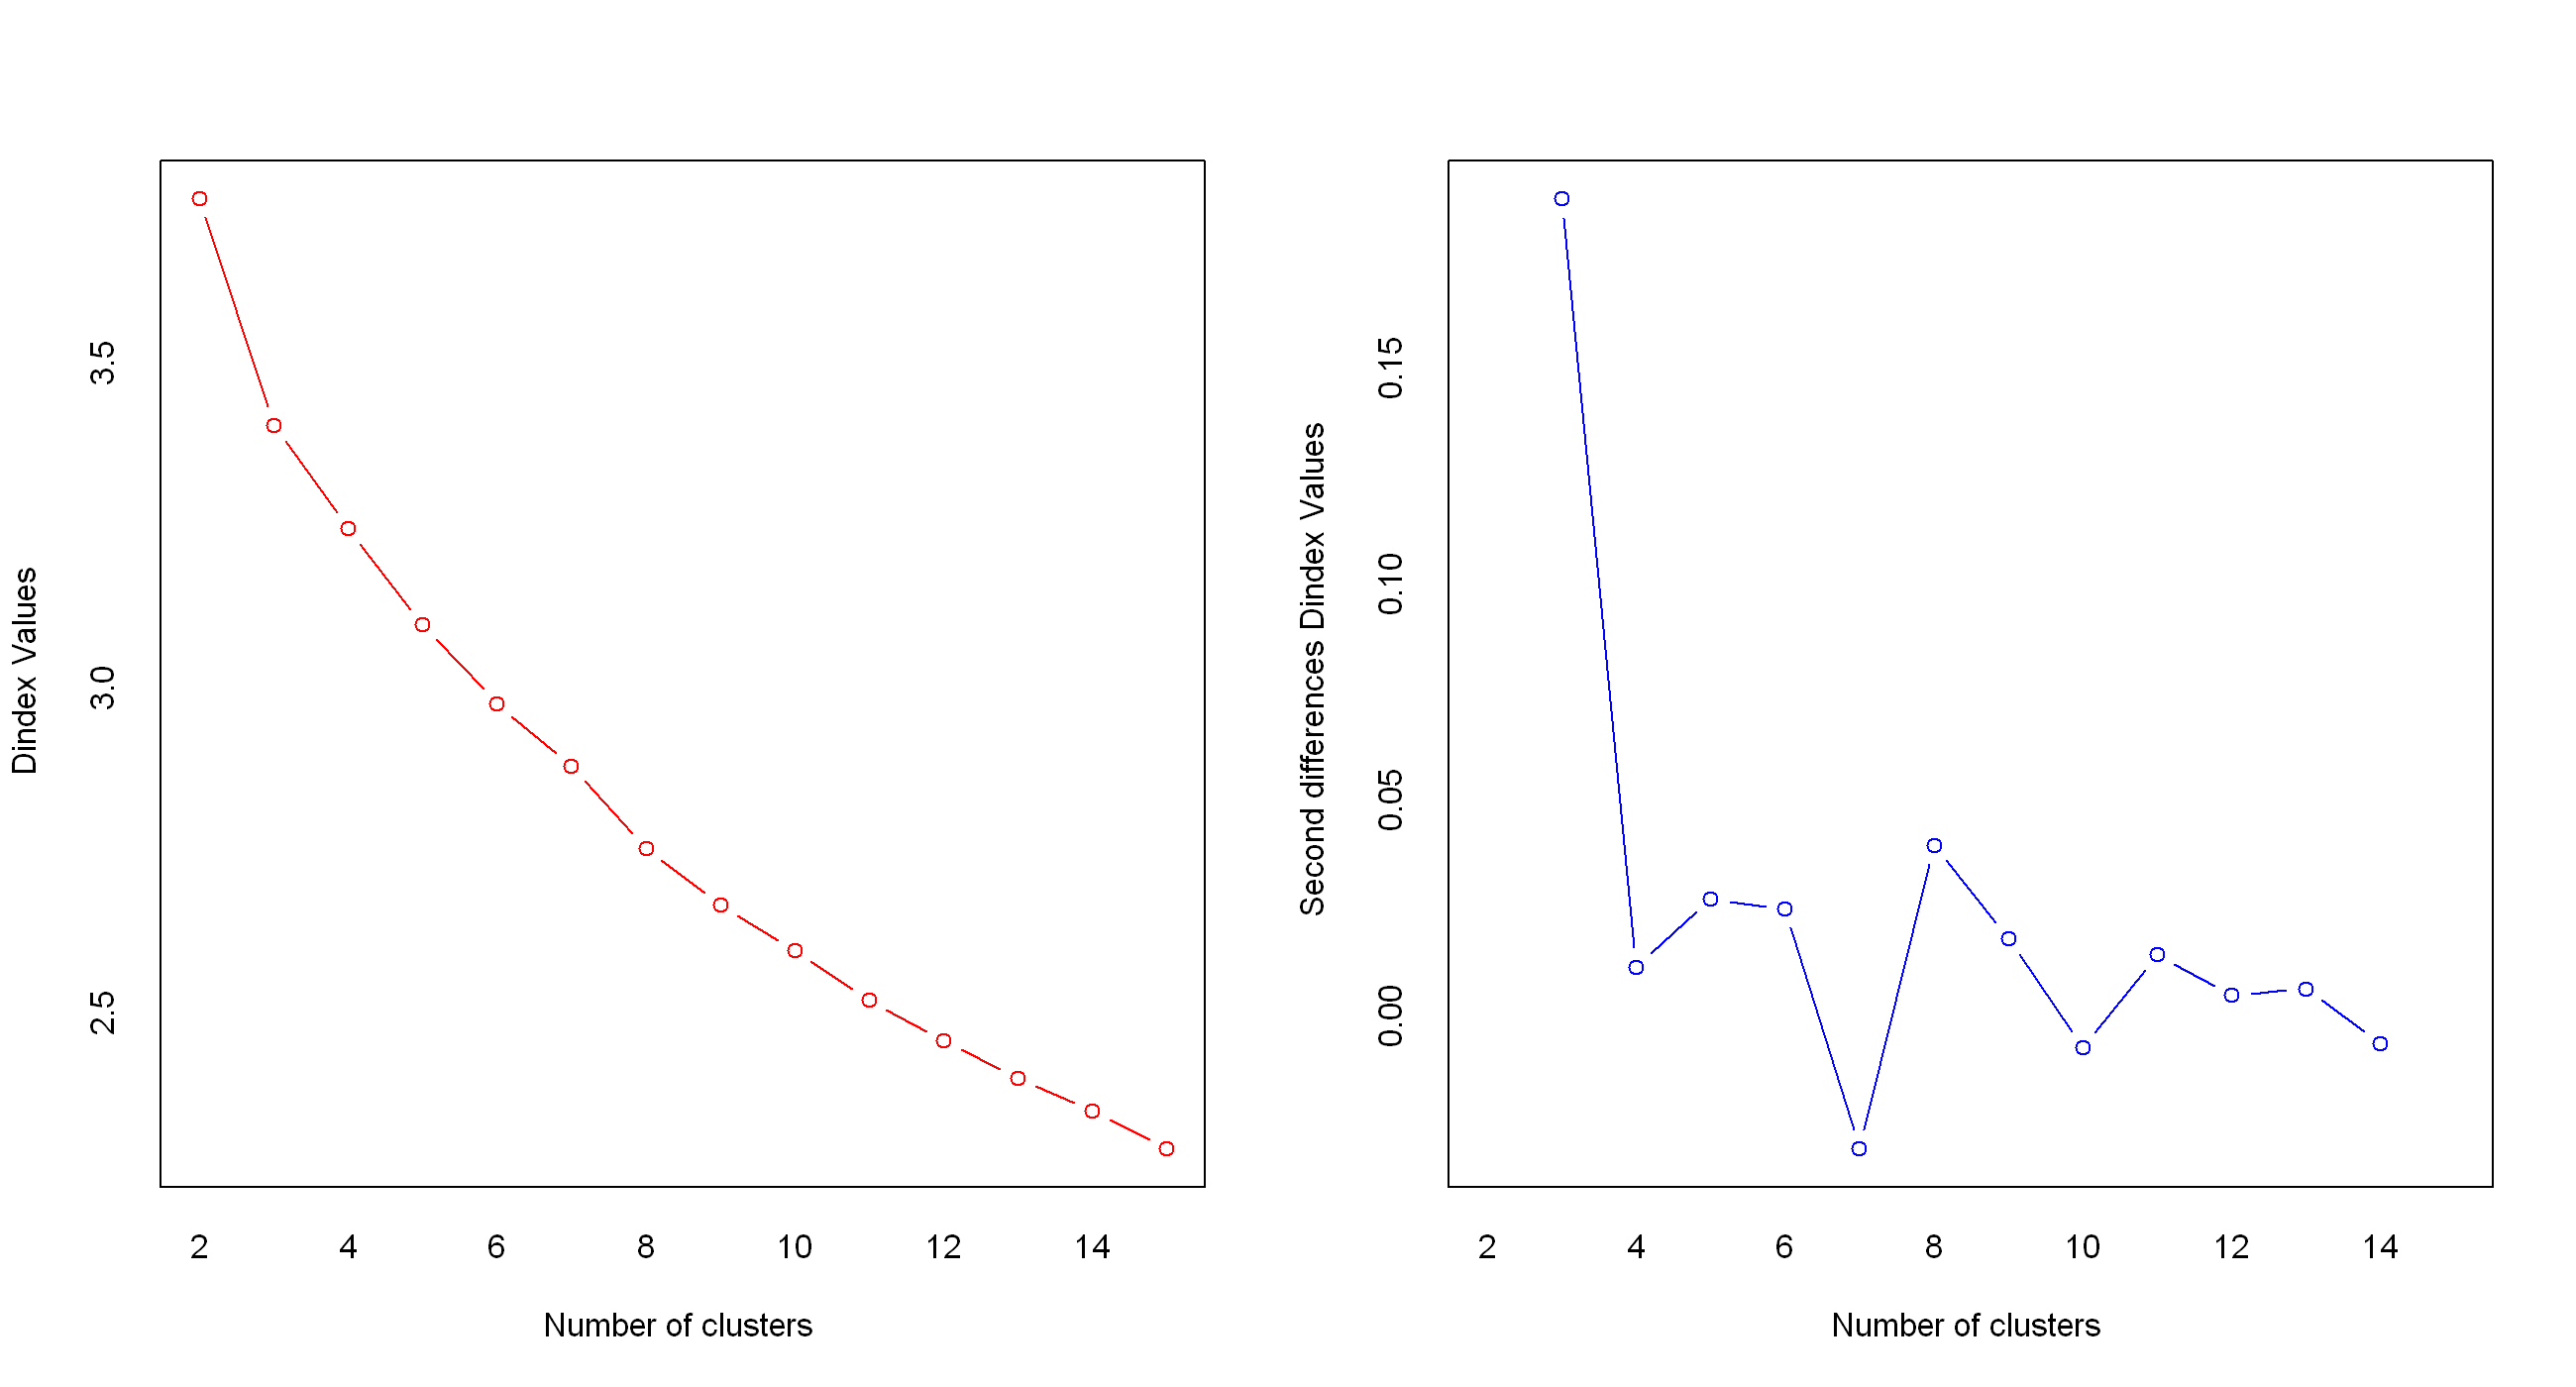

In [ ]:
nb <- NbClust(data = datanew, diss = NULL, distance = "euclidean", min.nc = 2, max.nc = 15, method = "ward.D2")

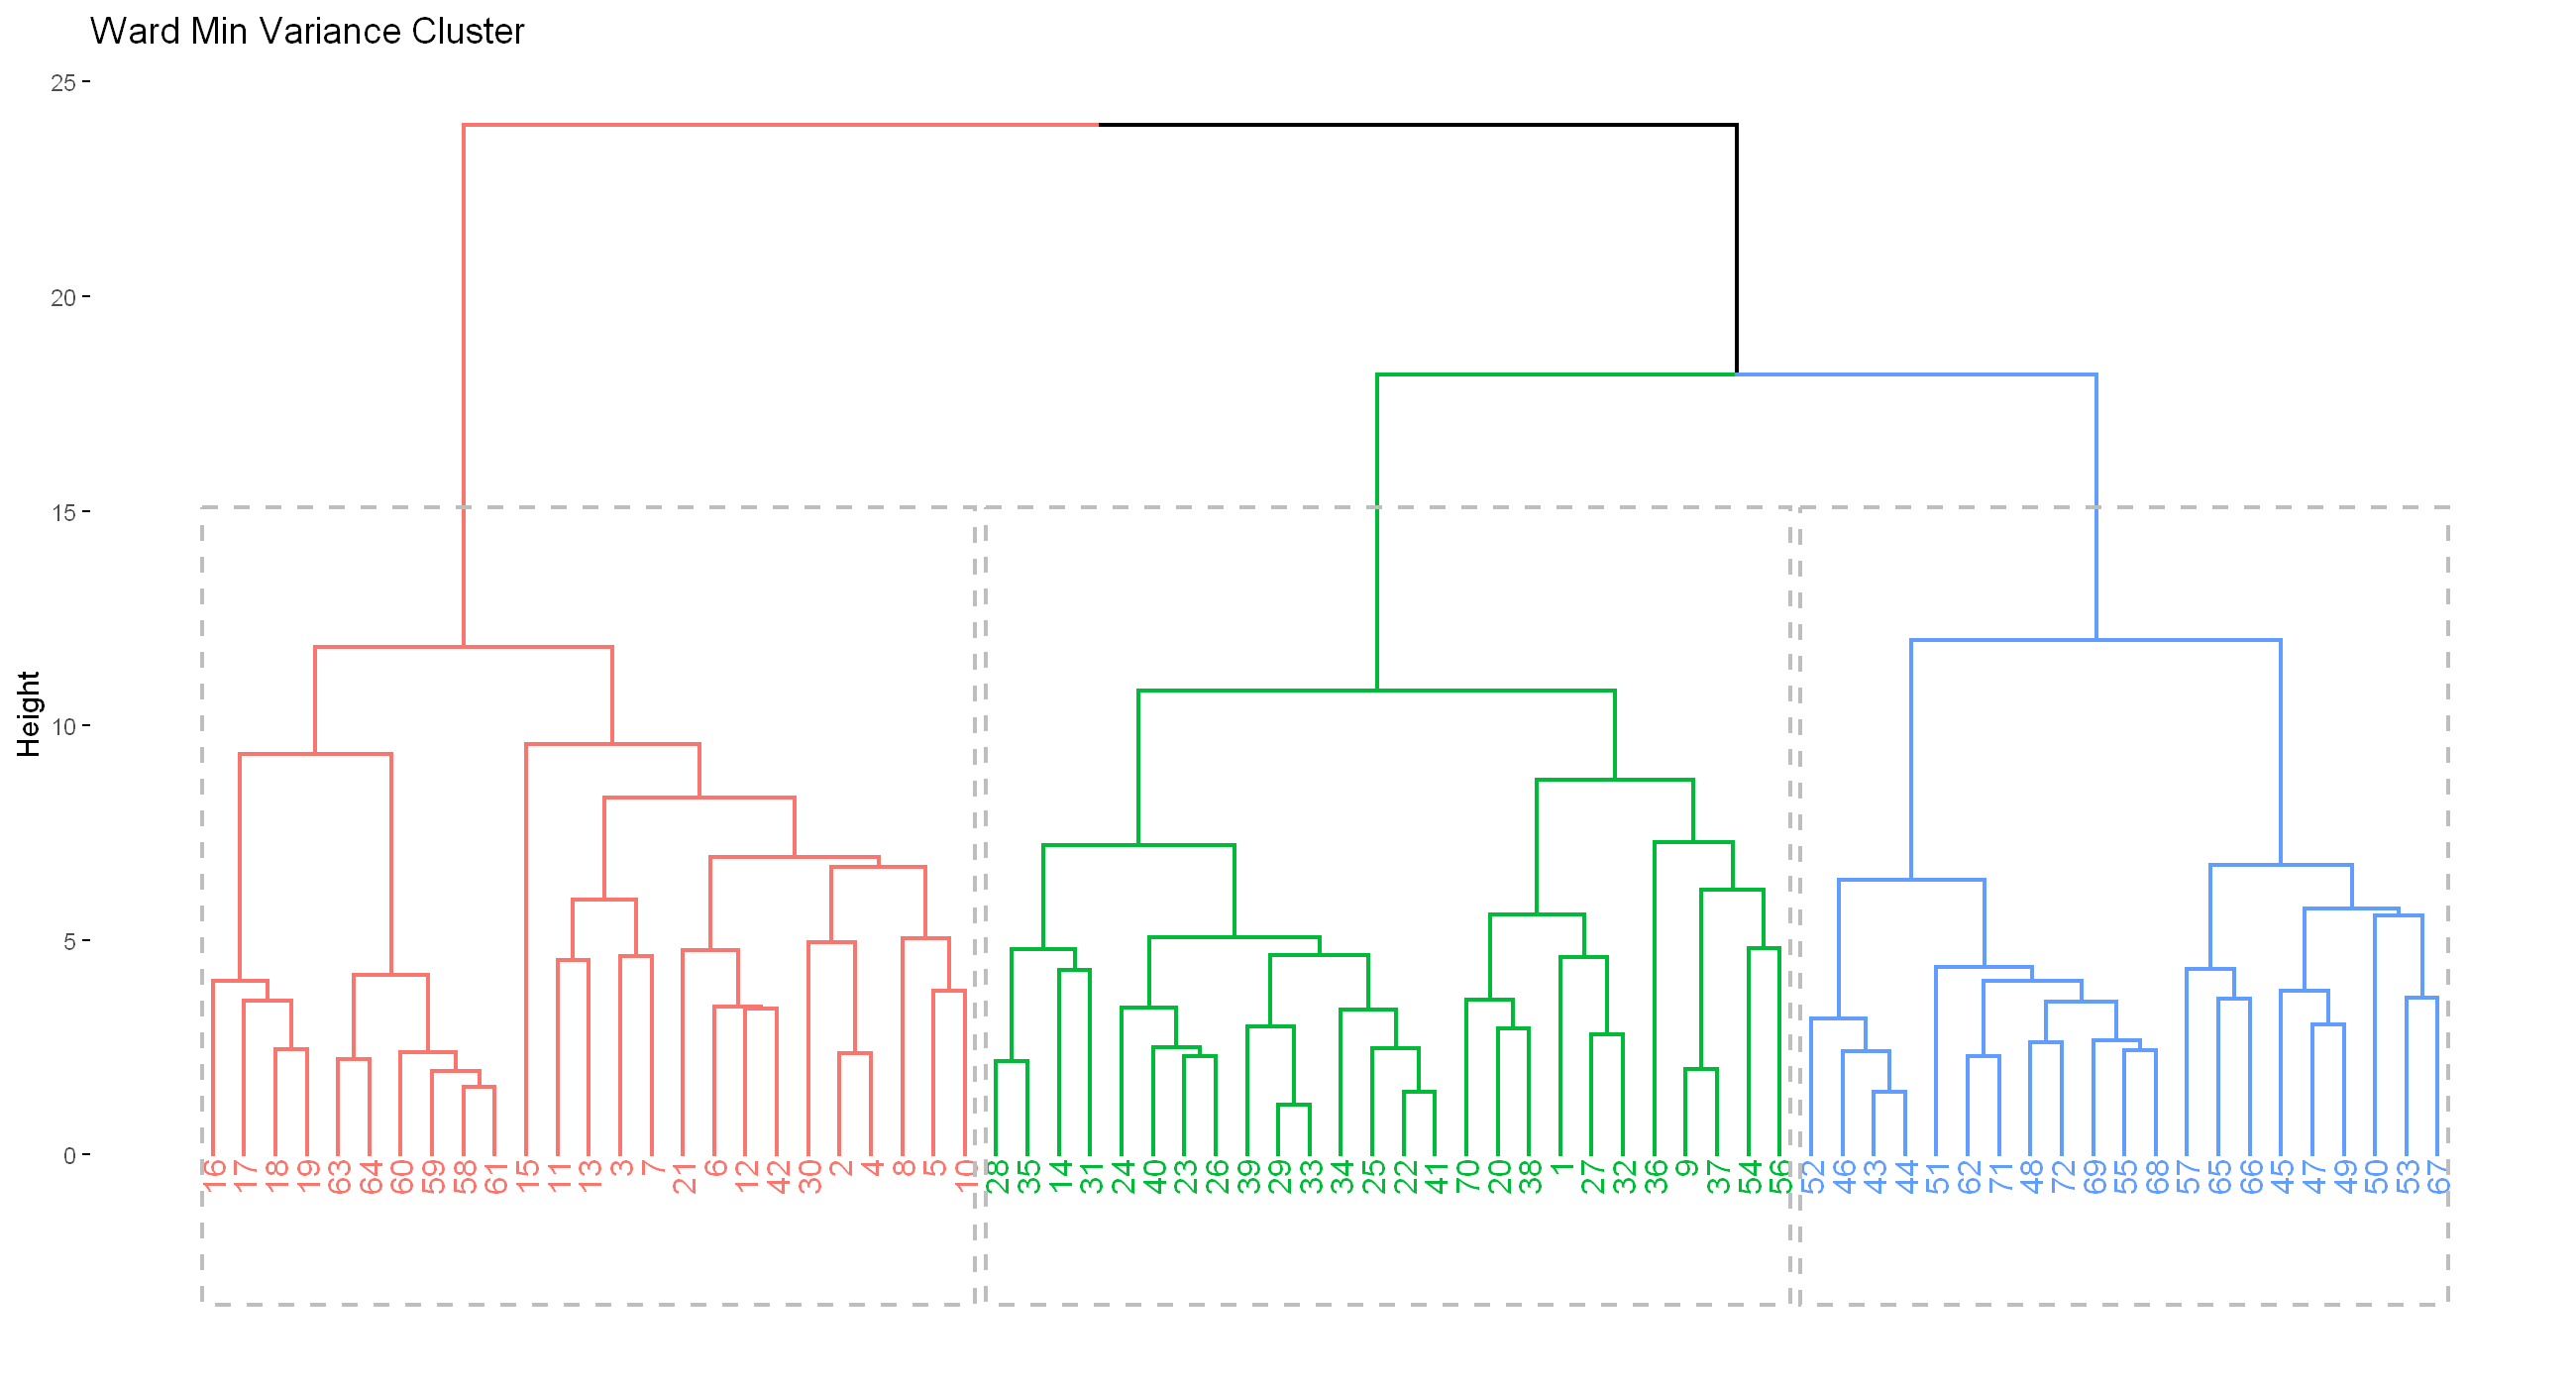

In [ ]:
fviz_dend(ward_hc, k = 3, rect = T, main = "Ward Min Variance Cluster")

In [ ]:
#yaitu didapatkan jumlah anggota tiap kluster
ward_clust <- cutree(ward_hc, k = 3)
table(ward_clust)

ward_clust
 1  2  3 
26 25 21 

### 7. Scatterplot dari 2 dimensi dengan PCA


Call:
stats::hclust(d = x, method = hc_method)

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 72 


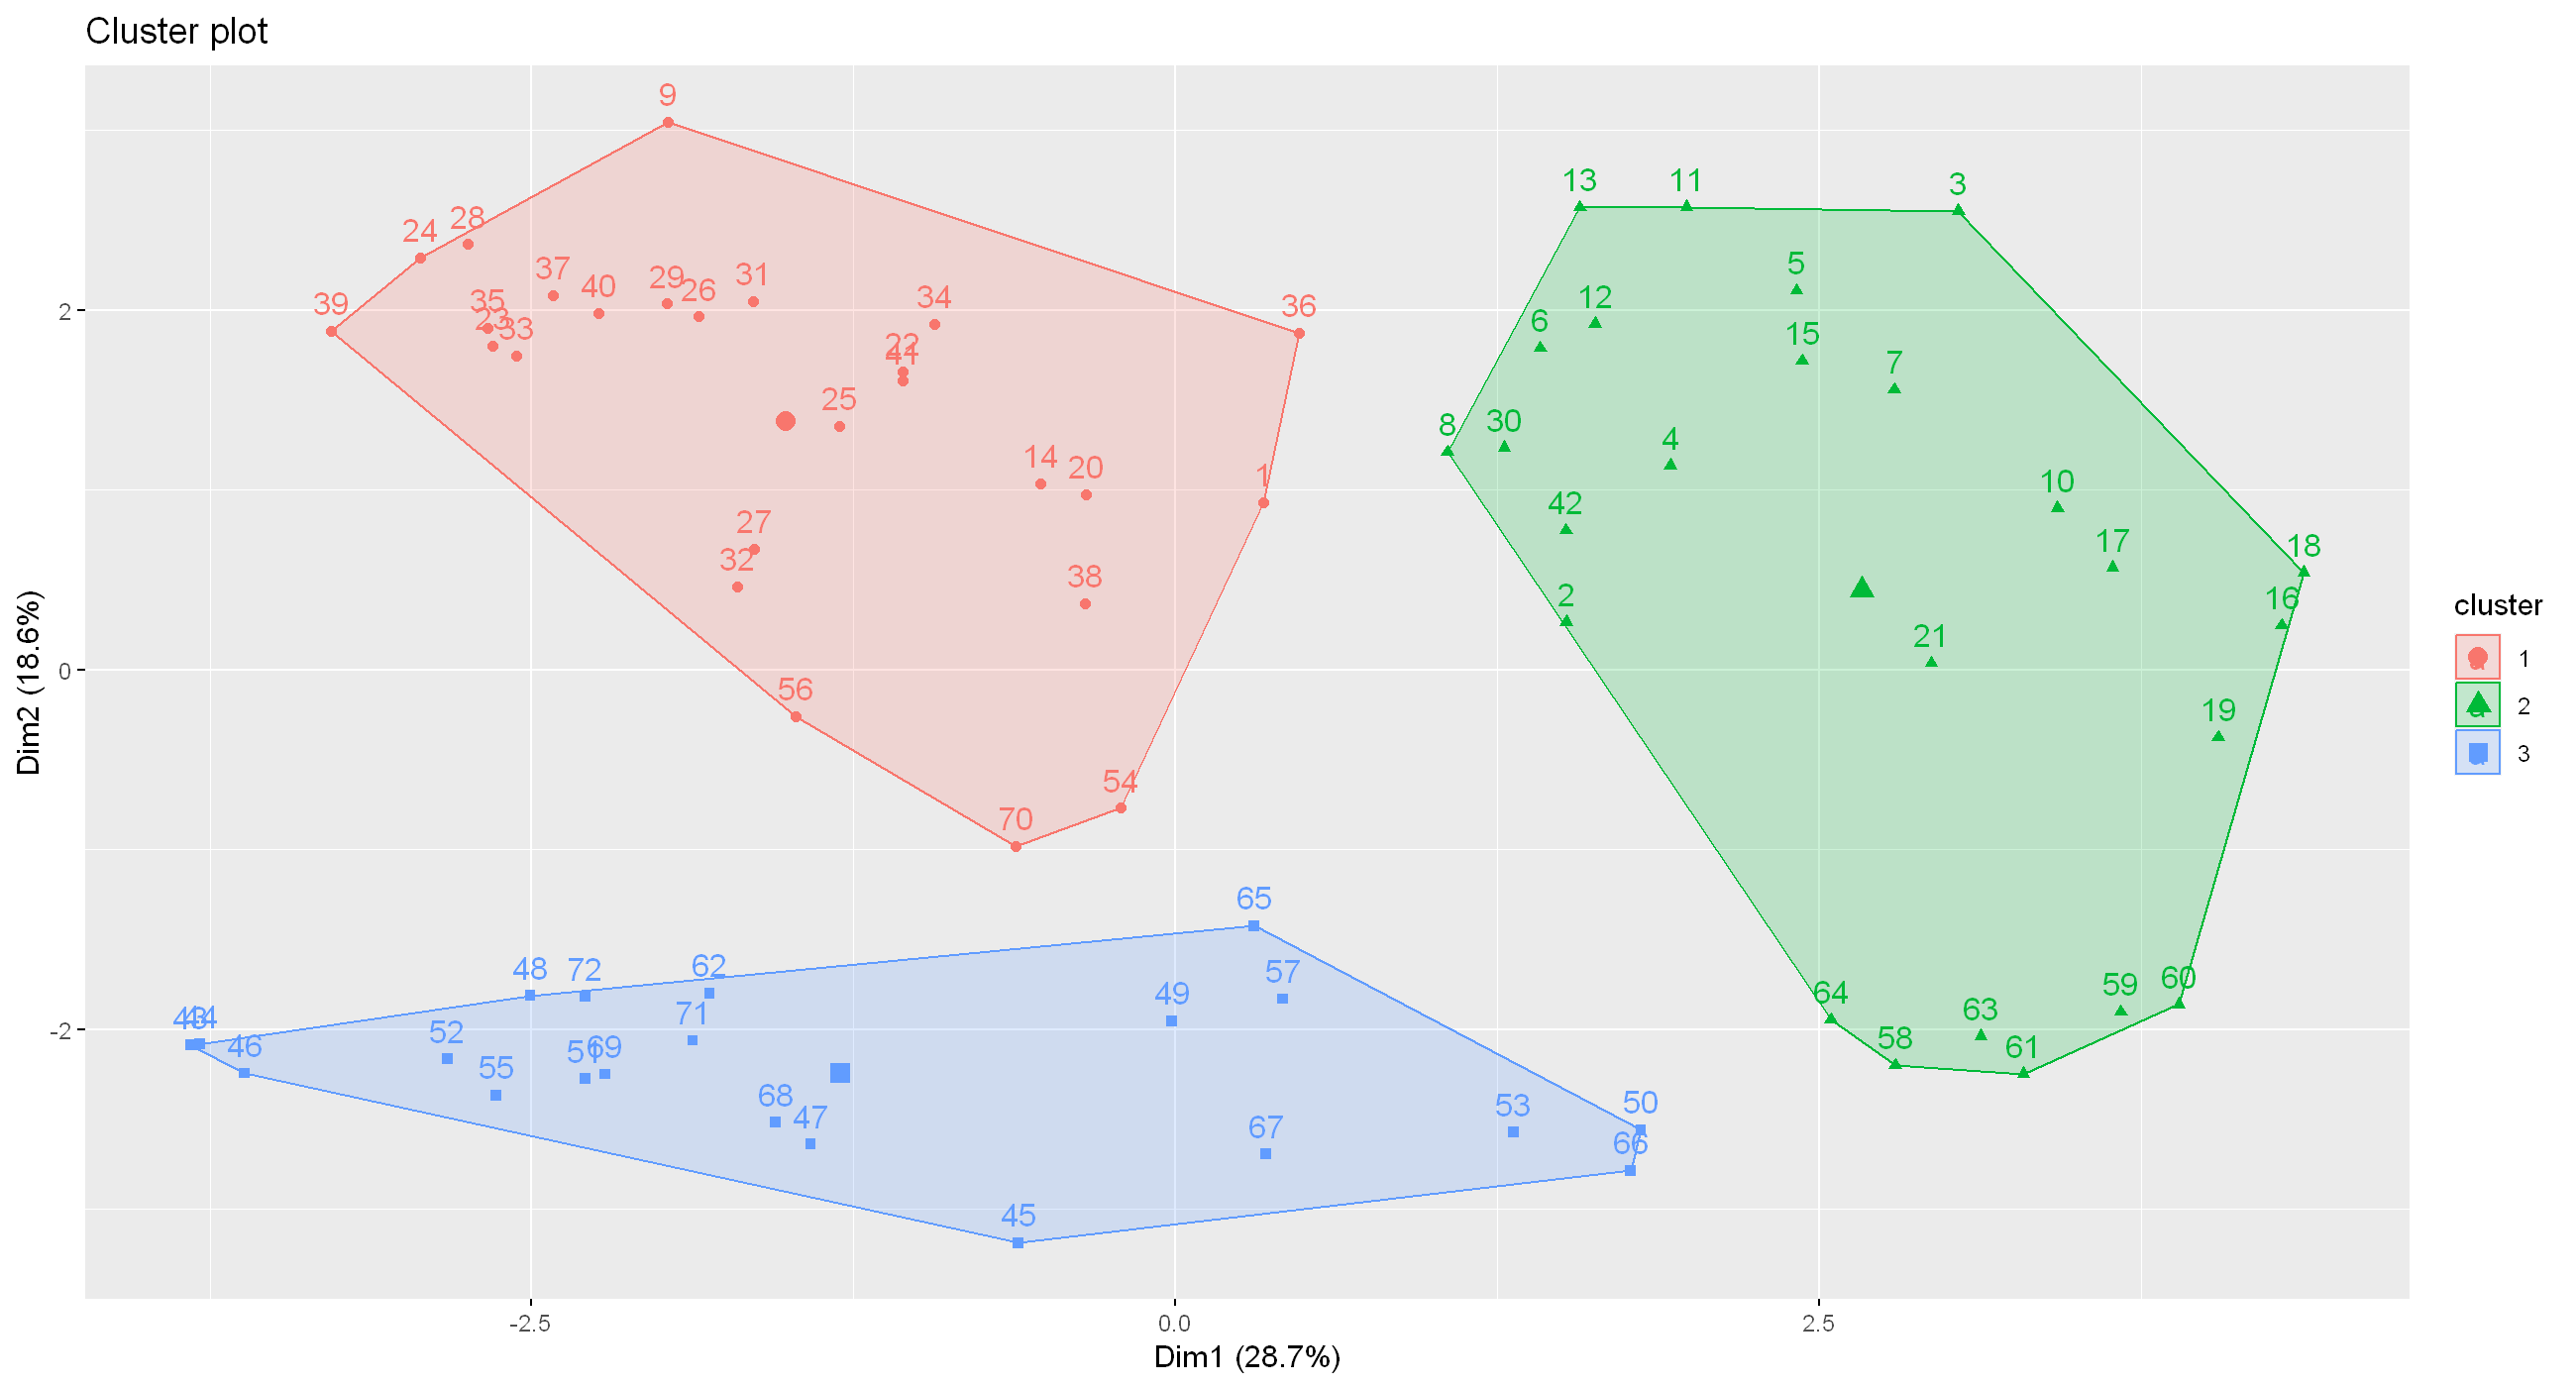

In [ ]:
hc.cut <- hcut(datanew, k = 3, hc_method = "ward.D2")
hc.cut
fviz_cluster(hc.cut, ellipse.type = "convex")

## D. Non-Hierarchical Clustering

**Akan dilakukan dengan metode kmeans, penggunaan metode lainnya seperti kmeans++ bisa dicari sendiri**

### 1. Menentukan ukuran cluster terbaik

#### Elbow Method

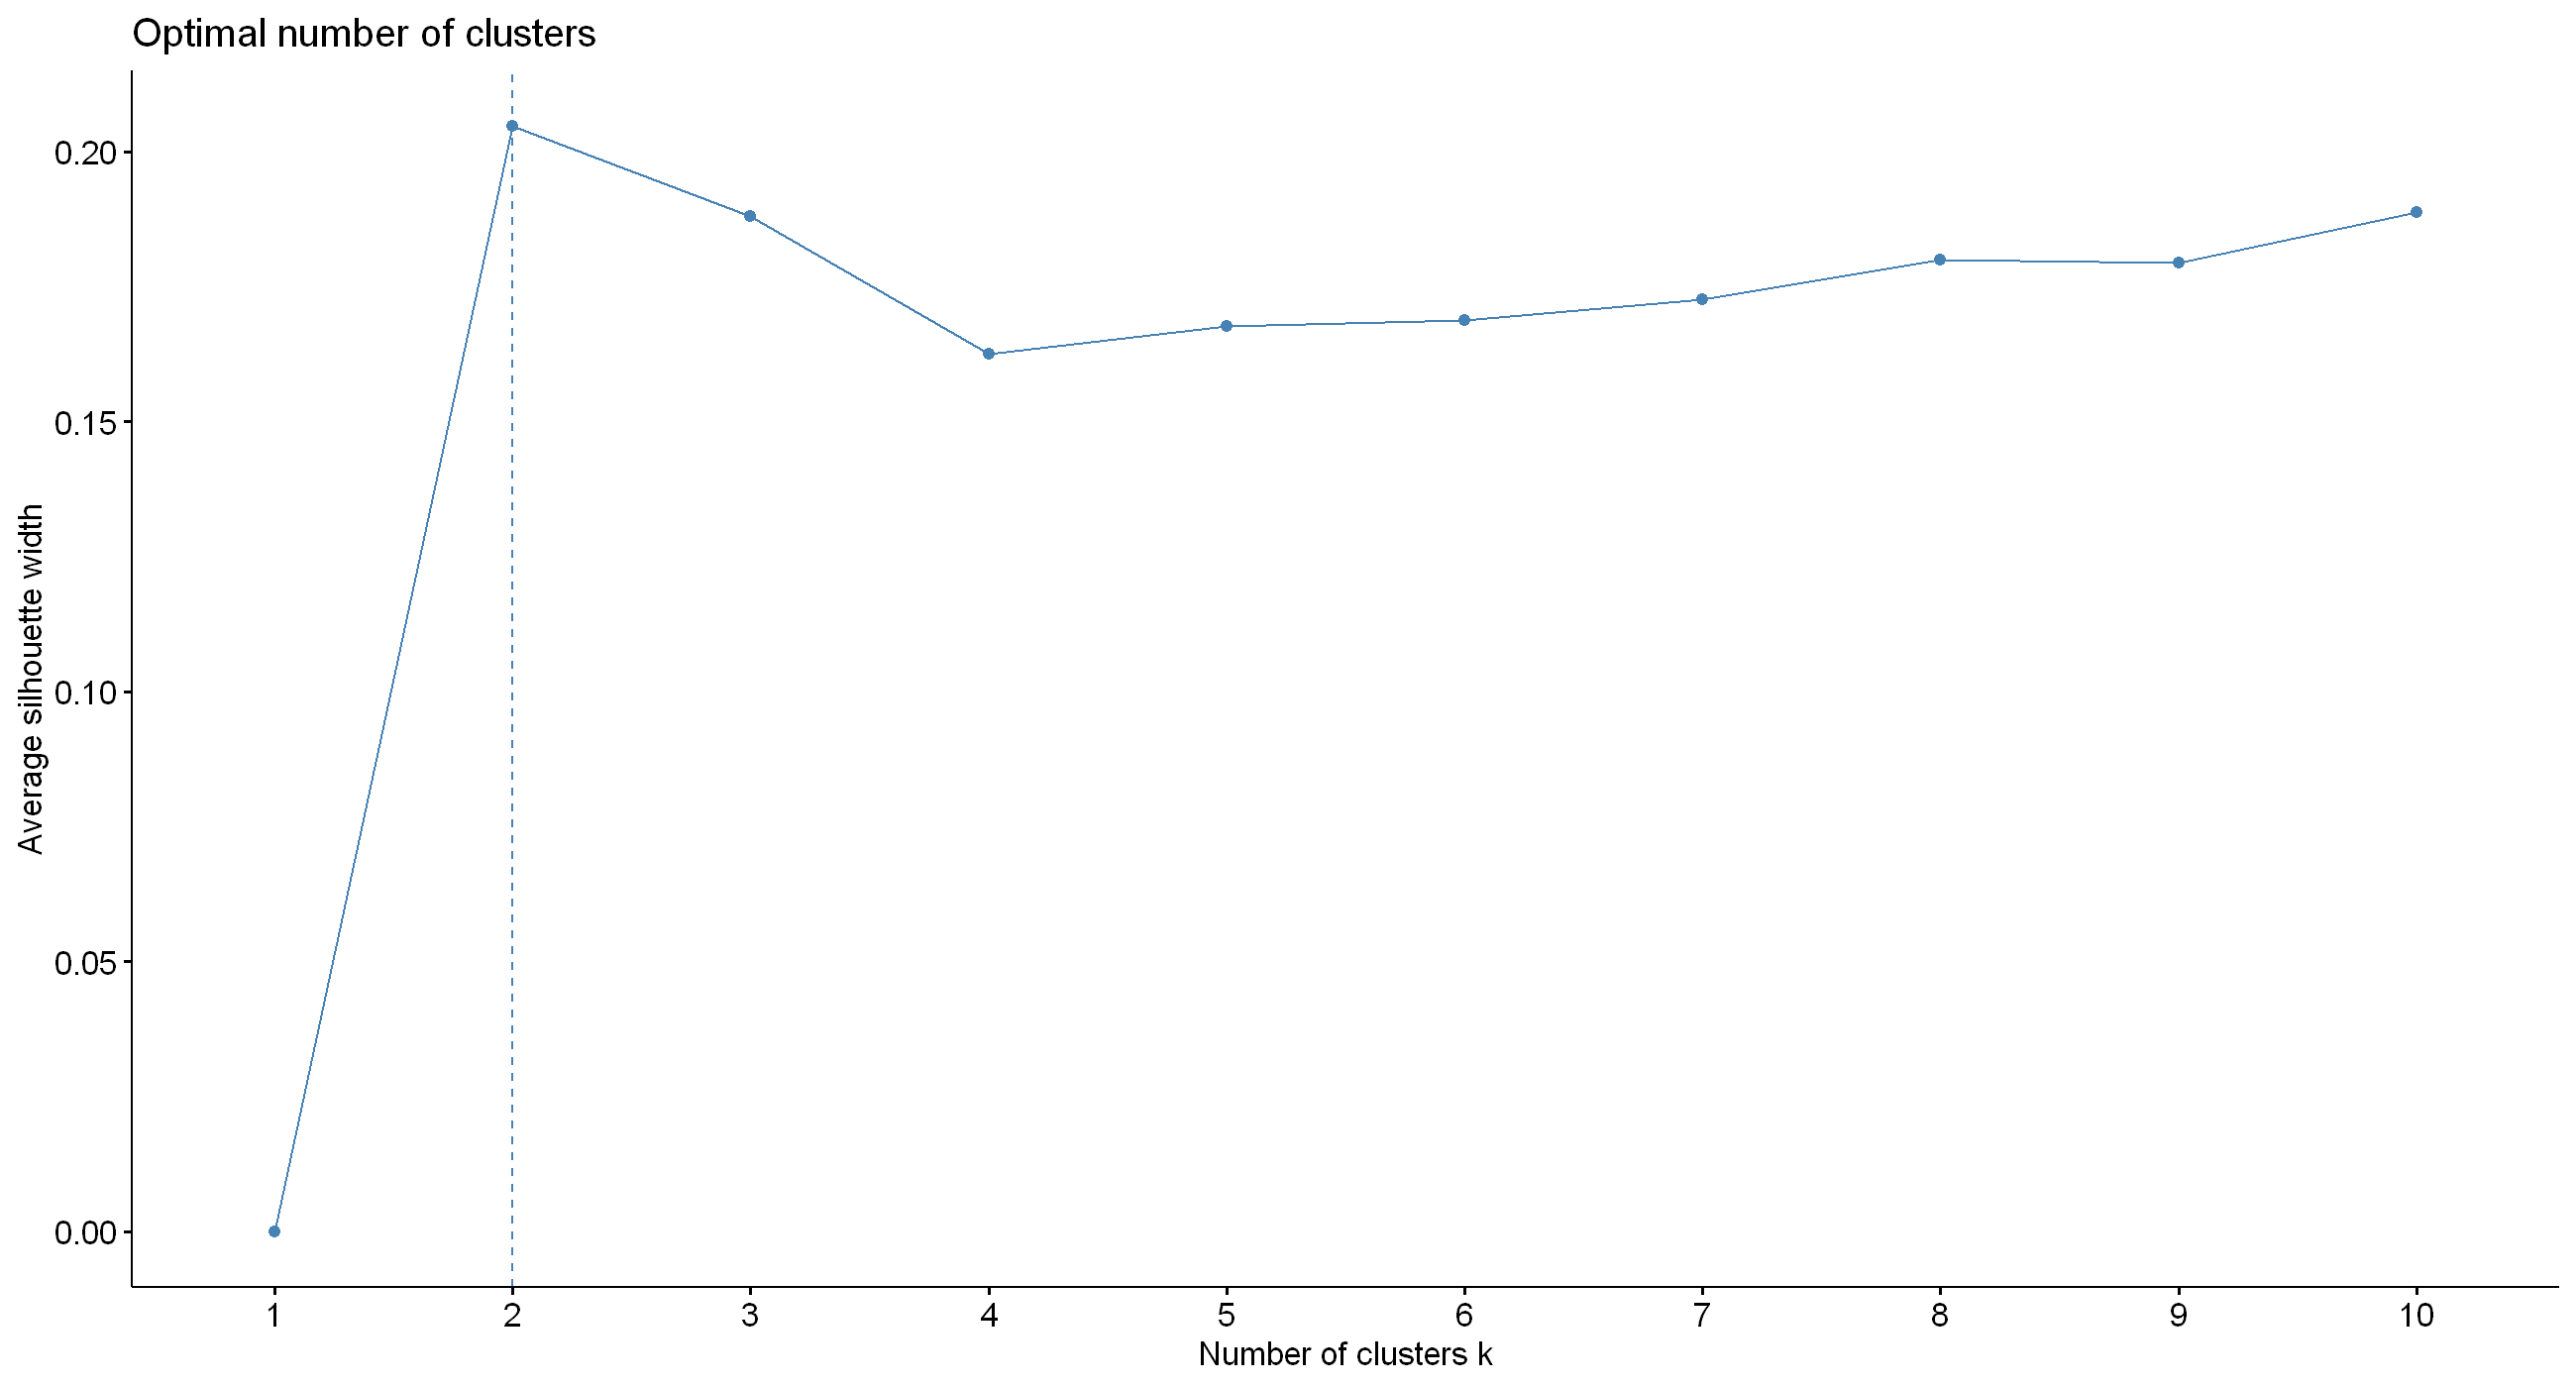

In [ ]:
fviz_nbclust(datanew, hcut, method = "silhouette")

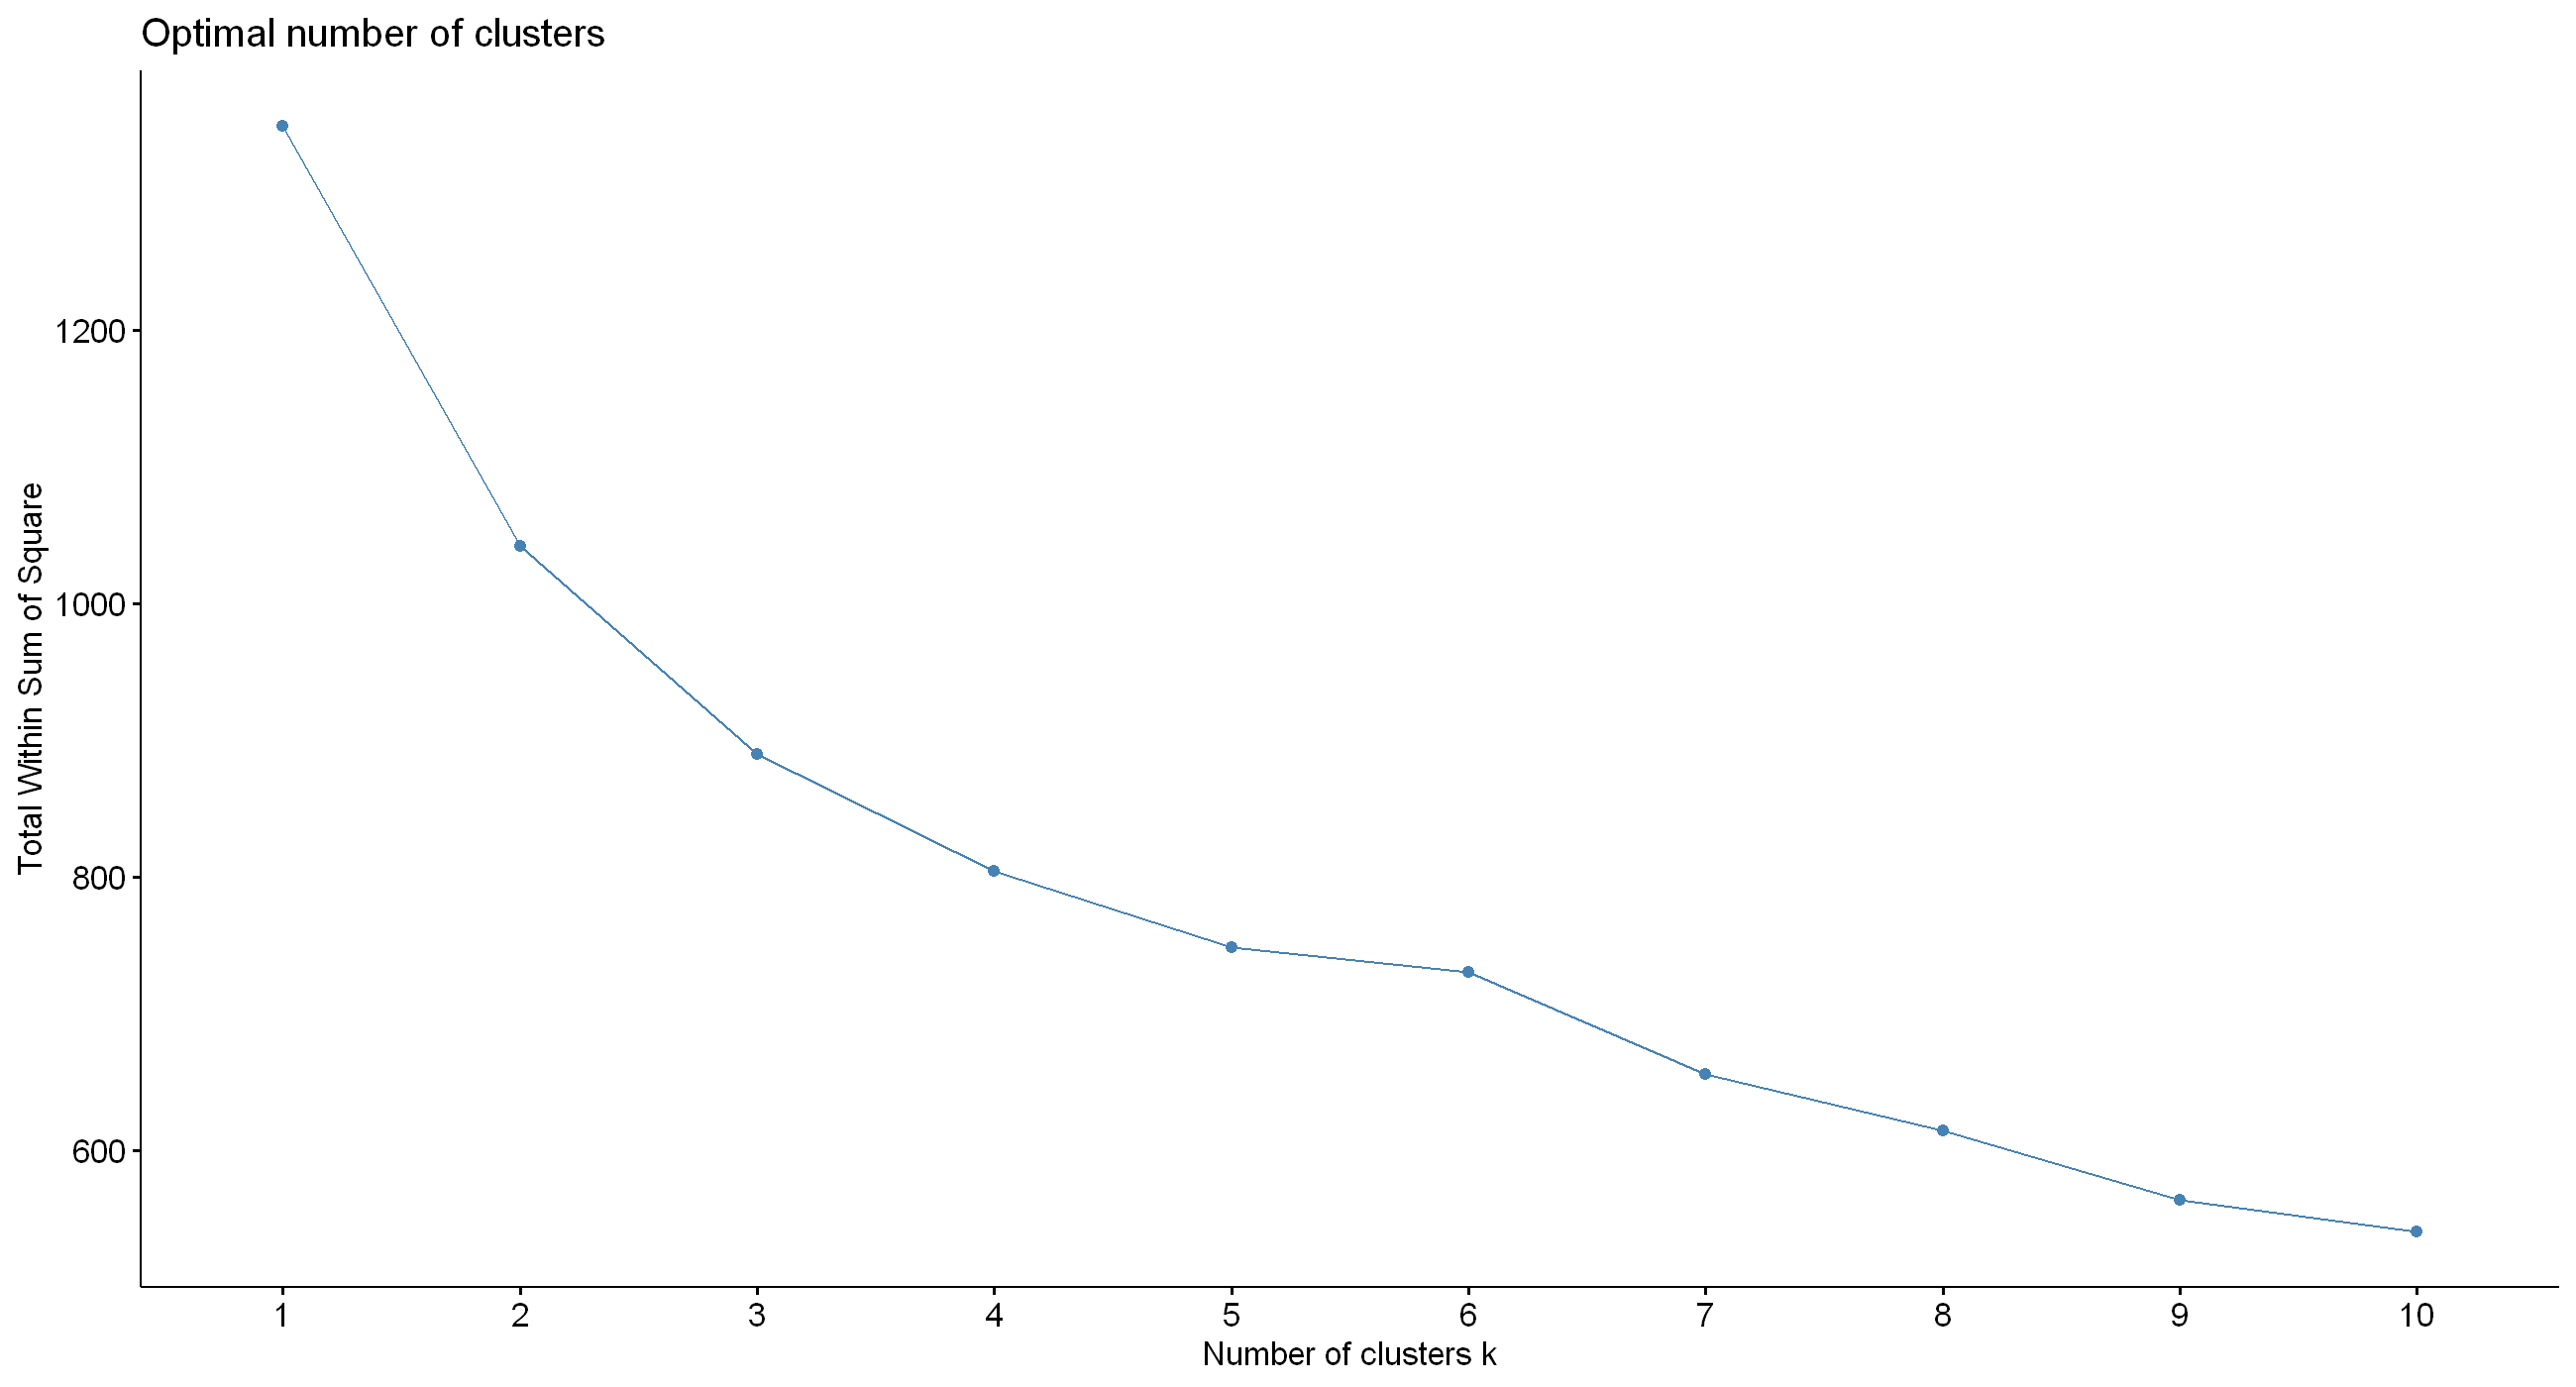

In [ ]:
fviz_nbclust(datanew, kmeans, method = "wss")

#### Average Silhouette Method

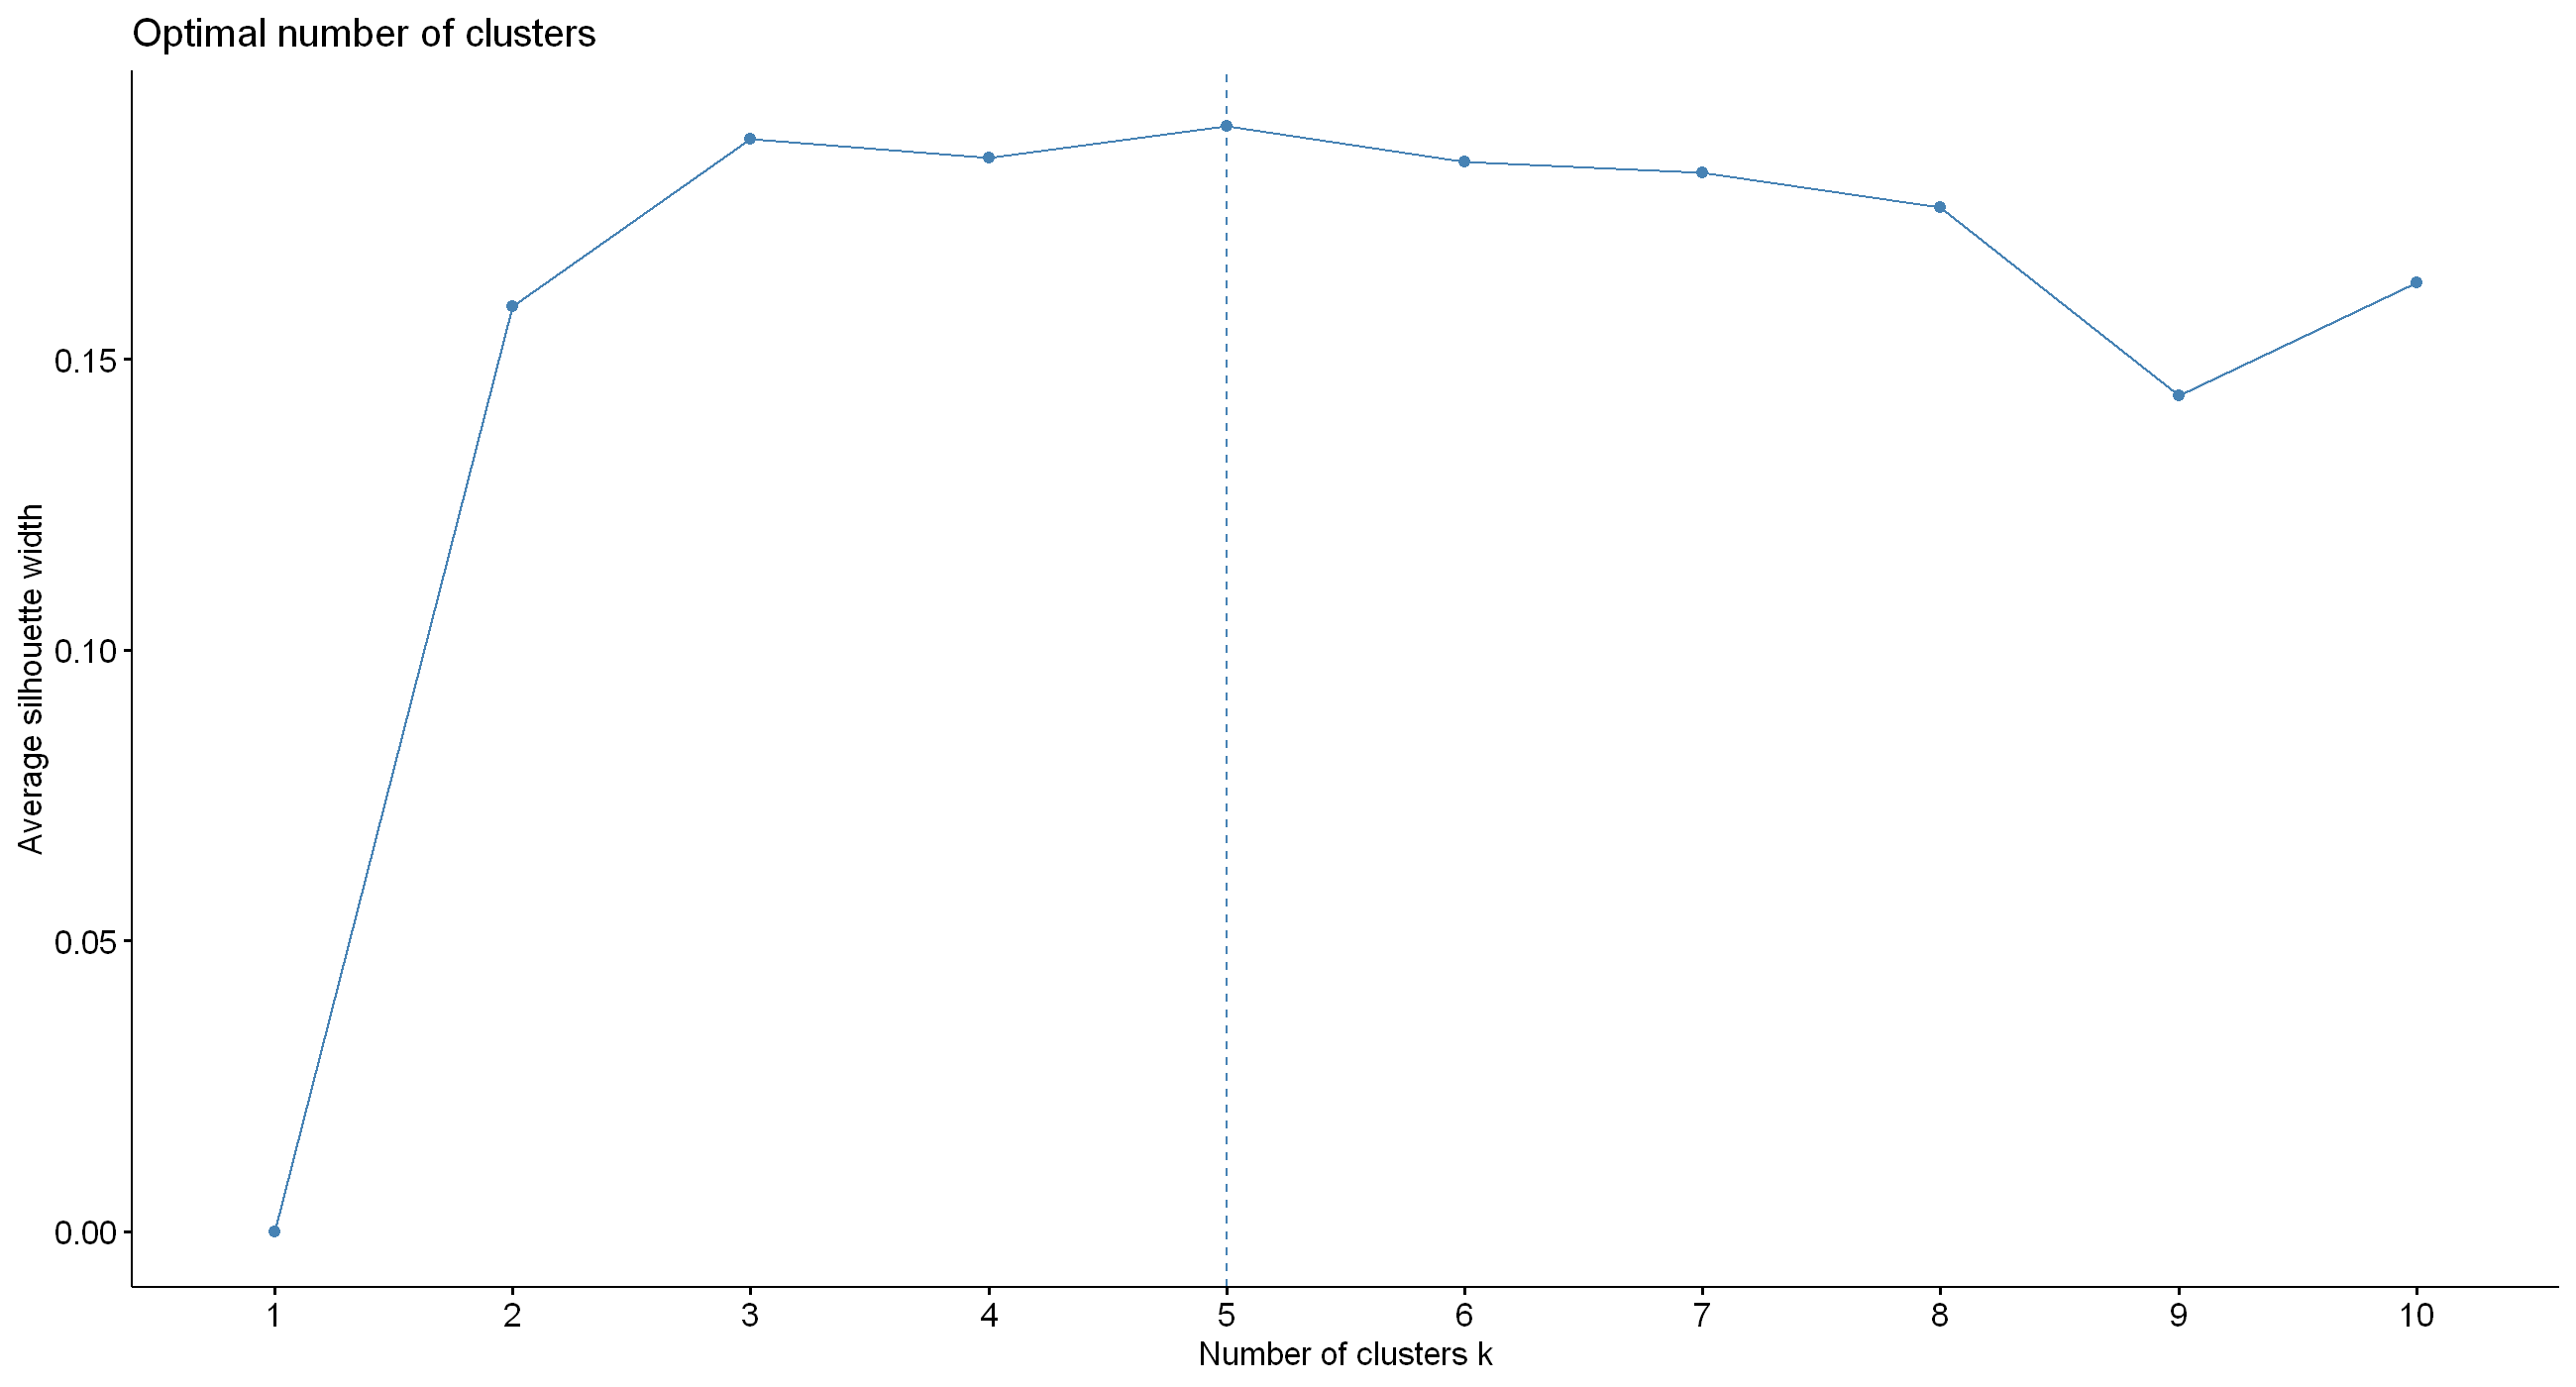

In [ ]:
fviz_nbclust(datanew, kmeans, method = "silhouette")

#### Gap Statistic Method

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = datanew, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 10
          logW   E.logW       gap     SE.sim
 [1,] 4.666409 4.932048 0.2656384 0.01630526
 [2,] 4.529270 4.844294 0.3150238 0.01513387
 [3,] 4.434380 4.783882 0.3495013 0.01445129
 [4,] 4.374180 4.734575 0.3603952 0.01560253
 [5,] 4.321300 4.692104 0.3708035 0.01618611
 [6,] 4.275354 4.654401 0.3790467 0.01645841
 [7,] 4.238298 4.618957 0.3806589 0.01687153
 [8,] 4.195681 4.586012 0.3903307 0.01715287
 [9,] 4.160263 4.554450 0.3941864 0.01766987
[10,] 4.125477 4.523941 0.3984645 0.01791199


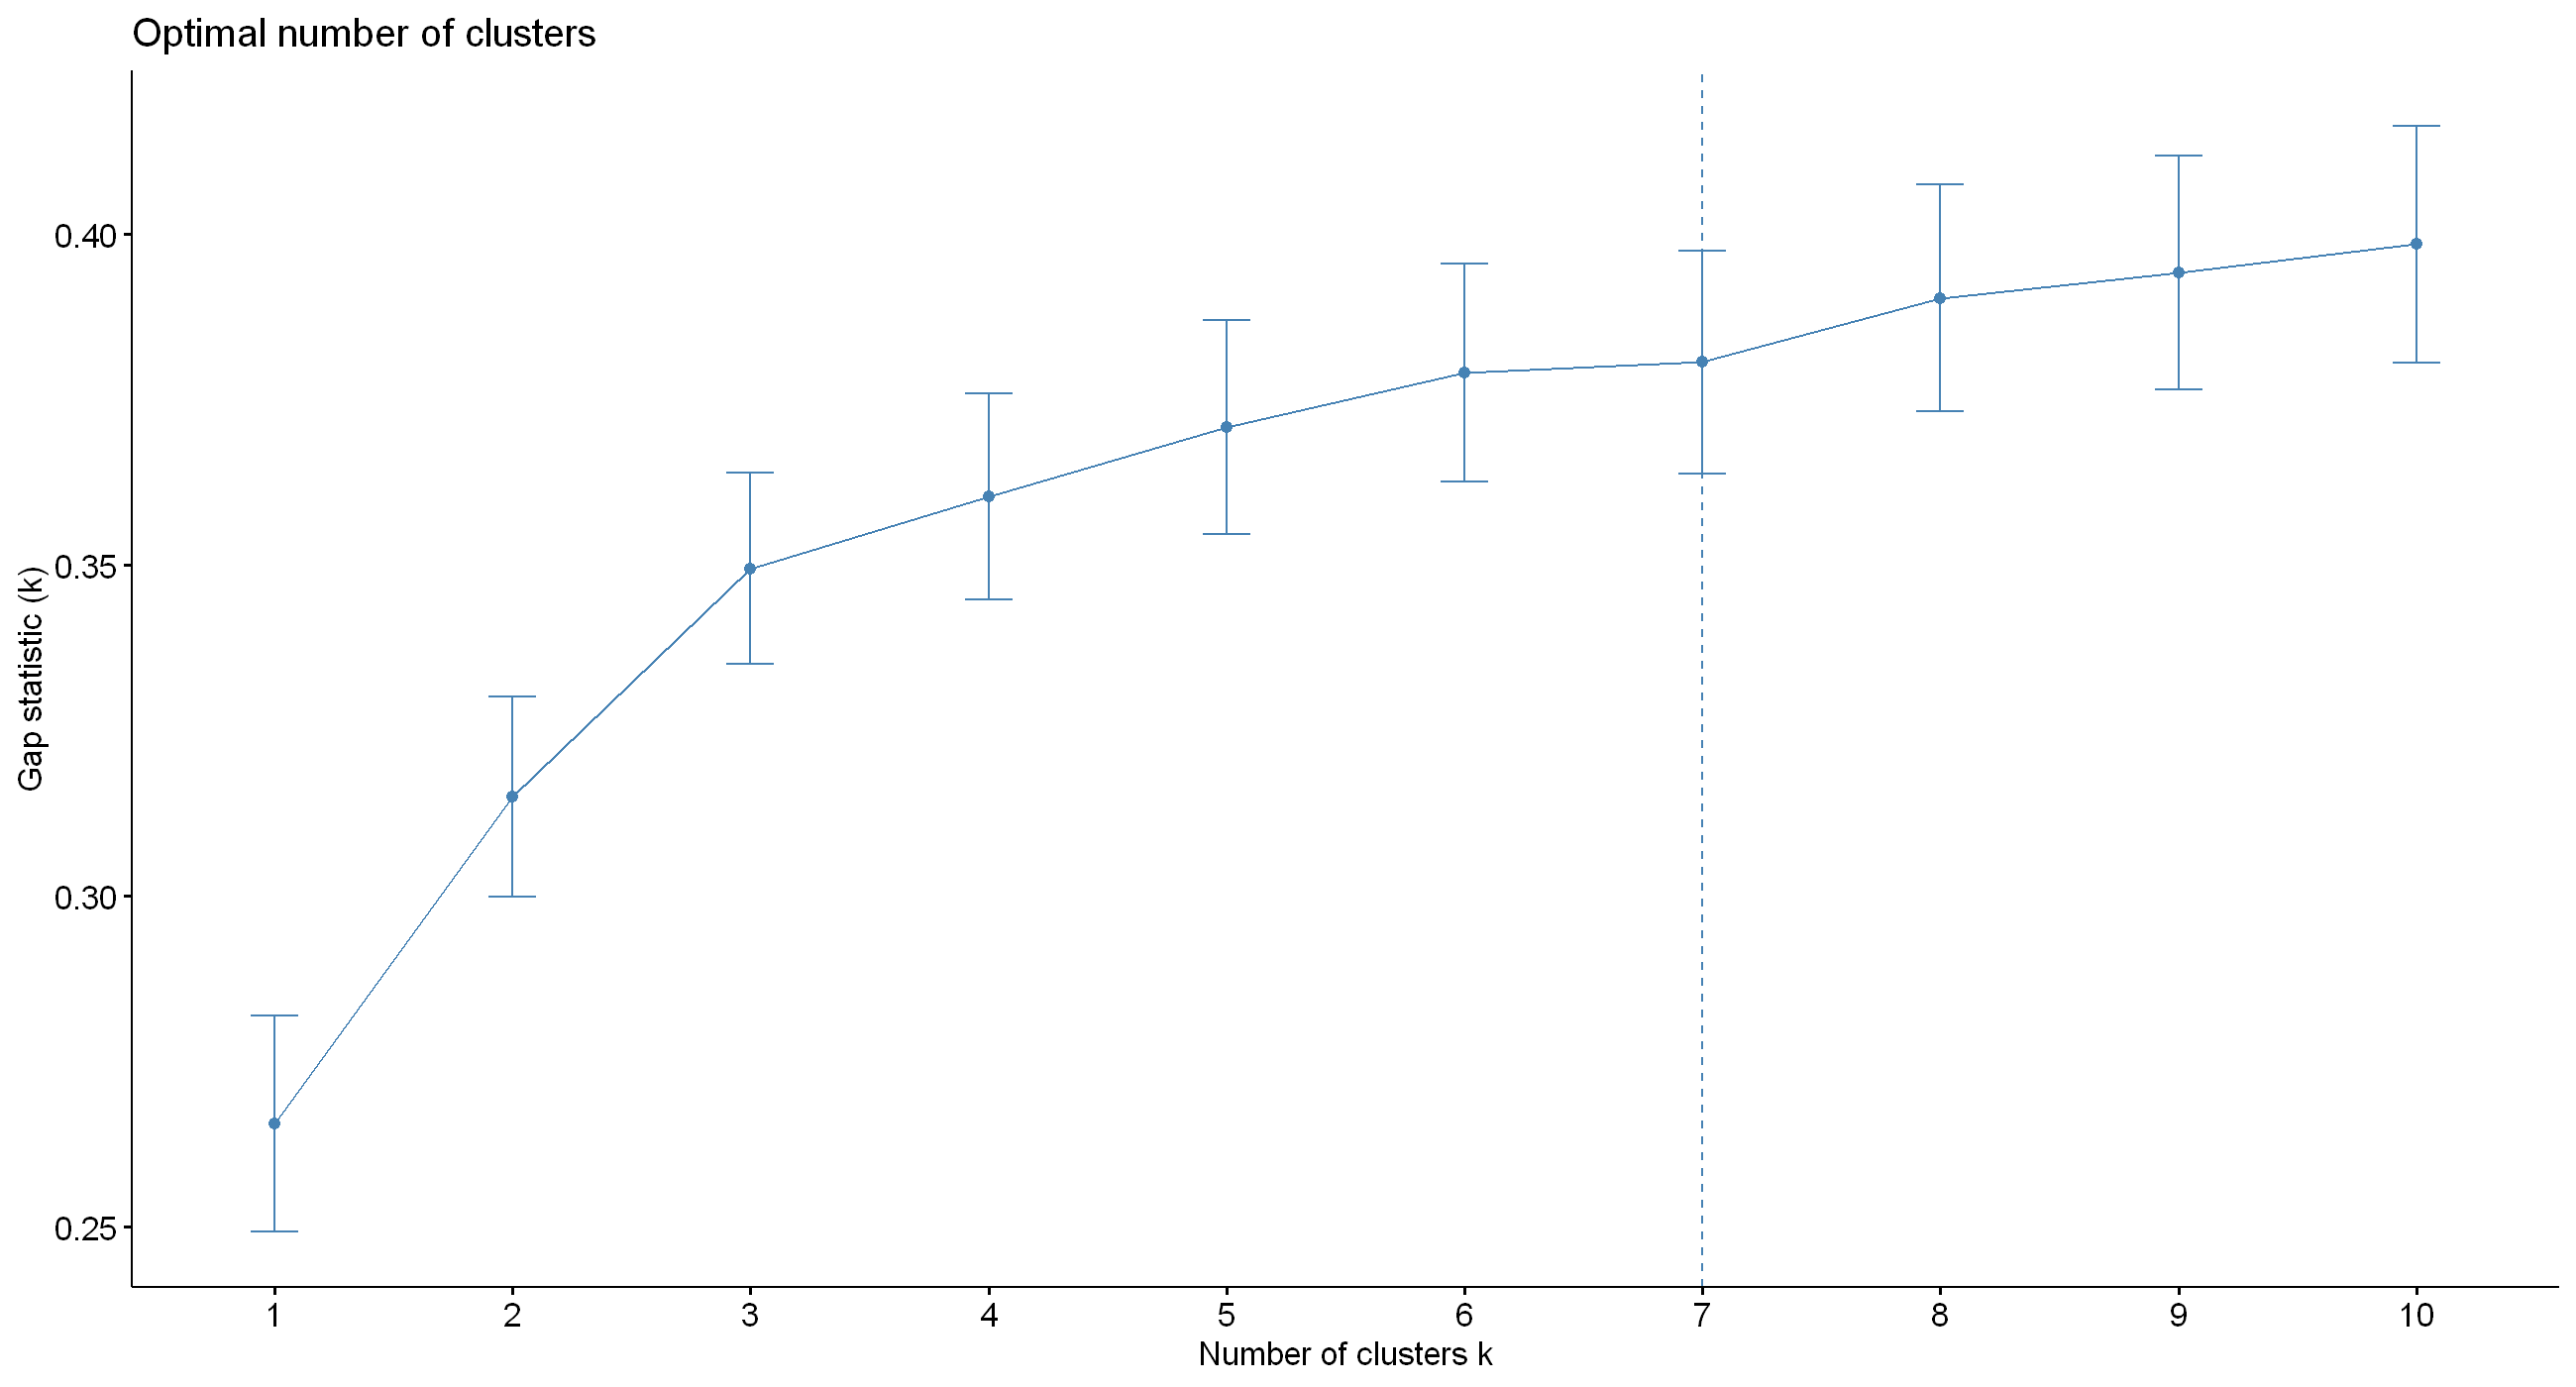

In [ ]:
# compute gap statistic
set.seed(123)
gap_stat <- clusGap(datanew, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

fviz_gap_stat(gap_stat)

#### Dengan library NbClust

Warning message in pf(beale, pp, df2):
"NaNs produced"


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


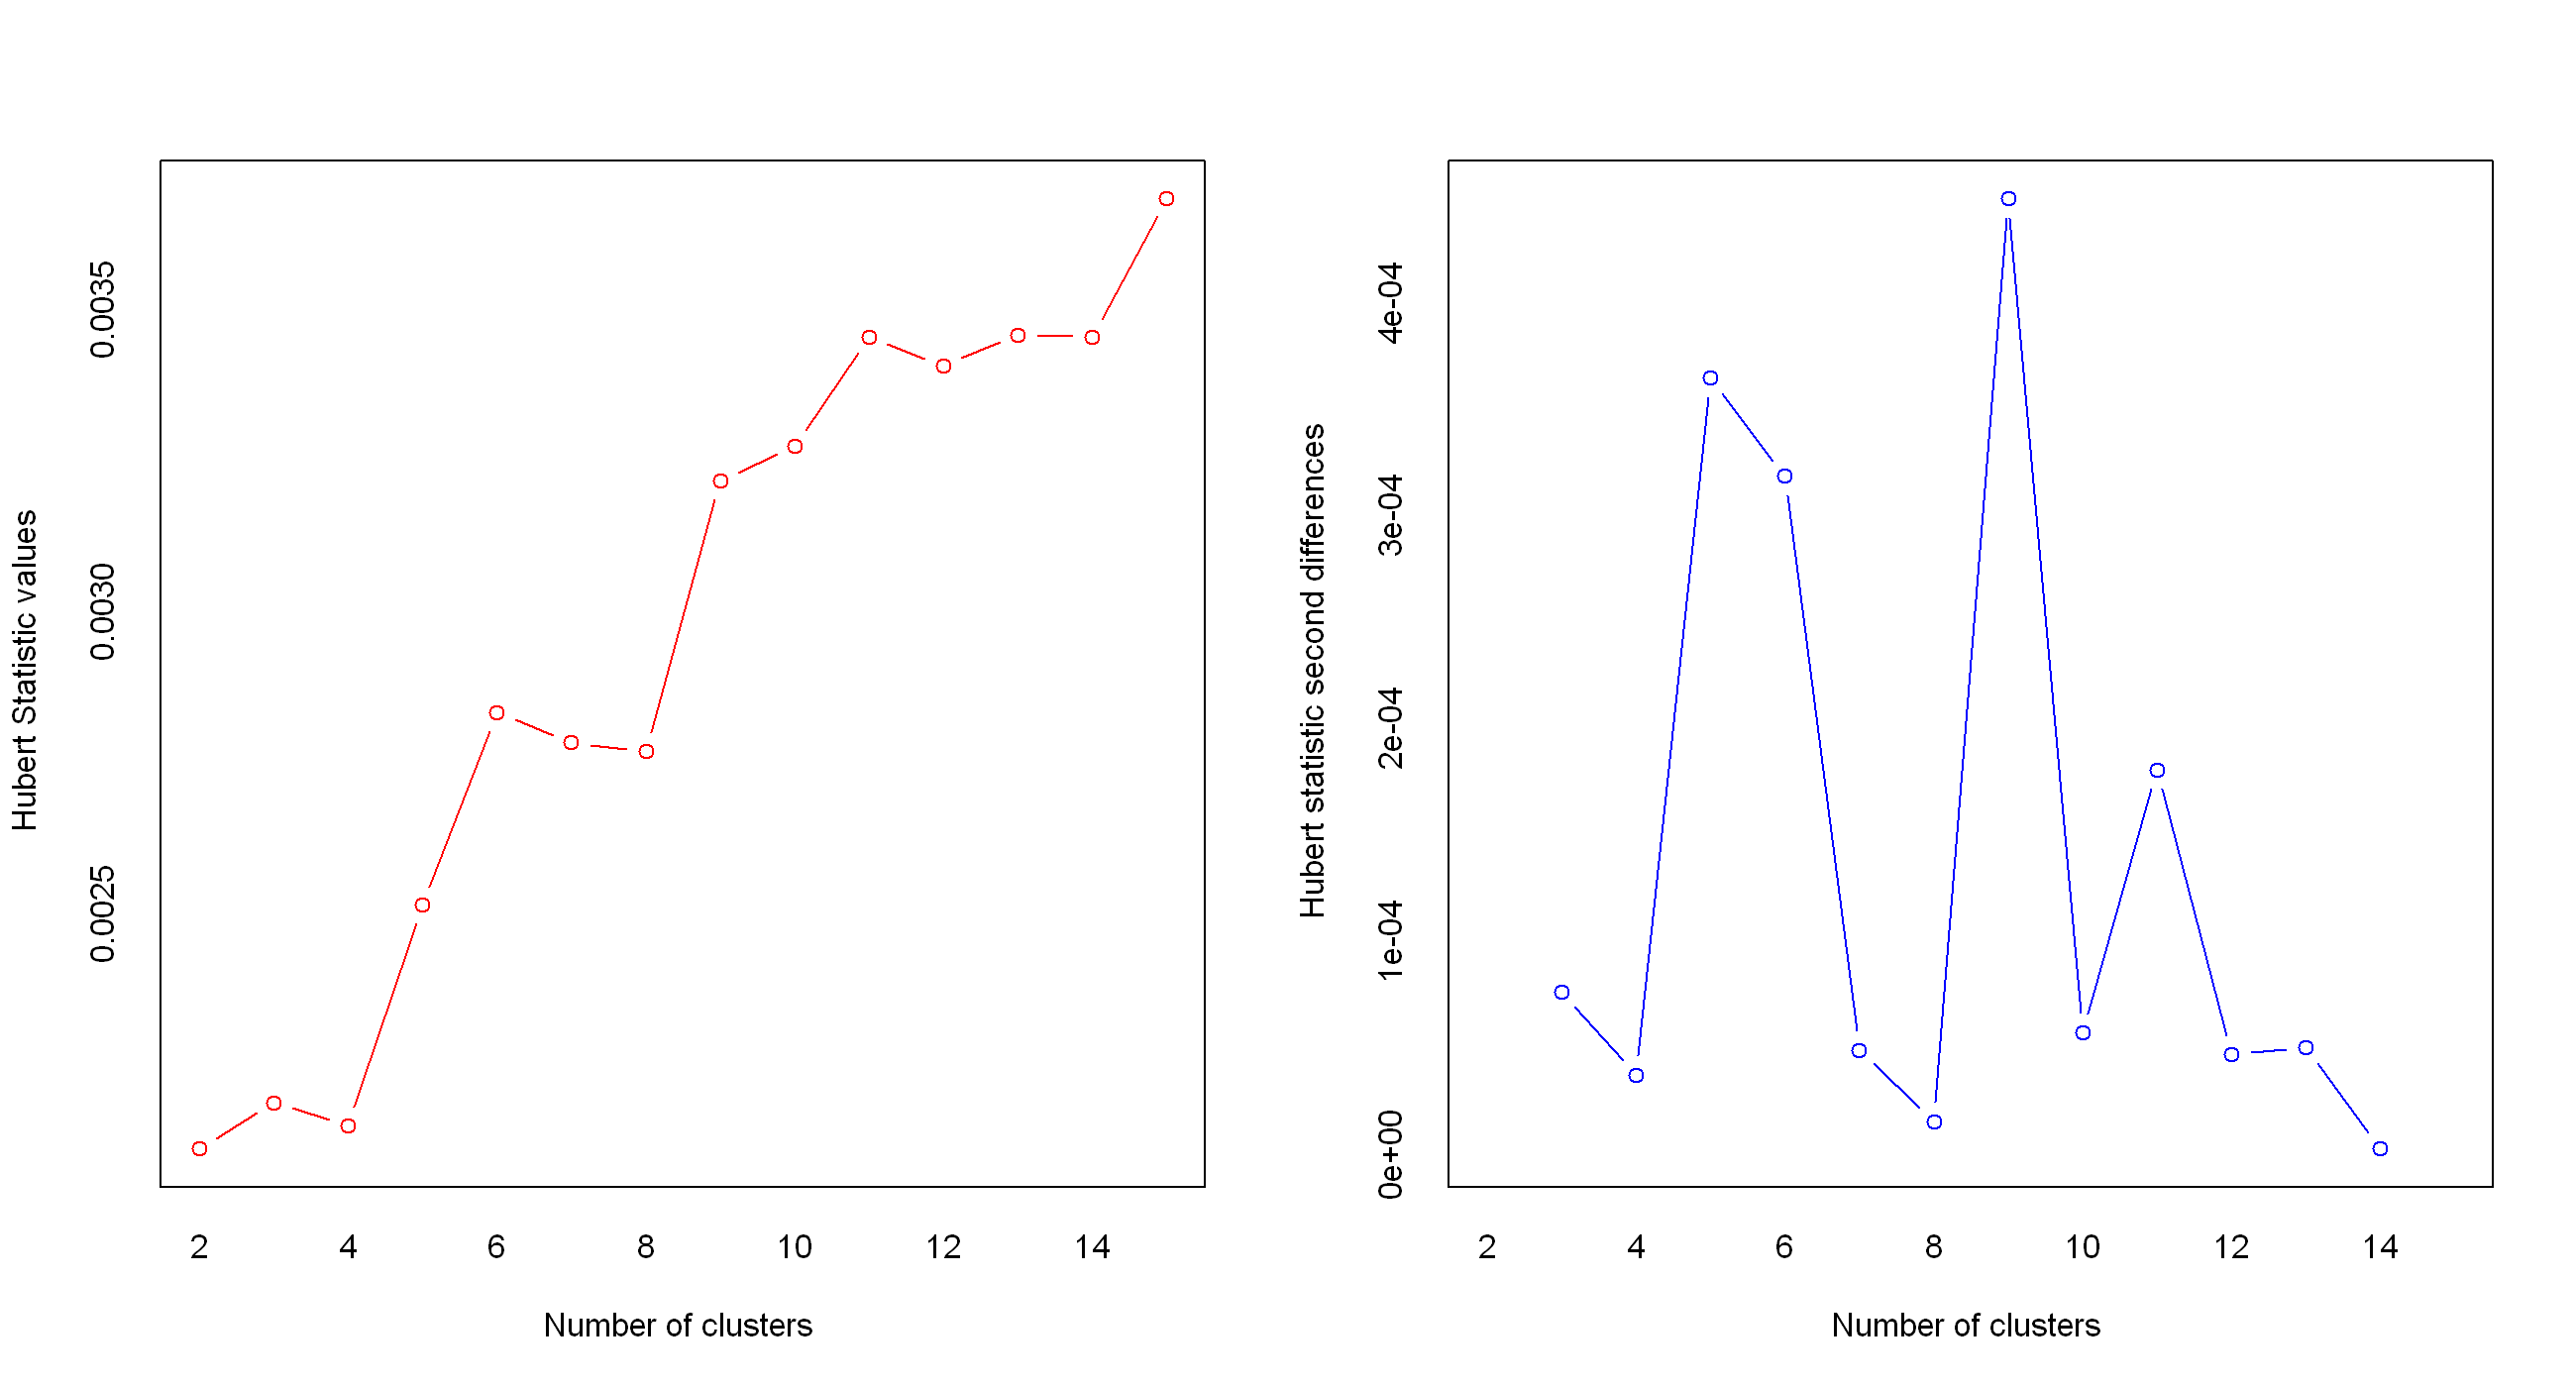

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 7 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 1 proposed 7 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 2 proposed 13 as the best number of clusters 
* 3 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
***************************

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,⋯,Ratkowsky,Ball,Ptbiserial,Frey,McClain,Dunn,Hubert,SDindex,Dindex,SDbw
2,1.8002,20.3970,12.2092,-0.1532,151.5459,1.675409e+29,5312.7370,1044.6138,22.6215,1.2914,⋯,0.2523,522.3069,0.4977,0.6702,0.7863,0.2985,0.0021,1.1723,3.7170,0.8828
3,2.6155,17.8236,5.7015,-0.3807,252.7172,9.248085e+28,3504.2605,889.4746,35.8719,1.5166,⋯,0.2963,296.4915,0.5014,0.4721,1.5512,0.3494,0.0022,1.0507,3.3800,0.7770
4,0.6094,14.5508,7.8838,-0.8524,328.4545,5.742379e+28,3065.1856,821.5862,39.6583,1.6419,⋯,0.2945,205.3966,0.4992,0.1731,1.9235,0.3168,0.0021,0.9998,3.2470,0.7410
5,1.7707,13.9412,4.9570,0.0634,445.6254,1.762595e+28,2384.5409,736.2292,49.3796,1.8323,⋯,0.2845,147.2458,0.5287,0.0754,2.6568,0.3168,0.0025,0.9992,3.0676,0.7040
6,3.0299,12.7759,2.2870,0.1737,533.7900,7.459640e+27,2053.6972,685.5120,53.9099,1.9679,⋯,0.2732,114.2520,0.5607,-0.8053,3.1372,0.3424,0.0028,1.1002,2.9700,0.7285
7,1.0993,11.2240,2.0173,-0.7163,579.7681,5.361393e+27,2015.0021,662.5532,56.3670,2.0361,⋯,0.2614,94.6505,0.4639,-5.0873,4.1507,0.2420,0.0028,1.2378,2.9139,0.6652
8,0.2660,10.0503,5.1241,-1.6241,592.6851,5.852586e+27,1757.3508,642.6095,56.2044,2.0993,⋯,0.2499,80.3262,0.4384,-0.0119,4.6432,0.2339,0.0028,1.1807,2.8624,0.6319
9,2.2194,9.9802,2.6781,-1.0047,754.4391,7.833830e+26,1639.3403,594.9733,67.8063,2.2673,⋯,0.2432,66.1081,0.4621,-2.1059,4.8776,0.3106,0.0032,1.2046,2.7475,0.5482
10,0.4776,9.3945,4.9736,-1.5191,743.4243,1.127013e+27,1362.0135,570.7123,64.2423,2.3637,⋯,0.2375,57.0712,0.4289,0.0117,5.6159,0.3218,0.0033,1.1408,2.6981,0.4983
11,1.9151,9.4753,2.8772,-0.8929,823.0830,4.510487e+26,1186.4935,528.3302,68.4337,2.5533,⋯,0.2337,48.0300,0.4536,0.1735,6.0799,0.3329,0.0035,1.1107,2.5874,0.4862


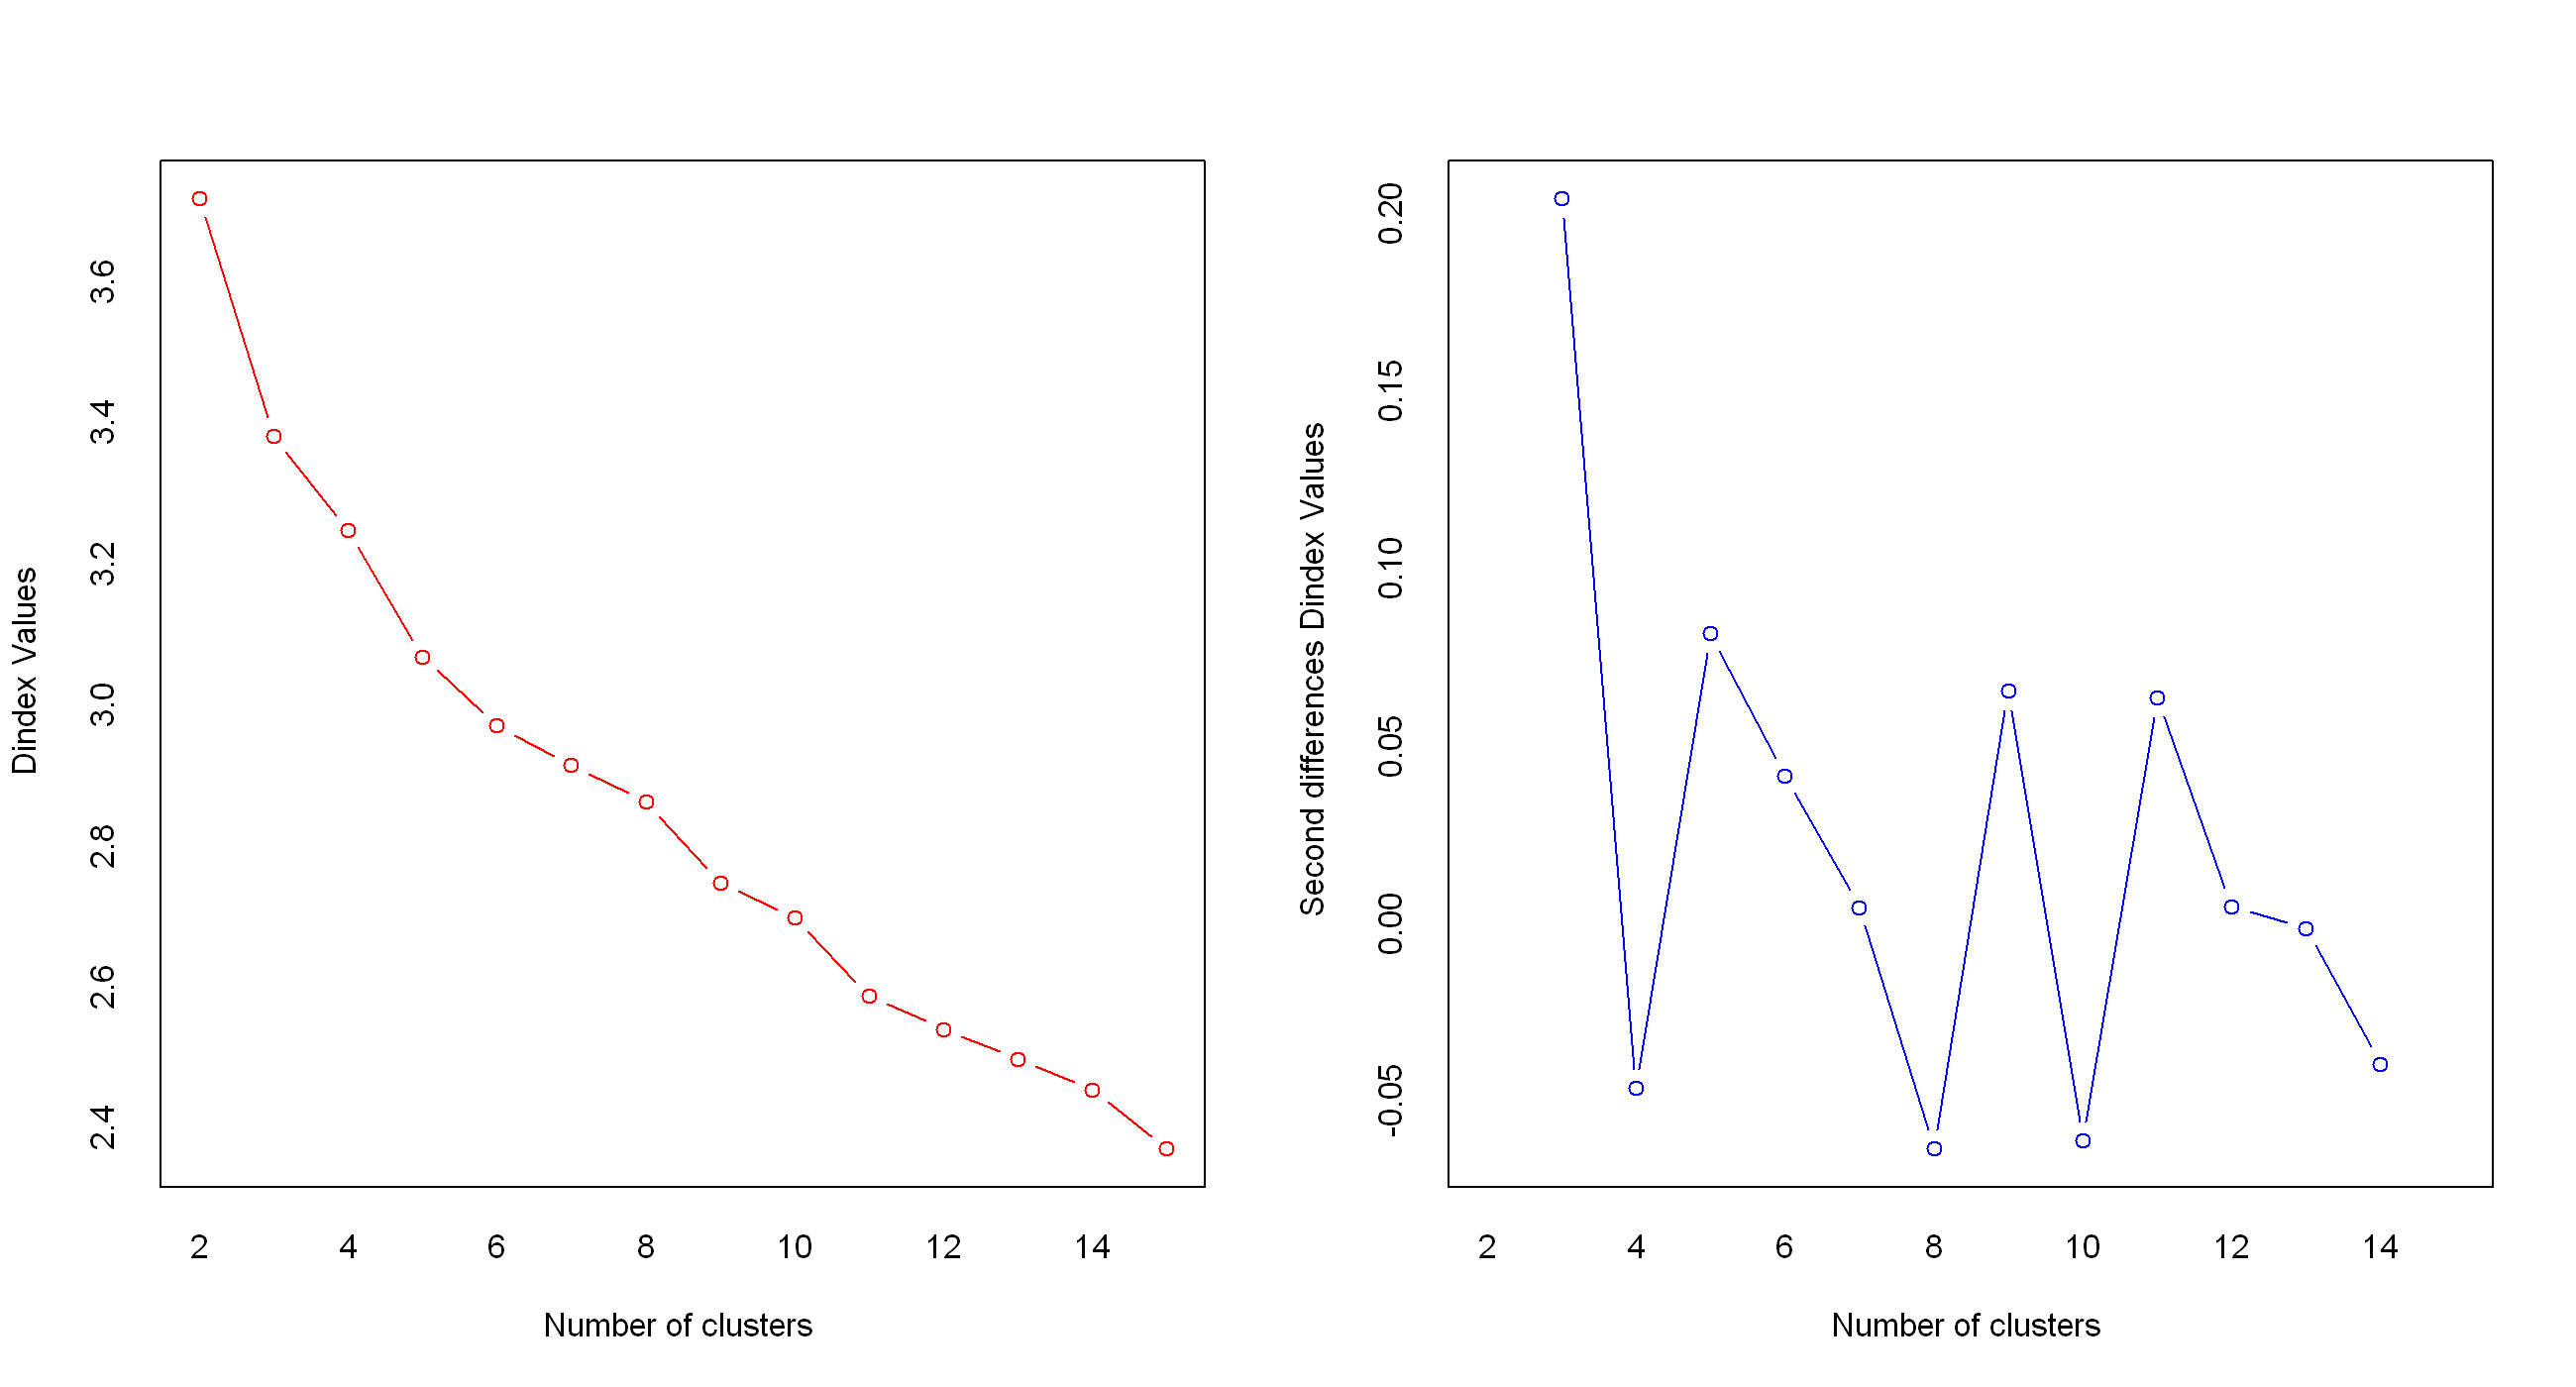

In [ ]:
NbClust(data = datanew, diss = NULL, distance = "euclidean", min.nc = 2, max.nc = 15, method = "kmeans")

### 2. Melakukan Non Hierarchical Clustering

In [ ]:
km <- kmeans(datanew, centers = 3)
str(km)

List of 9
 $ cluster     : int [1:72] 1 3 3 3 3 3 3 3 1 3 ...
 $ centers     : num [1:3, 1:19] 0.2442 0.2407 -0.3812 -0.2616 0.0277 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:19] "behavior_sexualRisk" "behavior_eating" "behavior_personalHygine" "intention_aggregation" ...
 $ totss       : num 1349
 $ withinss    : num [1:3] 233 223 434
 $ tot.withinss: num 889
 $ betweenss   : num 460
 $ size        : int [1:3] 23 21 28
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [ ]:
km

K-means clustering with 3 clusters of sizes 23, 21, 28

Cluster means:
  behavior_sexualRisk behavior_eating behavior_personalHygine
1           0.2442362     -0.26161668               0.1445049
2           0.2407471      0.02772896               0.4748019
3          -0.3811830      0.19410270              -0.4748019
  intention_aggregation intention_commitment attitude_consistency
1            0.05138526          -0.03636650          -0.23276754
2            0.07028849           0.01420510           0.19413345
3           -0.09492569           0.01921866           0.04560182
  attitude_spontaneity norm_significantPerson norm_fulfillment
1           0.08446231            -0.72729870      -0.85210346
2          -0.15185002             0.75786572       1.06532708
3           0.04450776             0.02902464      -0.09905318
  perception_vulnerability perception_severity motivation_strength
1               -0.7709867          -0.7536041           0.2302708
2                1.1828603     

In [ ]:
km$centers

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
1,0.2442362,-0.26161668,0.1445049,0.05138526,-0.03636650,-0.23276754,0.08446231,-0.72729870,-0.85210346,-0.7709867,-0.7536041,0.2302708,0.5371383,0.6328726,0.7528240,0.6786420,0.6027905,0.6202002,0.6267309
2,0.2407471,0.02772896,0.4748019,0.07028849,0.01420510,0.19413345,-0.15185002,0.75786572,1.06532708,1.1828603,1.0898696,0.4052131,0.5812489,0.4708780,0.3533664,0.3543999,0.6502030,0.6751549,0.6073308
3,-0.3811830,0.19410270,-0.4748019,-0.09492569,0.01921866,0.04560182,0.04450776,0.02902464,-0.09905318,-0.2538347,-0.1983703,-0.4930609,-0.8771574,-0.8730181,-0.8834159,-0.8232558,-0.9828016,-1.0158164,-0.9703128


In [ ]:
km$size

[1] 23 21 28

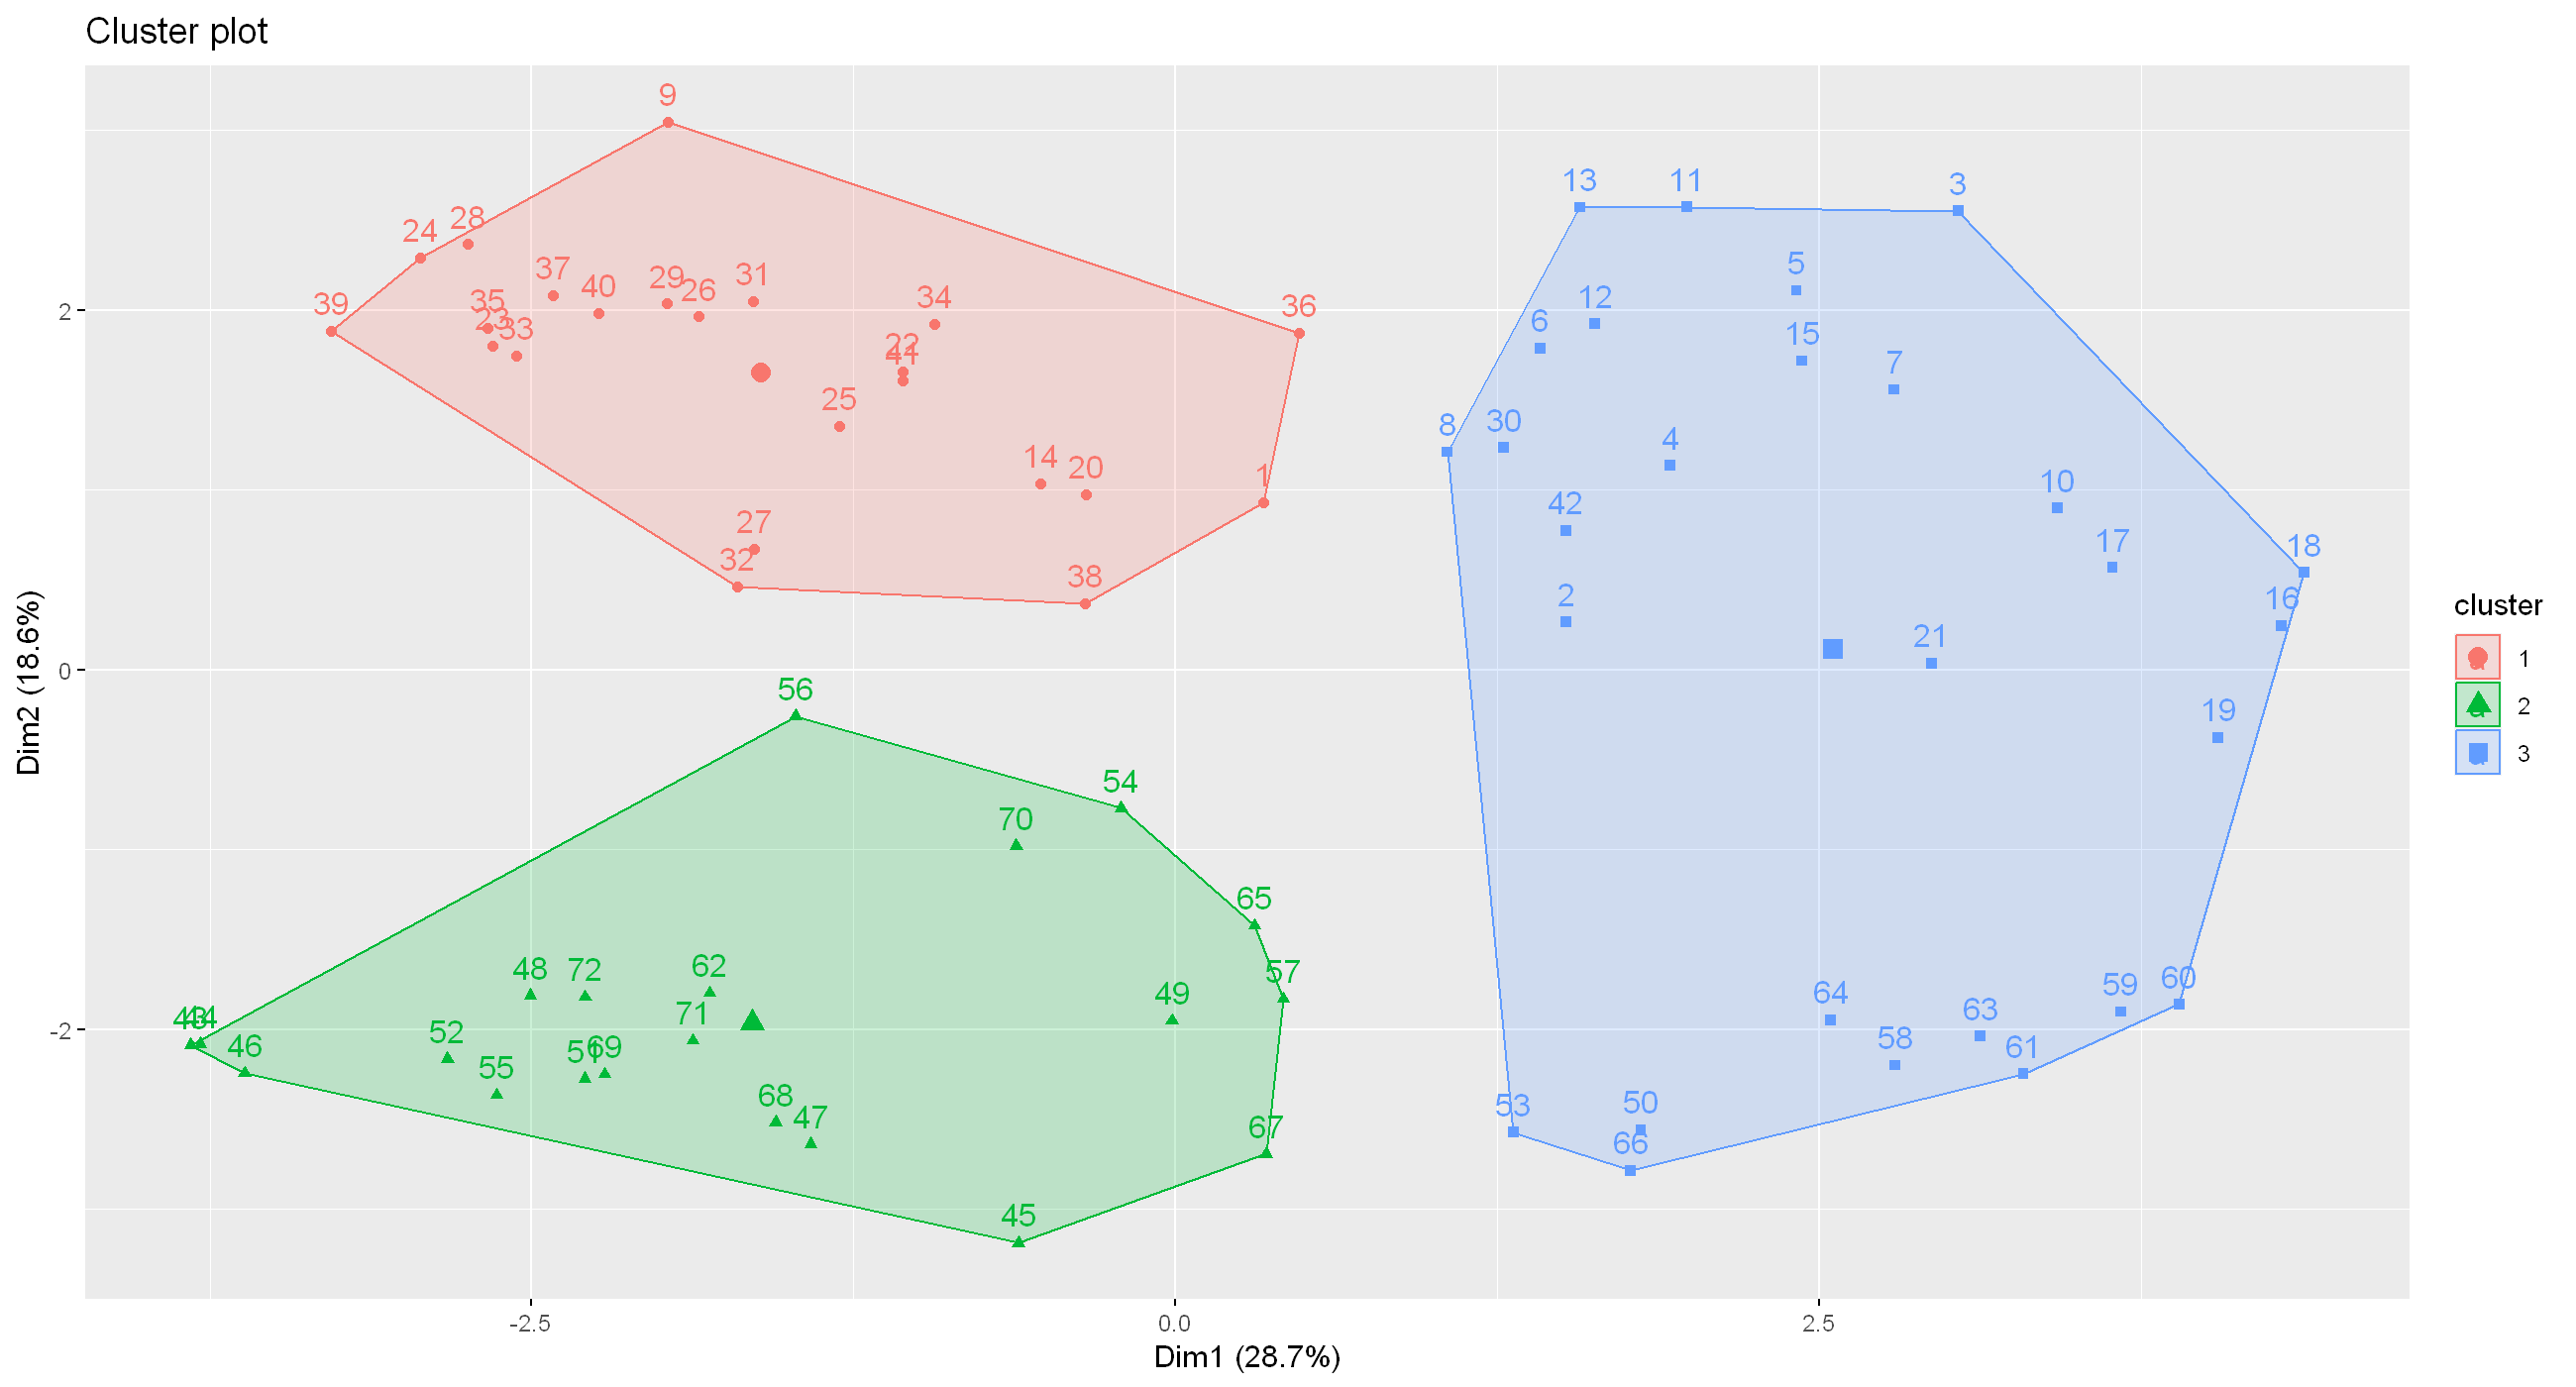

In [ ]:
#Scatter plot dari 2 dimensi dengan PCA
fviz_cluster(km, data = datanew)

## E. Clustering Variables

### 1. Melakukan Clustering Variables

In [ ]:
xquant <- datanew[,c(1:19)] # Numeric variables
#xqual <- datanew[,c(1,2,3)] # Categorical variables

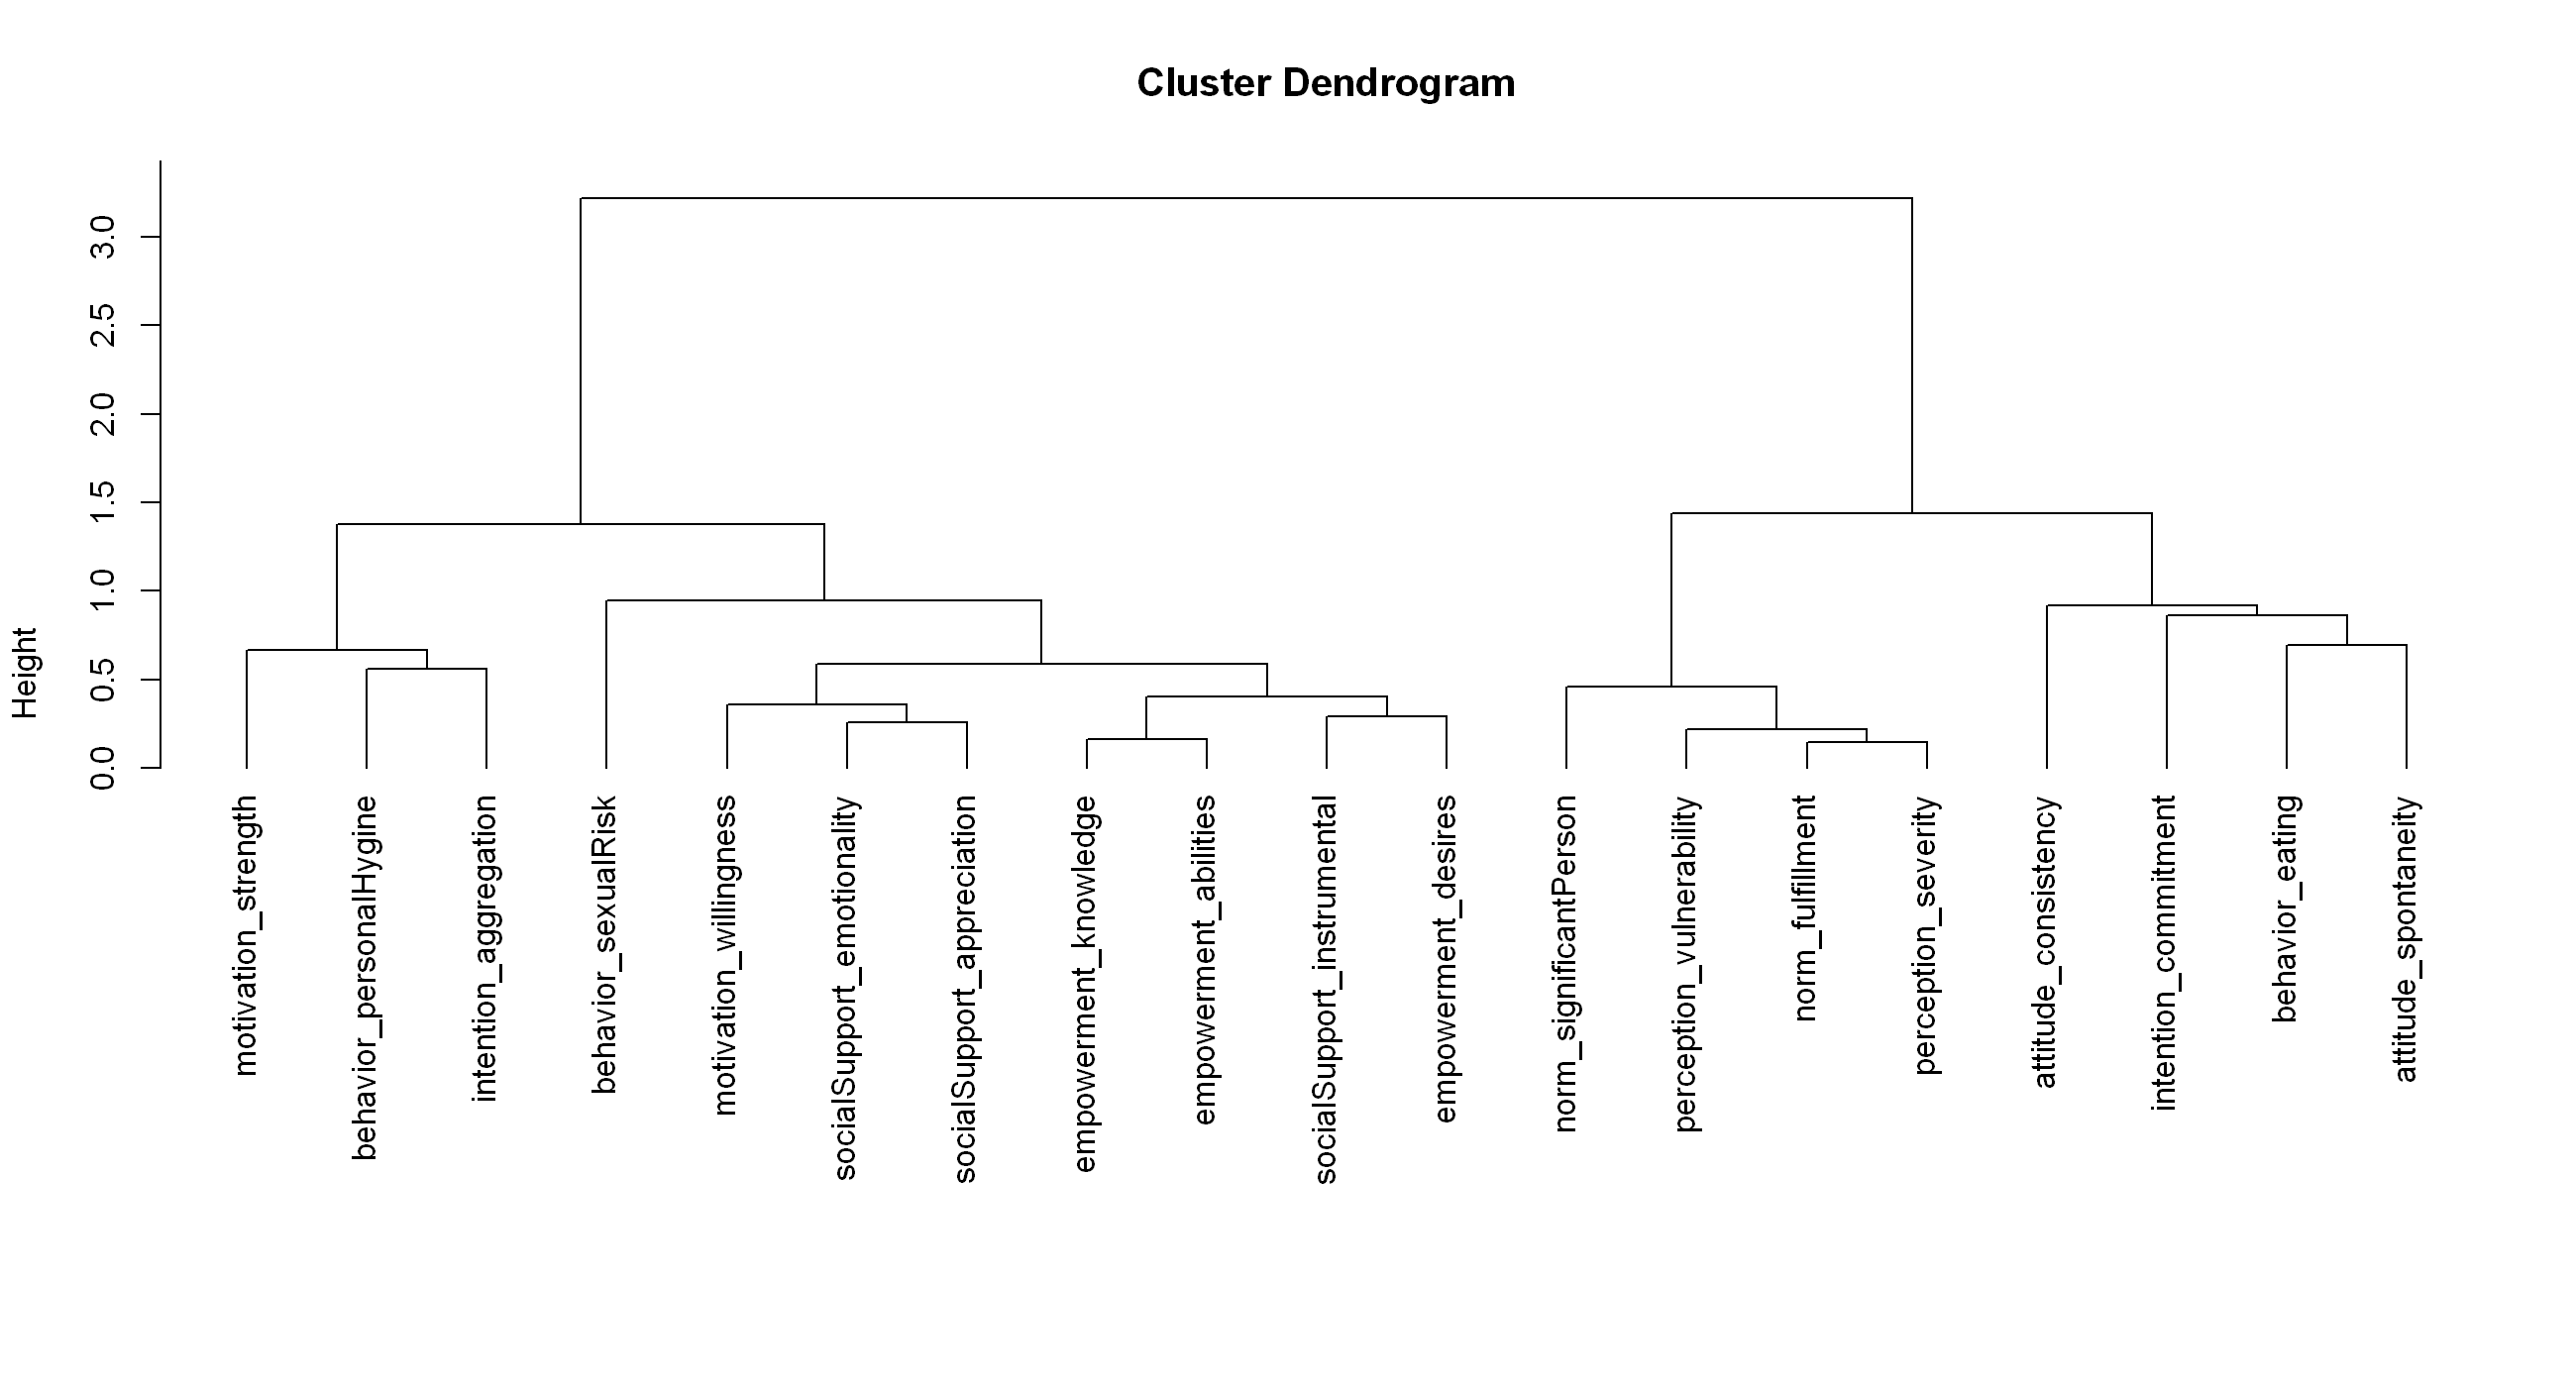

In [ ]:
var_hc <- hclustvar(X.quanti = xquant, X.quali = NULL)
plot(var_hc)

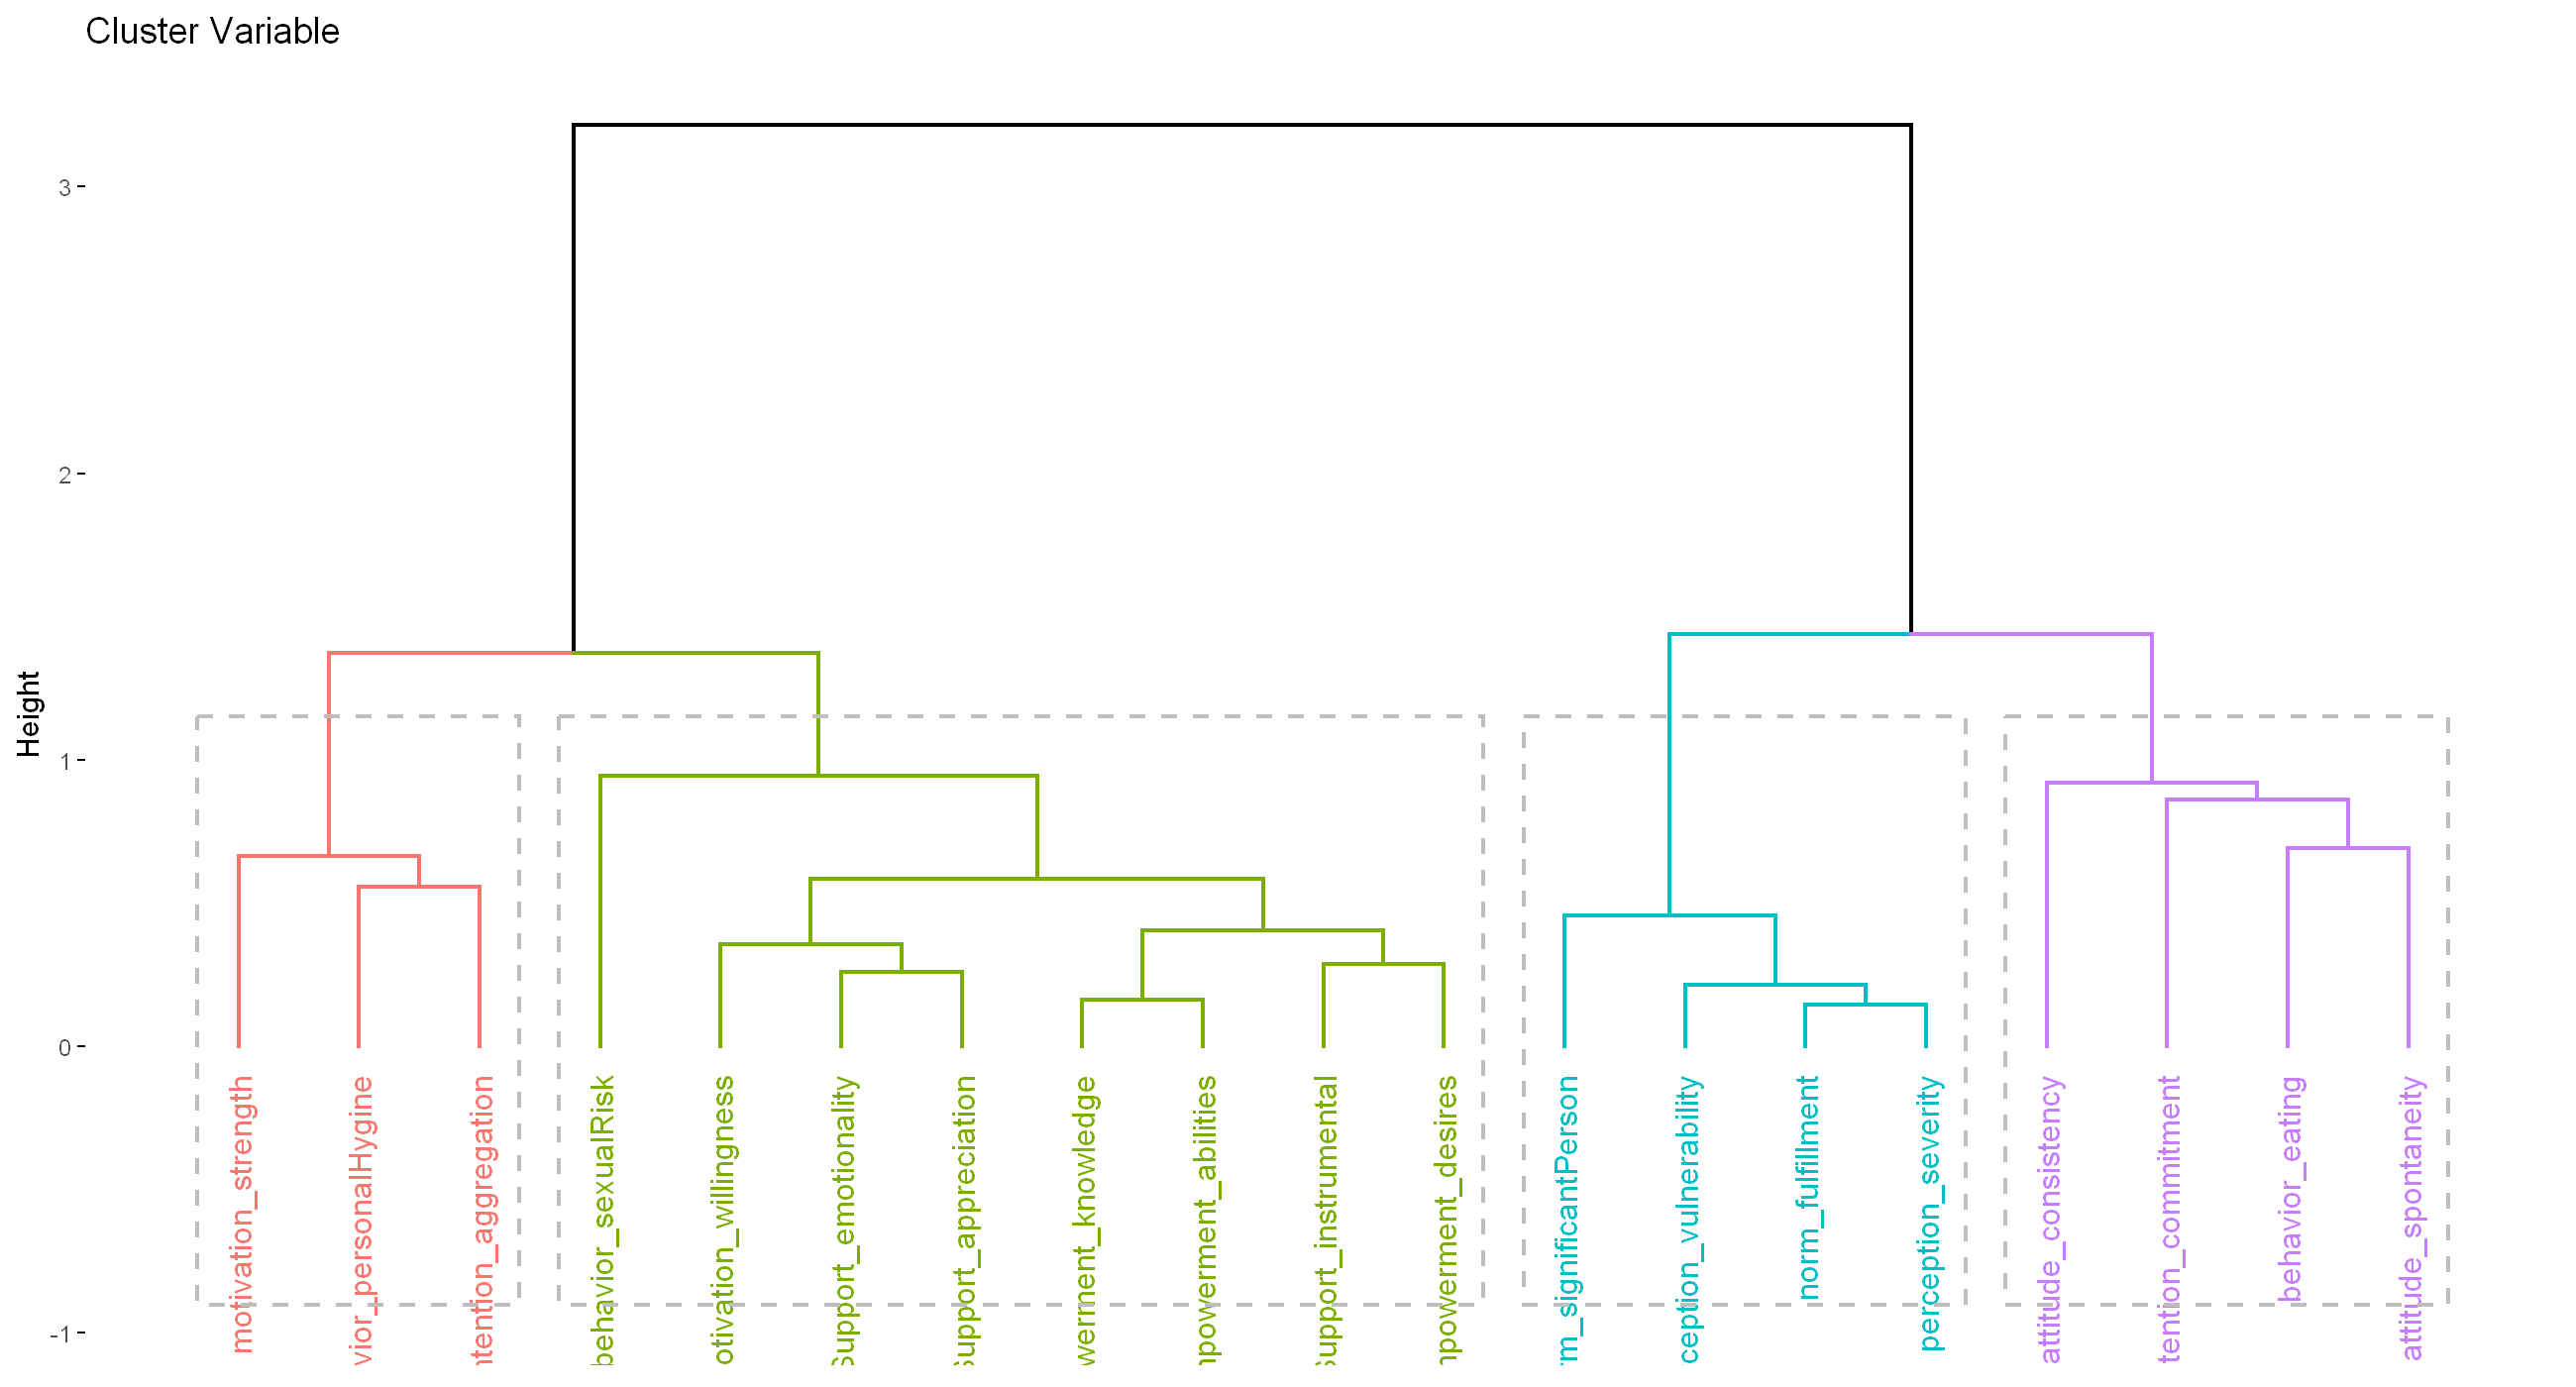

In [ ]:
fviz_dend(var_hc, k = 4, rect = T, main = "Cluster Variable")

In [ ]:
dis_var_clus <- as.dist(matrix(1,dim(cor(datanew))[1],dim(cor(datanew))[1])-((cor(datanew))**2))

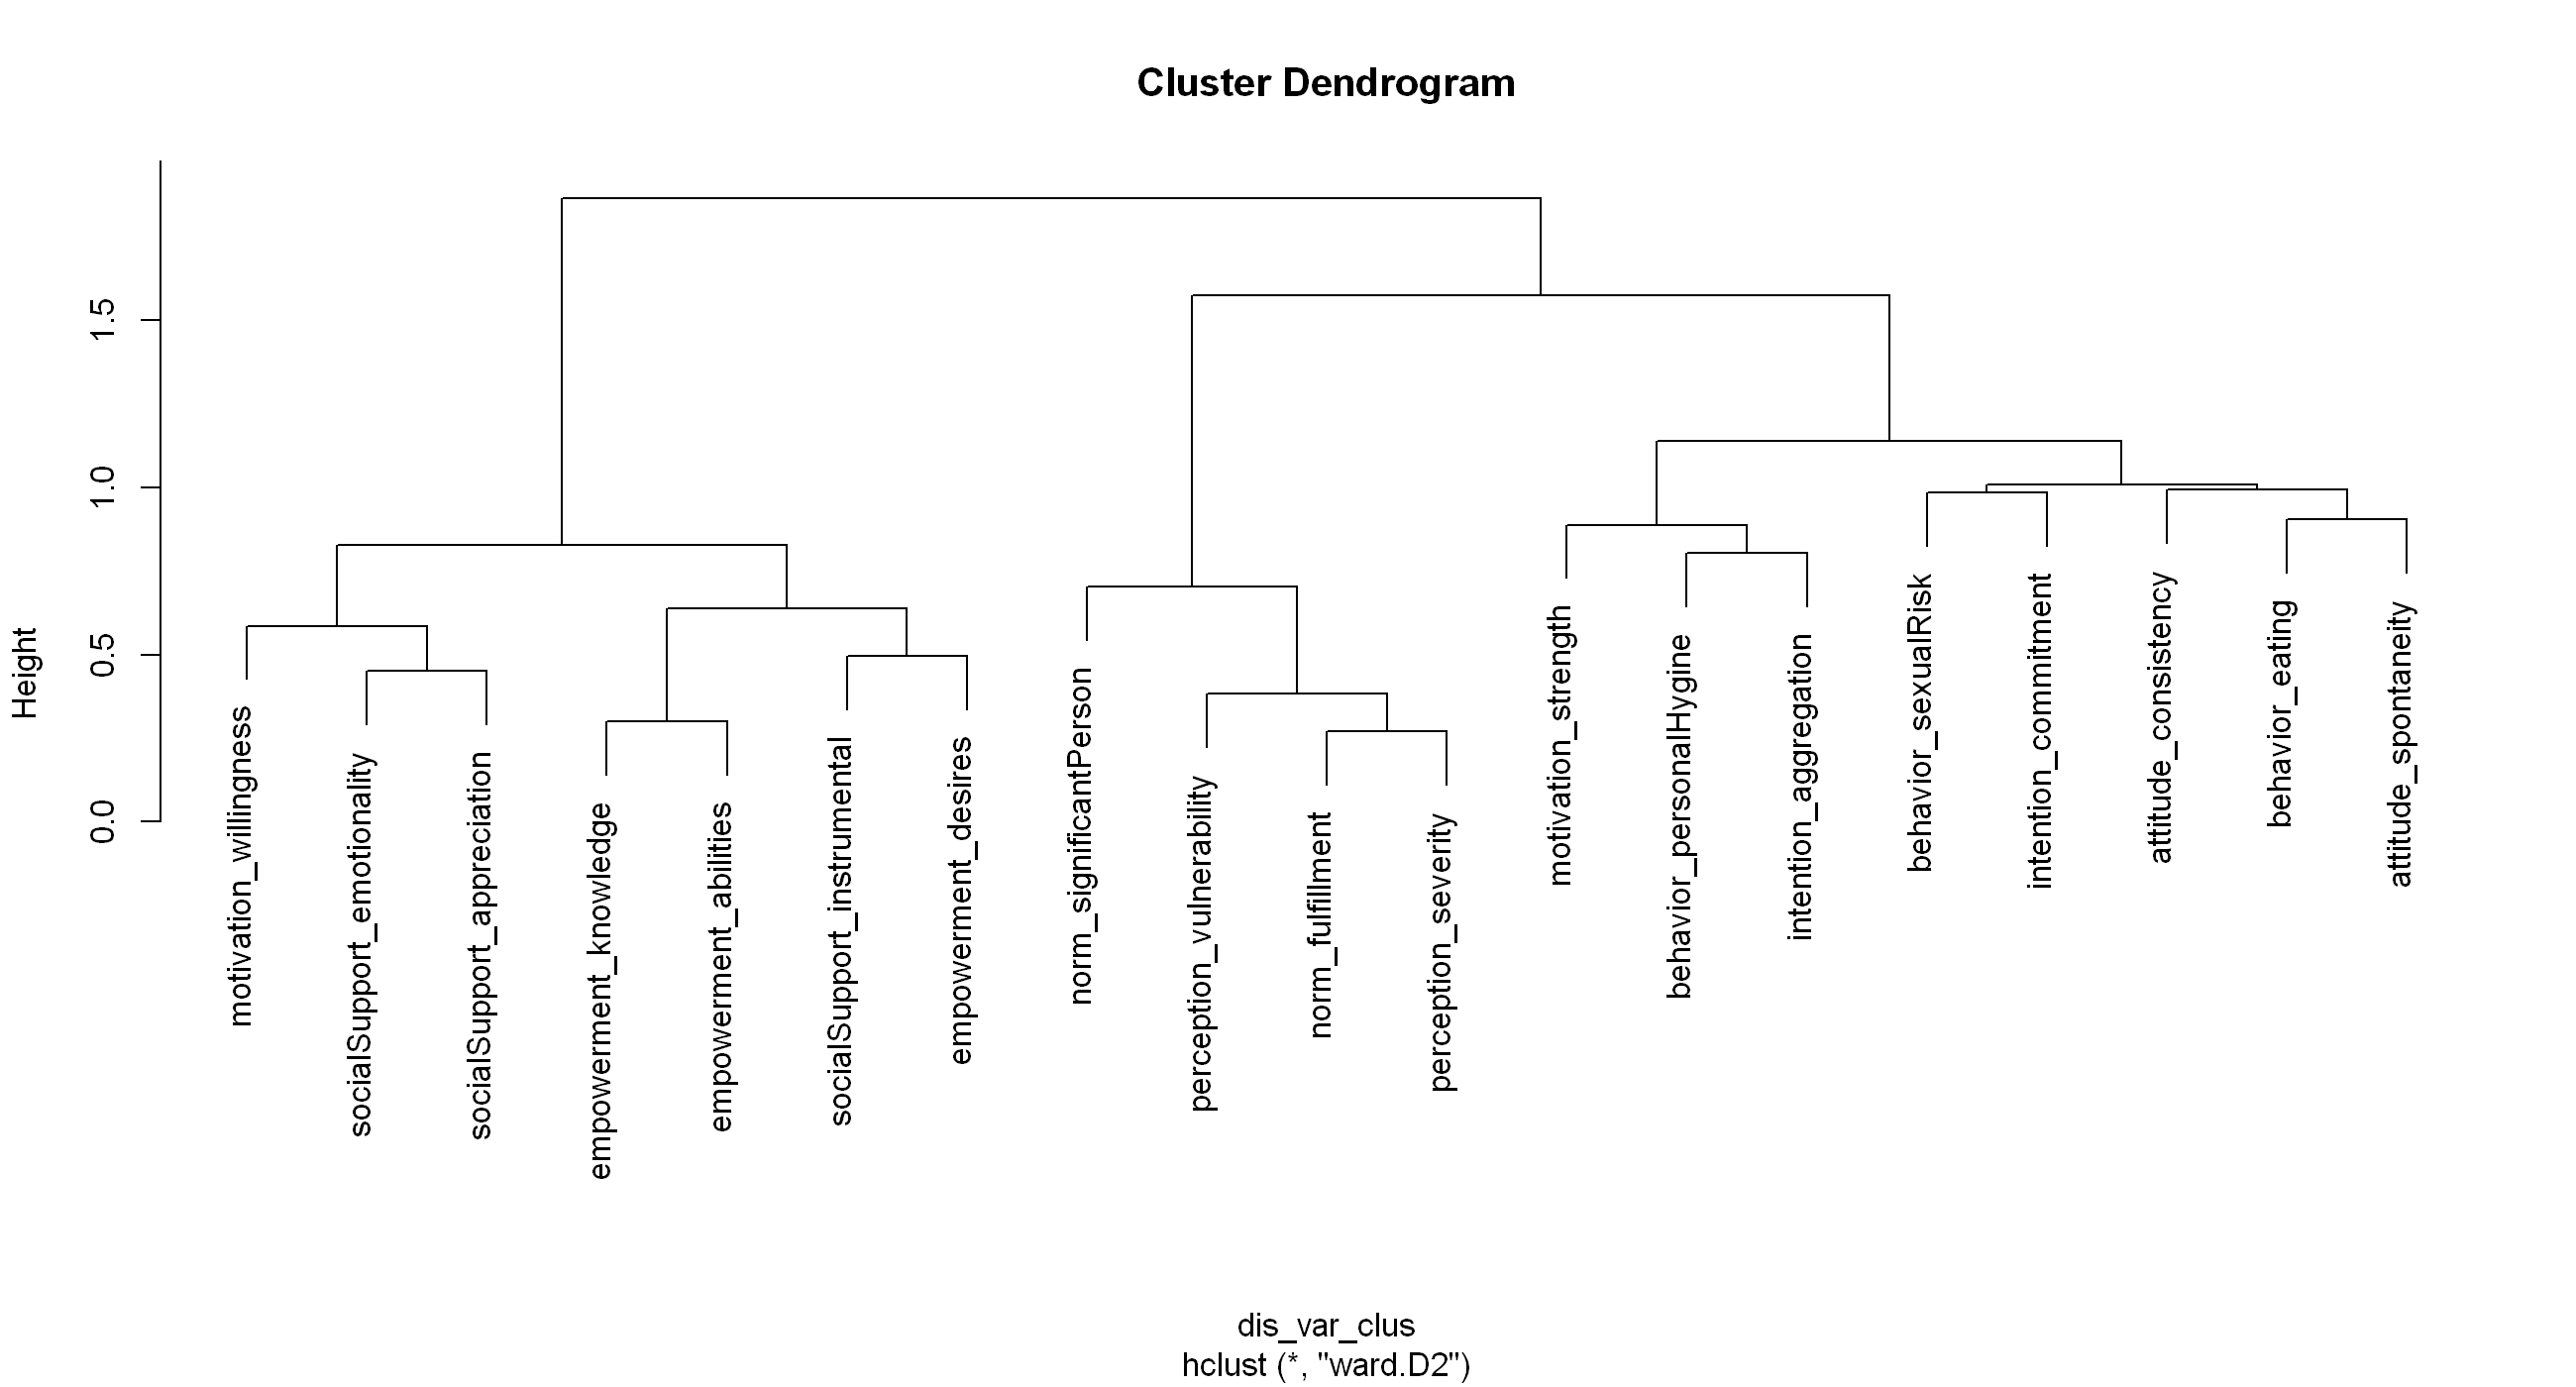

In [ ]:
ward_var_hc <- hclust(dis_var_clus, method="ward.D2")
plot(hclust(dis_var_clus, method="ward.D2"))

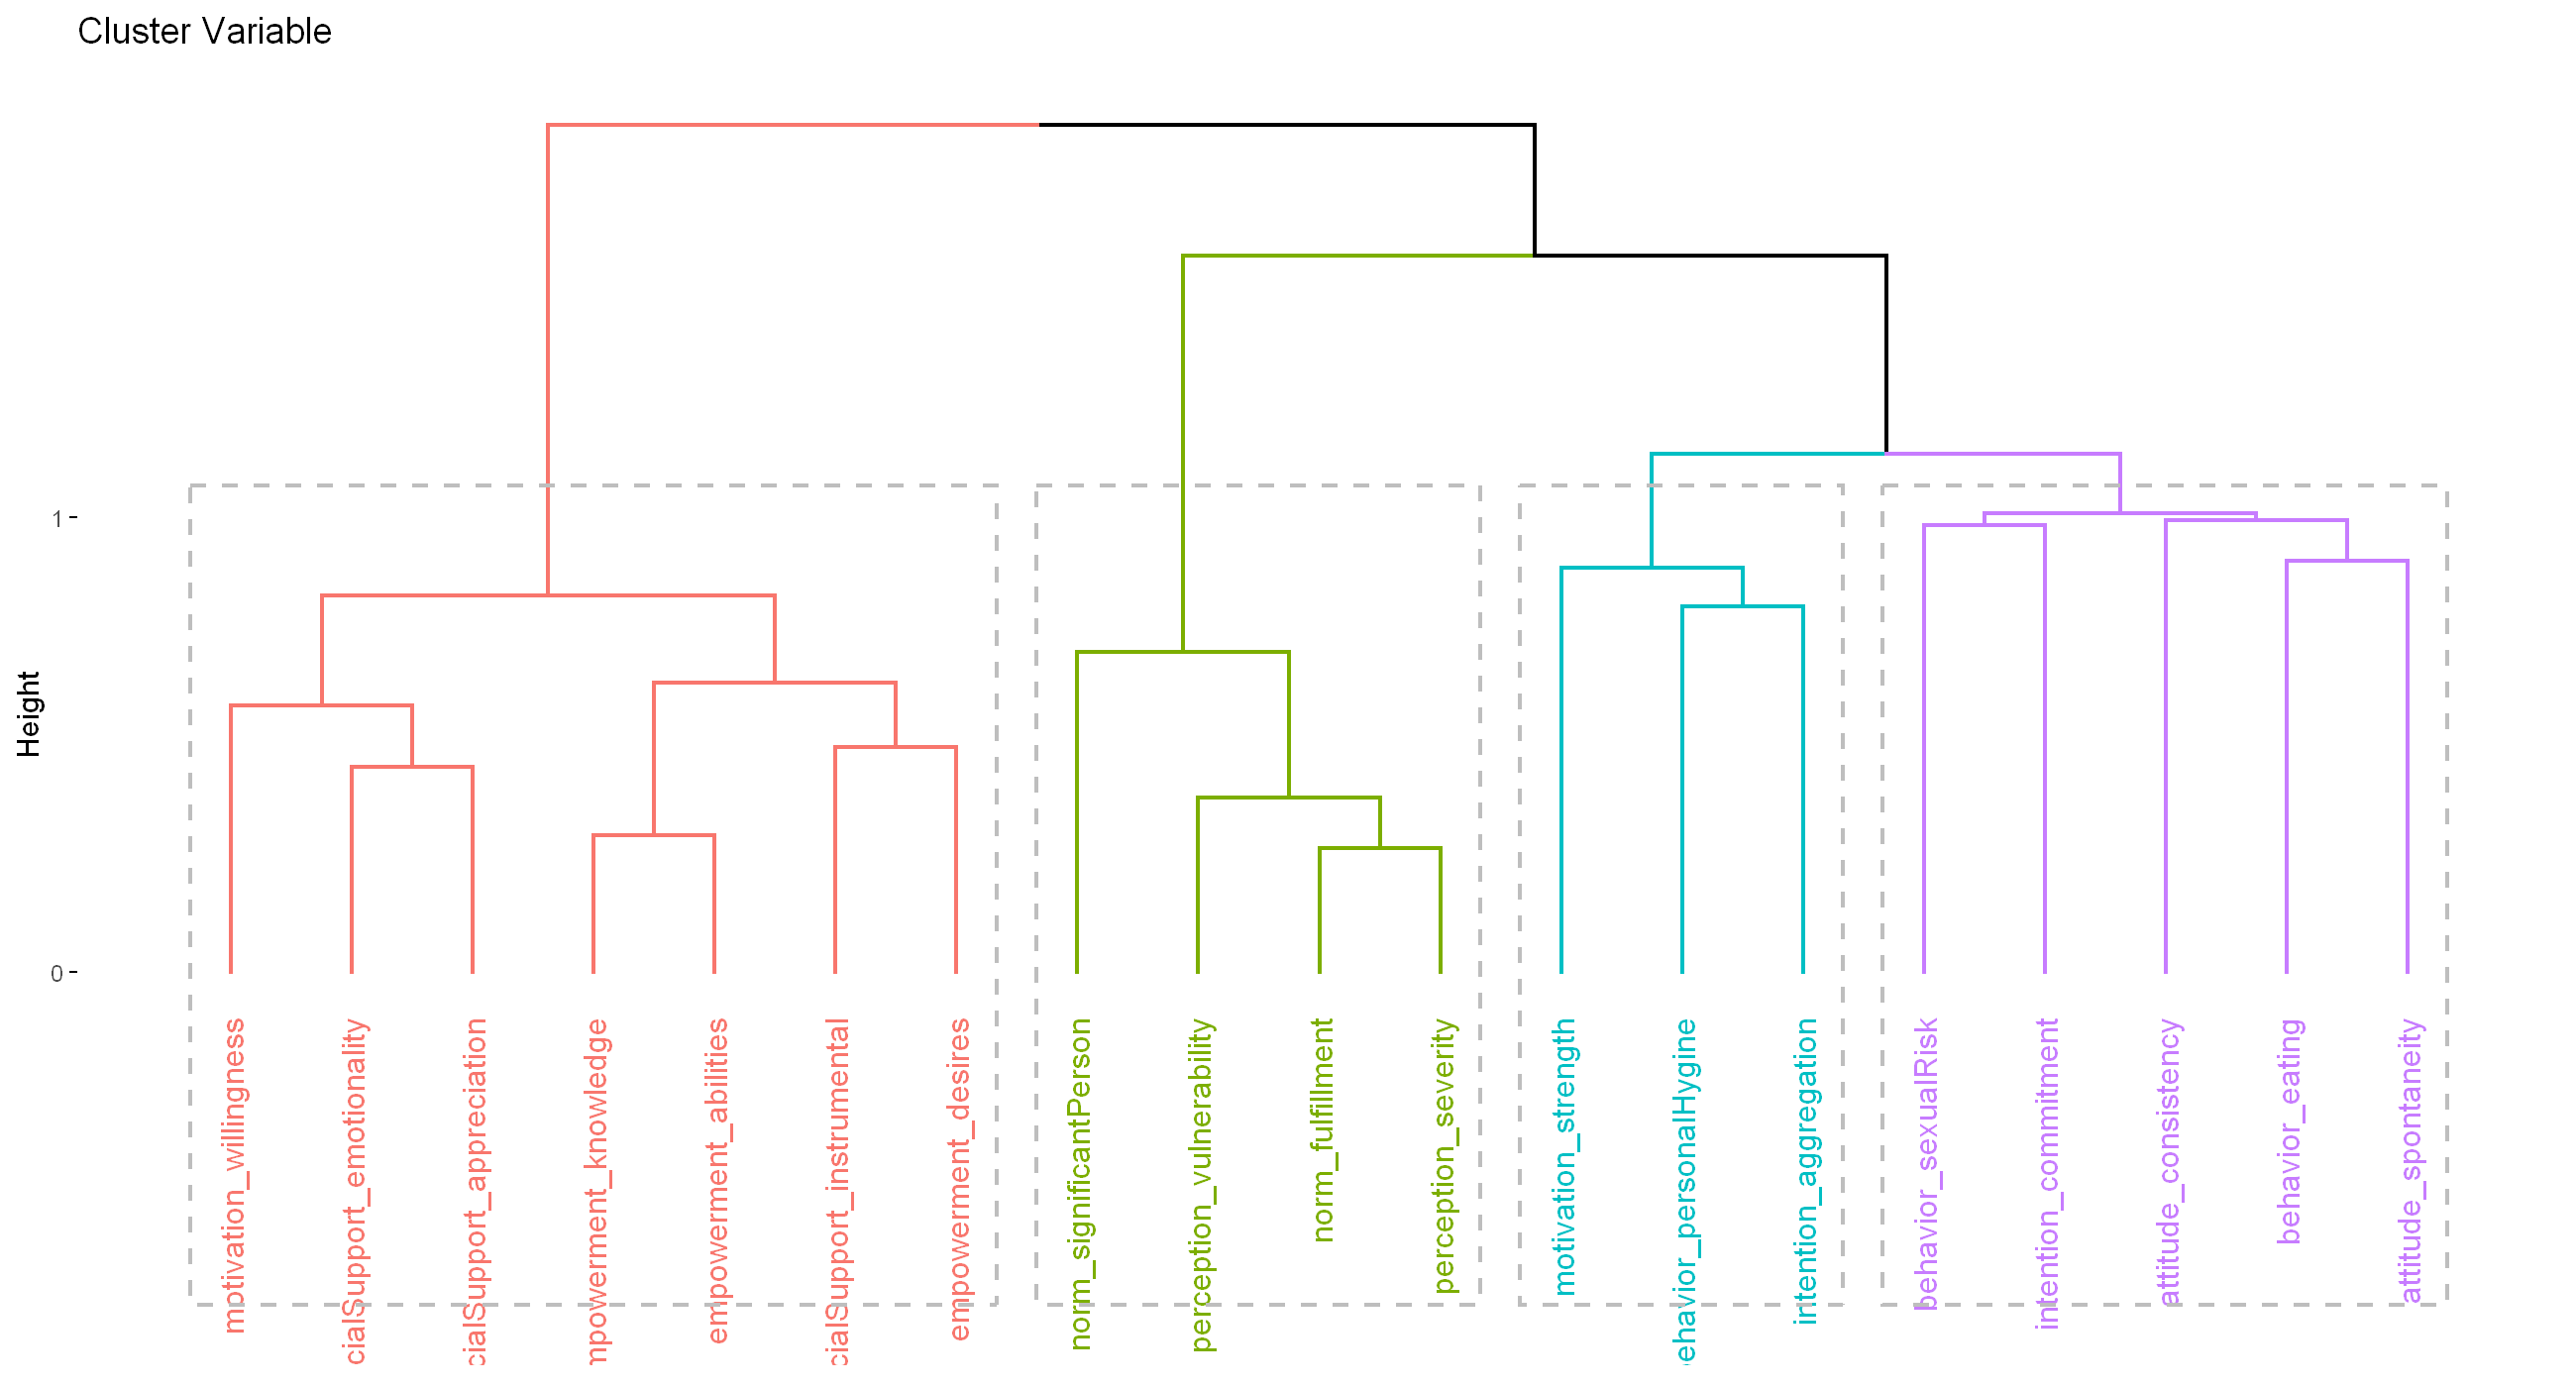

In [ ]:
fviz_dend(ward_var_hc, k = 4, rect = T, main = "Cluster Variable")

### 2. Stabilisasi dari partisi

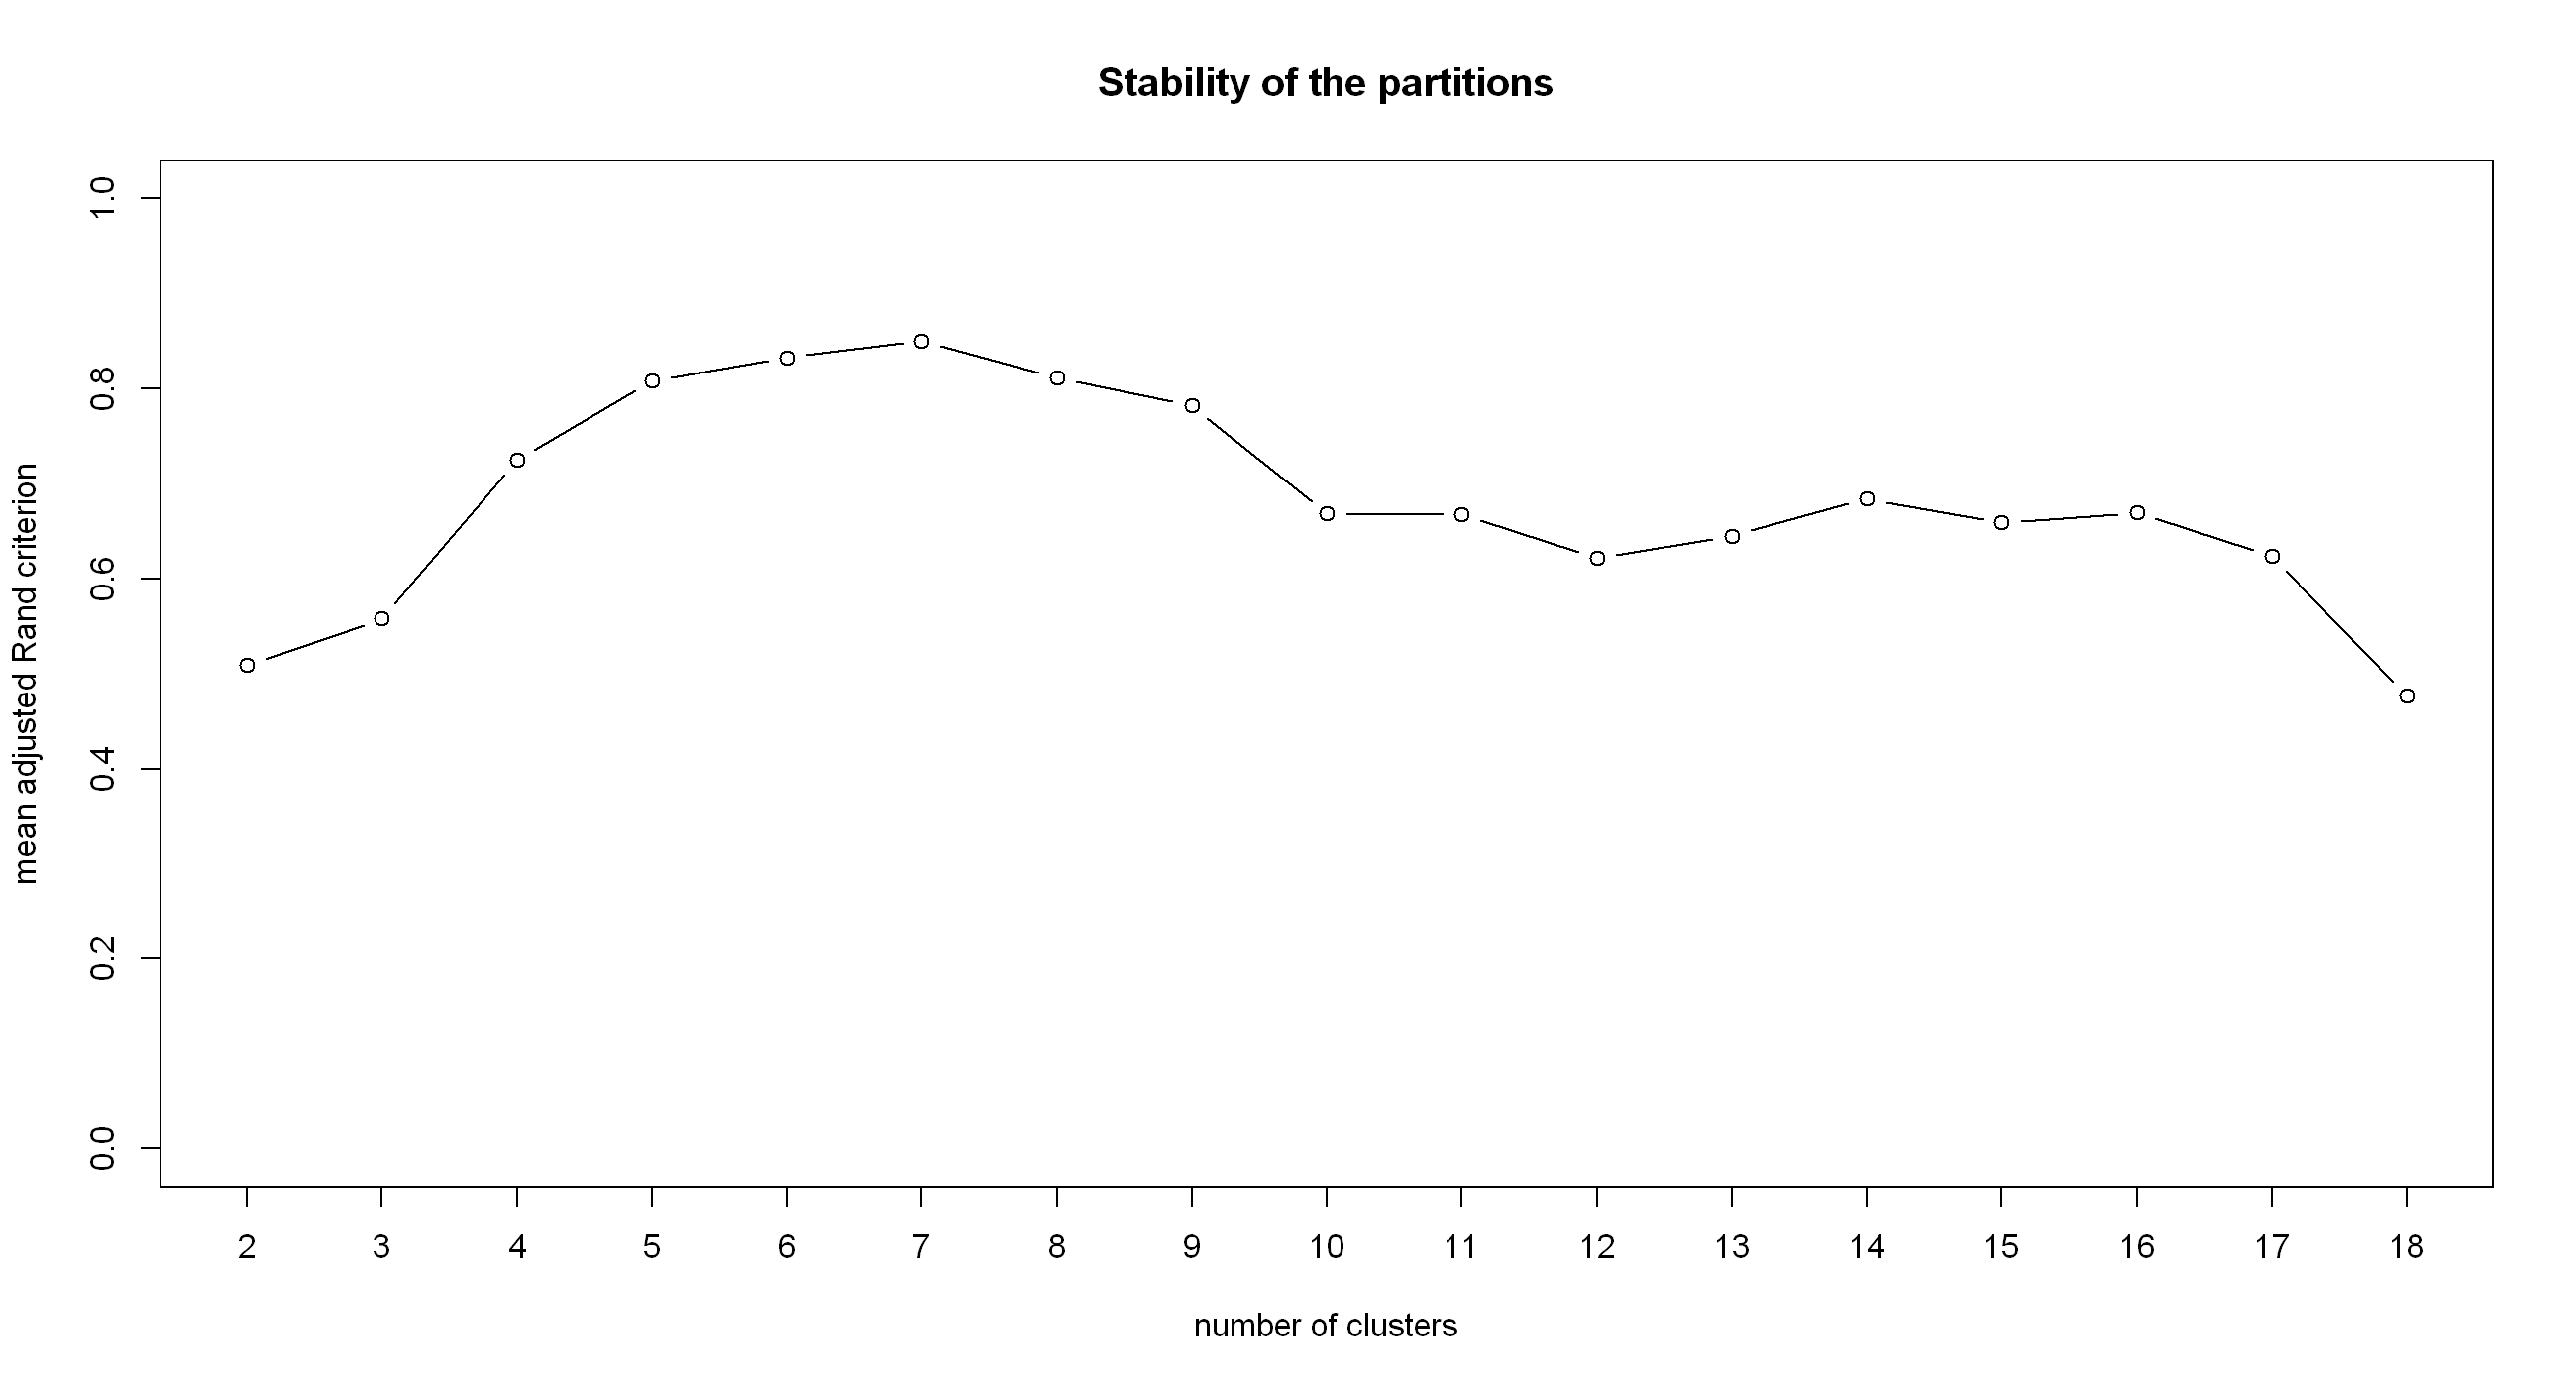

In [ ]:
stab <- stability(var_hc, B=50) # "B=50" refers to the number of bootstrap samples to use in the estimation.

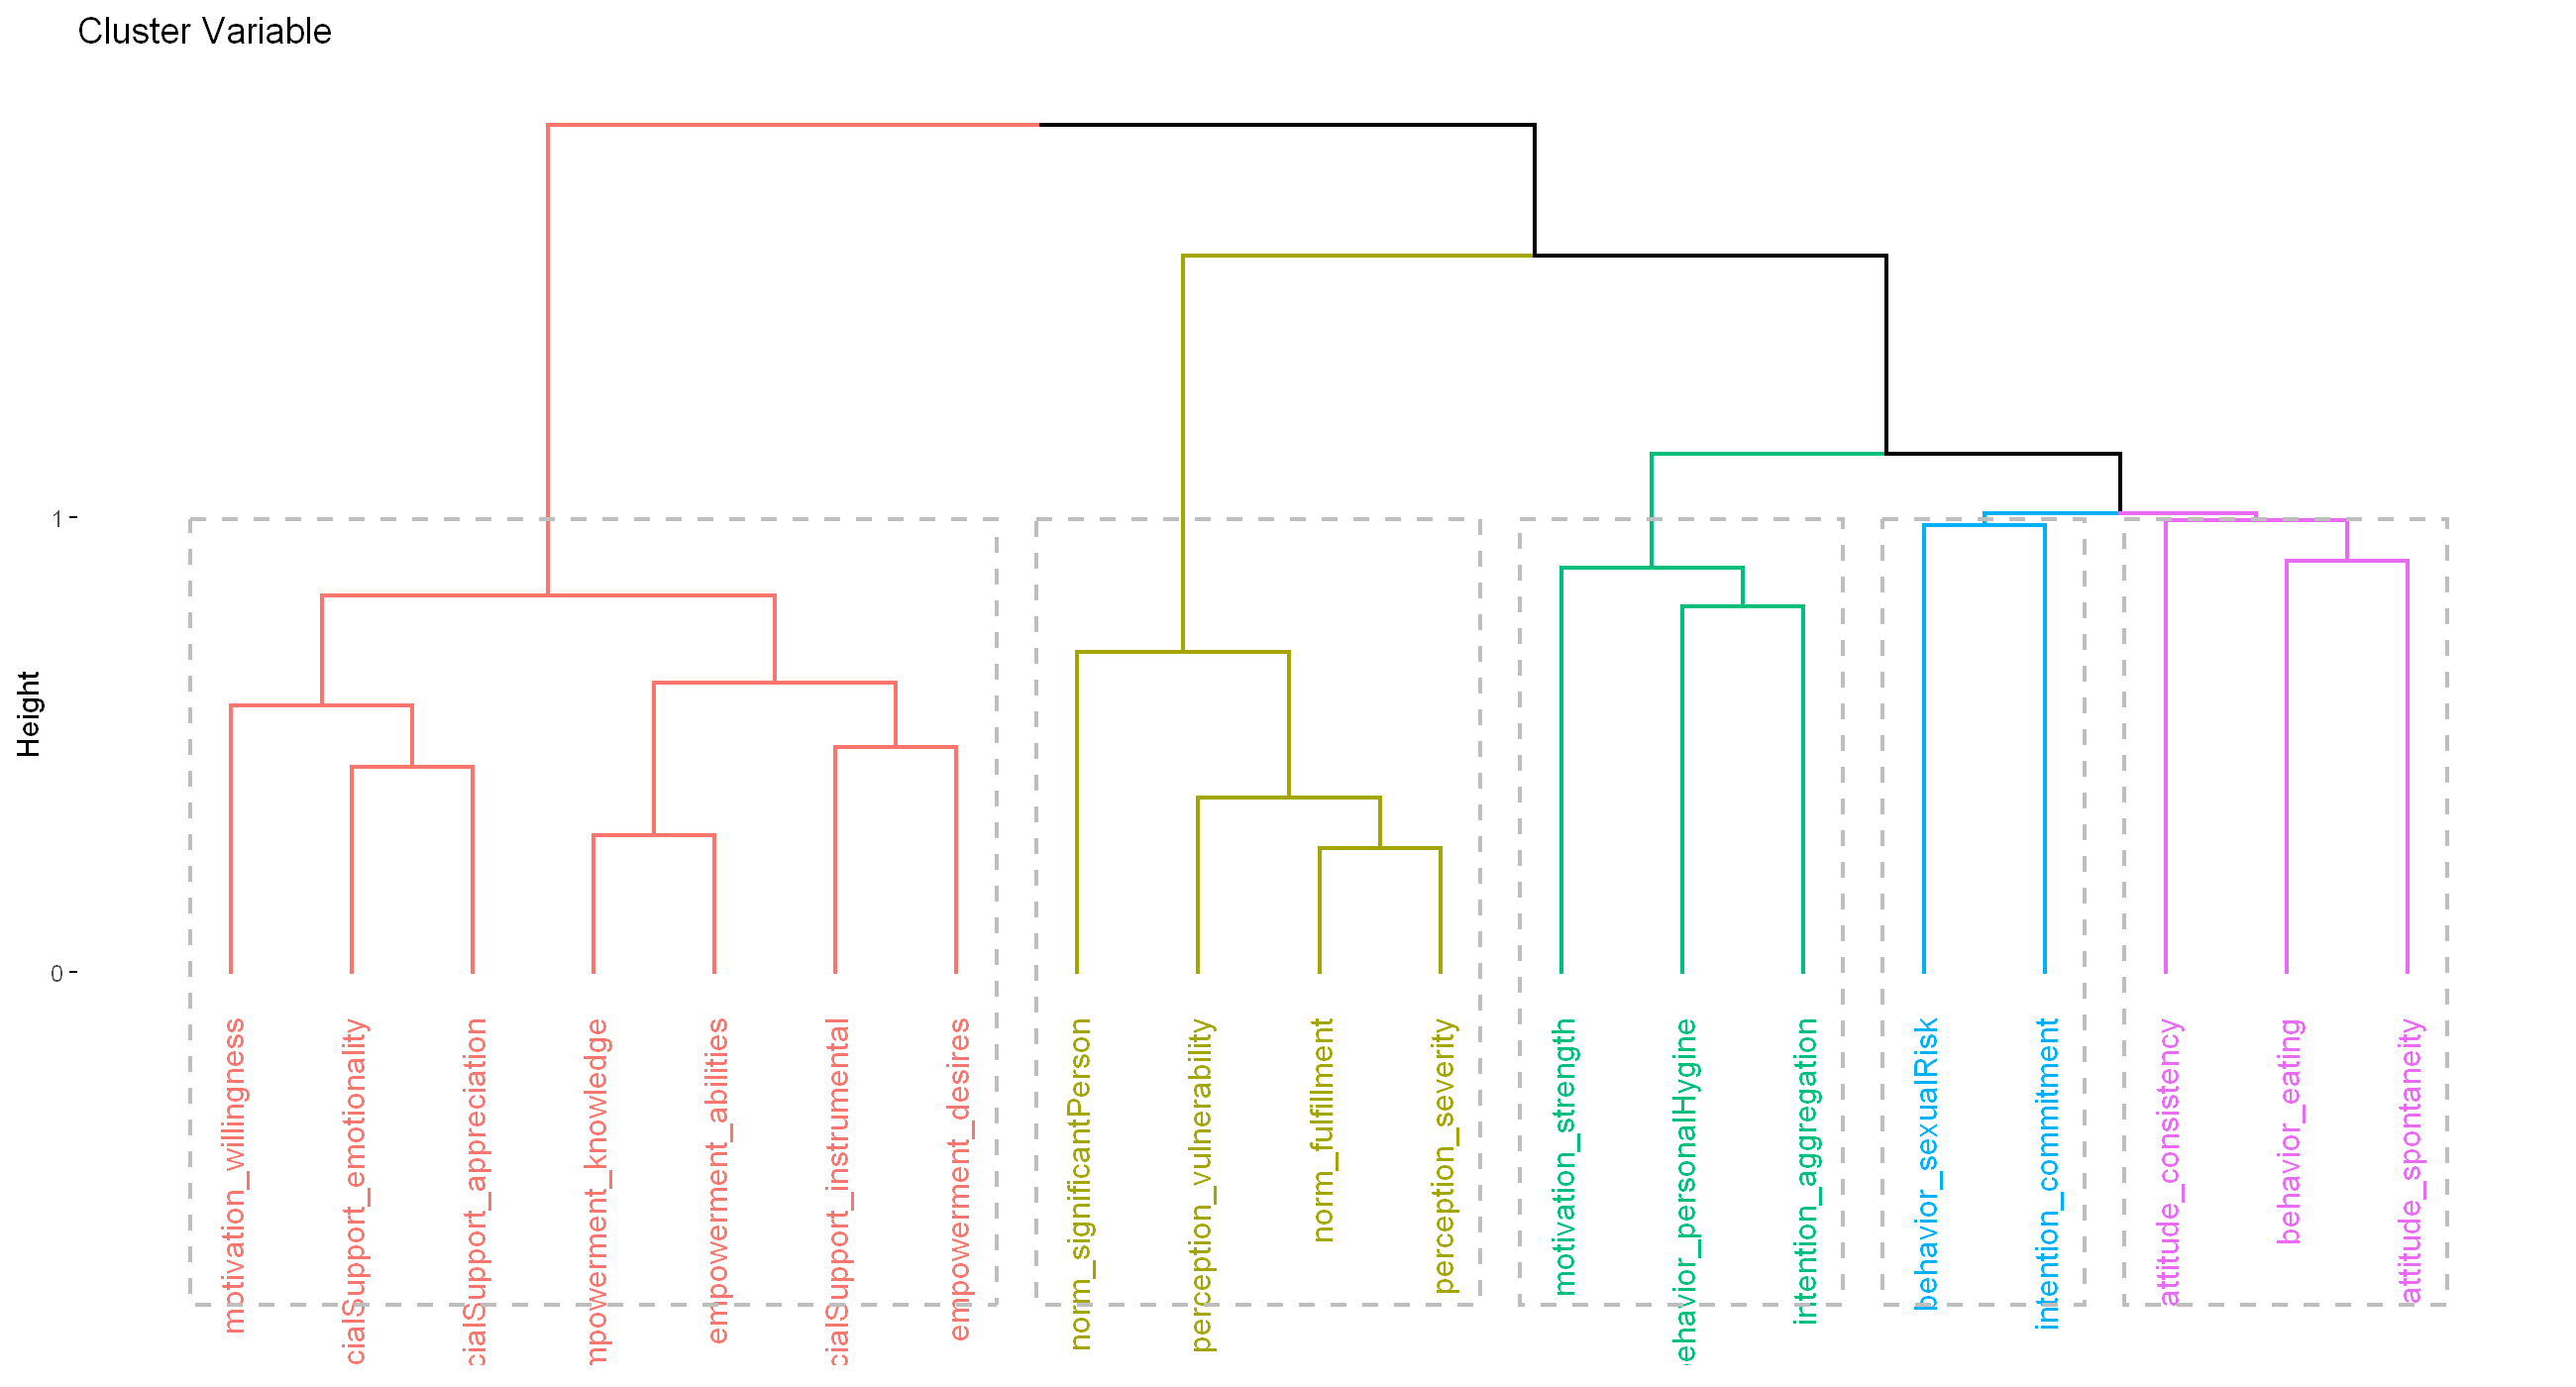

In [ ]:
fviz_dend(ward_var_hc, k = 5, rect = T, main = "Cluster Variable")

In [ ]:
k.means <- kmeansvar(X.quanti = xquant, X.quali = NULL, init=5)
summary(k.means)


Call:
kmeansvar(X.quanti = xquant, X.quali = NULL, init = 5)

number of iterations:  2

Data: 
   number of observations:  72
   number of variables:  19
   number of clusters:  5

Cluster  1 : 
                     squared loading correlation
attitude_spontaneity            0.62       -0.78
behavior_eating                 0.48       -0.70
intention_commitment            0.34       -0.59


Cluster  2 : 
squared loading     correlation 
              1               1 


Cluster  3 : 
                         squared loading correlation
perception_severity                 0.89       -0.94
norm_fulfillment                    0.87       -0.93
perception_vulnerability            0.84       -0.91
attitude_consistency                0.11       -0.33


Cluster  4 : 
                        squared loading correlation
behavior_personalHygine            0.64       -0.80
intention_aggregation              0.60       -0.77
motivation_strength                0.54       -0.73


Cluster  5 : 
     

In [ ]:
k.means$cluster

behavior_sexualRisk            behavior_eating 
                         5                          1 
   behavior_personalHygine      intention_aggregation 
                         4                          4 
      intention_commitment       attitude_consistency 
                         1                          3 
      attitude_spontaneity     norm_significantPerson 
                         1                          2 
          norm_fulfillment   perception_vulnerability 
                         3                          3 
       perception_severity        motivation_strength 
                         3                          4 
    motivation_willingness socialSupport_emotionality 
                         5                          5 
socialSupport_appreciation socialSupport_instrumental 
                         5                          5 
     empowerment_knowledge      empowerment_abilities 
                         5                          5 
       empowerment_desires 
                         5

# Multivariate Regression Analysis

# Analisis Regresi Multivariat

## A. Import Library dan Data

### 1. Import Library

In [ ]:
packages <- c("Hmisc", "matlib", "Matrix","expm","matrixcalc","ellipsis","Hotelling","dplyr","psych","RcmdrMisc","Rcsdp","mvnormtest","factoextra","cluster","ggplot2","tree","class", "car","MVN")
if ( length(missing_pkgs <- setdiff(packages, rownames(installed.packages()))) > 0) {
  message("Installing missing package(s): ", paste(missing_pkgs, collapse = ", "))
  install.packages(missing_pkgs)
}
lapply(packages, library, character.only = TRUE)

[[1]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[2]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[3]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[4]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[5]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[6]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[7]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[8]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[26] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[31] "methods"    "base"      

[[9]]
 [1] "MVN"        "class"      "tree"       "cluster"    "factoextra"
 [6] "mvnormtest" "Rcsdp"      "RcmdrMisc"  "sandwich"   "car"       
[11] "carData"    "psych"      "dplyr"      "Hotelling"  "corpcor"   
[16] "ellipsis"   "matrixcalc" "expm"       "Matrix"     "matlib"    
[21] "Hmisc"      "ggplot2"    "Formula"    "survi

### 2. Import Data

In [ ]:
data <- read.csv("AirQualityUCI.csv", header=TRUE, sep=";")
data <- as.data.frame(data)
dim(data)
head(data)

[1] 9357   15

,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,10/03/2004,23.00.00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


## B. Preprocessing Data

### 1. Membuang kolom pertama dan kedua

In [ ]:
databaru=data[-1:-2]
dim(databaru)
head(databaru)

[1] 9357   13

,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


### 2. Memeriksa Missing Value

In [ ]:
sum(is.na(databaru))

[1] 0

### 3. Ganti Nama Variabel

Untuk kelompok variabel dependen Y tidak diubah karena sudah sederhana yaitu
1. T -> Temperature (Suhu)
2. RH -> Relative Humidity (Kelembapan Relatif)
3. AH -> Absolute Humidity (Kelembapan Mutlak)

Untuk kelompok variabel independen X akan diubah menjadi
1. x1 -> CO.GT. (True hourly averaged concentration CO in mg/m^3 (reference analyzer))
2. x2 -> PT08.S1.CO. ((tin oxide) hourly averaged sensor response (nominally CO targeted))
3. x3 -> NMHC.GT. (True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer))
4. x4 -> C6H6.GT. (True hourly averaged Benzene concentration in microg/m^3 (reference analyzer))
5. x5 -> PT08.S2.NMHC. ((titania) hourly averaged sensor response (nominally NMHC targeted))
6. x6 -> NOx.GT. (True hourly averaged NOx concentration in ppb (reference analyzer))
7. x7 -> PT08.S3.NOx. ((tungsten oxide) hourly averaged sensor response (nominally NOx targeted))
8. x8 -> NO2.GT. (True hourly averaged NO2 concentration in microg/m^3 (reference analyzer))
9. x9 -> PT08.S4.NO2. ((tungsten oxide) hourly averaged sensor response (nominally NO2 targeted))
10. x10 -> PT08.S5.O3. ((indium oxide) hourly averaged sensor response (nominally O3 targeted))

In [ ]:
colnames(databaru)

[1] "CO.GT."        "PT08.S1.CO."   "NMHC.GT."      "C6H6.GT."     
 [5] "PT08.S2.NMHC." "NOx.GT."       "PT08.S3.NOx."  "NO2.GT."      
 [9] "PT08.S4.NO2."  "PT08.S5.O3."   "T"             "RH"           
[13] "AH"

In [ ]:
databaru <- rename(databaru,
                            x1 = CO.GT.,
                            x2 = PT08.S1.CO.,
                            x3 = NMHC.GT.,
                            x4 = C6H6.GT.,
                            x5 = PT08.S2.NMHC.,
                            x6 = NOx.GT.,
                            x7 = PT08.S3.NOx.,
                            x8 = NO2.GT.,
                            x9 = PT08.S4.NO2.,
                            x10 = PT08.S5.O3.)
dim(databaru)
head(databaru)

[1] 9357   13

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,T,RH,AH
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


## C. Uji Multivariat Normal

In [ ]:
mvn(databaru[1:10])
mvn(databaru[11:13])

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 48.52523       0  NO

$univariateNormality
               Test  Variable Statistic   p value Normality
1  Anderson-Darling    x1     2501.1533  <0.001      NO    
2  Anderson-Darling    x2      355.4125  <0.001      NO    
3  Anderson-Darling    x3     2820.9492  <0.001      NO    
4  Anderson-Darling    x4     2272.5848  <0.001      NO    
5  Anderson-Darling    x5      119.2082  <0.001      NO    
6  Anderson-Darling    x6      188.7943  <0.001      NO    
7  Anderson-Darling    x7      159.0311  <0.001      NO    
8  Anderson-Darling    x8      894.6616  <0.001      NO    
9  Anderson-Darling    x9      183.3416  <0.001      NO    
10 Anderson-Darling    x10      45.6823  <0.001      NO    

$Descriptives
       n        Mean   Std.Dev Median  Min    Max   25th   75th        Skew
x1  9357  -34.207524  77.65717    1.5 -200   11.9    0.6    2.6 -1.66564534
x2  9357 1048.990061 329.83271 1053.0 -200 2040.0  921.0 1221.0 -1.72095155
x3  9357 -159.090093 139.78909 -200.0 -200 1189.0 -200.0 -200.0  4.07447779
x4  9357    1.865683  41.38021    7.9 -200   63.7    4.0   13.6 -4.50731741
x5  9357  894.595276 342.33325  895.0 -200 2214.0  711.0 1105.0 -0.79318027
x6  9357  168.616971 257.43387  141.0 -200 1479.0   50.0  284.0  0.82496763
x7  9357  794.990168 321.99355  794.0 -200 2683.0  637.0  960.0 -0.38463642
x8  9357   58.148873 126.94046   96.0 -200  340.0   53.0  133.0 -1.22523671
x9  9357 1391.479641 467.21012 1446.0 -200 2775.0 1185.0 1662.0 -1.24371109
x10 9357  975.072032 456.93818  942.0 -200 2523.0  700.0 1255.0 -0.03465077
      Kurtosis
x1   0.7764412
x2   5.8312880
x3  18.8484336
x4  19.1730172
x5   2.3670340
x6   1.5030090
x7   3.1012216
x8   0.2741107
x9   3.2633022
x10  0.6365370

$multivariateNormality
           Test      HZ p value MVN
1 Henze-Zirkler 466.857       0  NO

$univariateNormality
              Test  Variable Statistic   p value Normality
1 Anderson-Darling     T      2041.459  <0.001      NO    
2 Anderson-Darling    RH      1329.045  <0.001      NO    
3 Anderson-Darling    AH      2383.691  <0.001      NO    

$Descriptives
      n      Mean  Std.Dev  Median  Min    Max    25th   75th      Skew
T  9357  9.778305 43.20362 17.2000 -200 44.600 10.9000 24.100 -4.444042
RH 9357 39.485380 51.21614 48.6000 -200 88.700 34.1000 61.900 -3.931147
AH 9357 -1.673907 40.53292  0.9768 -200 21.806  0.6923 12.461 -4.557481
   Kurtosis
T  18.75948
RH 15.75108
AH 19.42985

## D. Analisis Regresi Multivariat

### 1. Analisis Regresi Secara Individual Variabel Dependen Y

In [ ]:
mmr <- lm(cbind(T, RH, AH) ~ x1 + x2 + x3 + x4
+ x5 + x6 + x7 + x8 + x9 + x10, data = databaru)
summary(mmr)

Response T :

Call:
lm(formula = T ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + 
    x10, data = databaru)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.127  -3.497  -0.477   3.377  22.759 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.6444866  1.0765154   33.11   <2e-16 ***
x1           0.0008322  0.0010666    0.78    0.435    
x2          -0.0170039  0.0008270  -20.56   <2e-16 ***
x3          -0.0091767  0.0005161  -17.78   <2e-16 ***
x4           1.2135694  0.0066769  181.76   <2e-16 ***
x5          -0.0211482  0.0008000  -26.43   <2e-16 ***
x6          -0.0146951  0.0005621  -26.14   <2e-16 ***
x7          -0.0107328  0.0004707  -22.80   <2e-16 ***
x8           0.0228457  0.0009972   22.91   <2e-16 ***
x9           0.0202109  0.0003389   59.64   <2e-16 ***
x10         -0.0115345  0.0004278  -26.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.817 on 9346 degrees of free

#### Residual

In [ ]:
head(resid(mmr))

,T,RH,AH
1,1.755275,0.5362015,1.963428
2,1.154520,4.8925357,3.380947
3,2.352900,2.9062604,3.614916
4,1.691391,5.2473381,2.348851
5,2.339903,3.3221514,2.023368
6,2.671187,3.8953512,2.604271


#### Estimasi

In [ ]:
head(fitted(mmr))

,T,RH,AH
1,11.844725,48.36380,-1.205628
2,12.145480,42.80746,-2.655447
3,9.547100,51.09374,-2.864716
4,9.308609,54.75266,-1.562151
5,8.860097,56.27785,-1.234568
6,8.528813,55.30465,-1.819471


#### Koefisien

In [ ]:
coef(mmr)

,T,RH,AH
(Intercept),35.6444865770,96.719944192,39.487167422
x1,0.0008322109,0.005210537,0.002858105
x2,-0.0170039225,0.036472604,-0.009486662
x3,-0.0091767436,0.001982268,-0.007666547
x4,1.2135694341,1.603239361,1.264690443
x5,-0.0211481784,-0.156250185,-0.055812830
x6,-0.0146950583,0.044230735,0.002075184
x7,-0.0107328279,-0.019217104,-0.016039014
x8,0.0228457374,-0.074058443,-0.005187818
x9,0.0202108948,0.023003289,0.021059334


#### Variansi-Kovariansi Matrix

In [ ]:
sigma(mmr)
vcov(mmr)

T        RH        AH 
 5.817090 13.092727  4.630952

,T:(Intercept),T:x1,T:x2,T:x3,T:x4,T:x5,T:x6,T:x7,T:x8,T:x9,⋯,AH:x1,AH:x2,AH:x3,AH:x4,AH:x5,AH:x6,AH:x7,AH:x8,AH:x9,AH:x10
T:(Intercept),1.158885e+00,1.591840e-05,-5.390961e-04,3.002965e-04,6.930255e-03,-3.068775e-04,1.369892e-04,-4.326129e-04,-2.011919e-04,1.690394e-05,⋯,3.655836e-06,-1.238093e-04,6.896638e-05,1.591609e-03,-7.047778e-05,3.146106e-05,-9.935430e-05,-4.620594e-05,3.882175e-06,6.868042e-06
T:x1,1.591840e-05,1.137701e-06,5.034156e-09,-5.191252e-08,-3.034643e-07,6.075872e-08,-4.646136e-08,-3.782561e-09,-4.299766e-07,-1.389970e-08,⋯,2.612855e-07,1.156149e-09,-1.192228e-08,-6.969390e-08,1.395391e-08,-1.067036e-08,-8.687065e-10,-9.874885e-08,-3.192219e-09,2.557118e-09
T:x2,-5.390961e-04,5.034156e-09,6.839756e-07,-1.664006e-07,-3.149216e-06,-4.404109e-08,-7.119228e-08,8.984970e-08,7.176172e-08,-4.775214e-08,⋯,1.156149e-09,1.570825e-07,-3.821573e-08,-7.232521e-07,-1.011452e-08,-1.635009e-08,2.063497e-08,1.648086e-08,-1.096680e-08,-3.687628e-08
T:x3,3.002965e-04,-5.191252e-08,-1.664006e-07,2.663391e-07,1.620236e-06,-3.459387e-08,7.488221e-08,-8.284048e-08,-1.054699e-07,-3.914123e-09,⋯,-1.192228e-08,-3.821573e-08,6.116769e-08,3.721049e-07,-7.944861e-09,1.719752e-08,-1.902522e-08,-2.422232e-08,-8.989212e-10,1.787046e-09
T:x4,6.930255e-03,-3.034643e-07,-3.149216e-06,1.620236e-06,4.458139e-05,-2.203184e-06,1.084191e-06,-2.618802e-06,-1.177694e-06,2.583364e-07,⋯,-6.969390e-08,-7.232521e-07,3.721049e-07,1.023860e-05,-5.059854e-07,2.489964e-07,-6.014366e-07,-2.704704e-07,5.932979e-08,2.744624e-08
T:x5,-3.068775e-04,6.075872e-08,-4.404109e-08,-3.459387e-08,-2.203184e-06,6.400215e-07,-1.108389e-07,1.657579e-07,6.138940e-08,-1.647844e-07,⋯,1.395391e-08,-1.011452e-08,-7.944861e-09,-5.059854e-07,1.469880e-07,-2.545537e-08,3.806812e-08,1.409875e-08,-3.784455e-08,-2.500433e-08
T:x6,1.369892e-04,-4.646136e-08,-7.119228e-08,7.488221e-08,1.084191e-06,-1.108389e-07,3.159309e-07,-3.260812e-08,-3.983594e-07,6.434196e-08,⋯,-1.067036e-08,-1.635009e-08,1.719752e-08,2.489964e-07,-2.545537e-08,7.255699e-08,-7.488813e-09,-9.148761e-08,1.477684e-08,-1.143905e-08
T:x7,-4.326129e-04,-3.782561e-09,8.984970e-08,-8.284048e-08,-2.618802e-06,1.657579e-07,-3.260812e-08,2.216048e-07,5.086086e-08,-1.911481e-08,⋯,-8.687065e-10,2.063497e-08,-1.902522e-08,-6.014366e-07,3.806812e-08,-7.488813e-09,5.089397e-08,1.168075e-08,-4.389925e-09,8.153560e-09
T:x8,-2.011919e-04,-4.299766e-07,7.176172e-08,-1.054699e-07,-1.177694e-06,6.138940e-08,-3.983594e-07,5.086086e-08,9.944209e-07,-2.867322e-08,⋯,-9.874885e-08,1.648086e-08,-2.422232e-08,-2.704704e-07,1.409875e-08,-9.148761e-08,1.168075e-08,2.283797e-07,-6.585120e-09,1.189804e-08
T:x9,1.690394e-05,-1.389970e-08,-4.775214e-08,-3.914123e-09,2.583364e-07,-1.647844e-07,6.434196e-08,-1.911481e-08,-2.867322e-08,1.148387e-07,⋯,-3.192219e-09,-1.096680e-08,-8.989212e-10,5.932979e-08,-3.784455e-08,1.477684e-08,-4.389925e-09,-6.585120e-09,2.637396e-08,5.945156e-09


### 2. Analisis Regresi Secara Multivariat untuk Variabel Dependen Y

#### Uji hipotesis signifikansi koefisien secara multivariat

In [ ]:
library(car)
Anova(mmr)


Type II MANOVA Tests: Pillai test statistic
    Df test stat approx F num Df den Df    Pr(>F)    
x1   1   0.00197        6      3   9344 0.0003537 ***
x2   1   0.06396      213      3   9344 < 2.2e-16 ***
x3   1   0.06119      203      3   9344 < 2.2e-16 ***
x4   1   0.93695    46286      3   9344 < 2.2e-16 ***
x5   1   0.70415     7413      3   9344 < 2.2e-16 ***
x6   1   0.11815      417      3   9344 < 2.2e-16 ***
x7   1   0.25121     1045      3   9344 < 2.2e-16 ***
x8   1   0.10684      373      3   9344 < 2.2e-16 ***
x9   1   0.59594     4594      3   9344 < 2.2e-16 ***
x10  1   0.07660      258      3   9344 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
lh.out <- linearHypothesis(mmr, hypothesis.matrix = c("x1 = 0","x2 = 0","x3 = 0","x4 = 0","x5 = 0","x6 = 0", "x7 = 0","x8 = 0","x9 = 0","x10 = 0"))
lh.out


Sum of squares and products for the hypothesis:
          T       RH       AH
T  17147215 18824613 16058117
RH 18824613 22939576 18160335
AH 16058117 18160335 15170705

Sum of squares and products for error:
            T         RH        AH
T   316254.94 -484284.16  72631.41
RH -484284.16 1602086.66  34952.07
AH   72631.41   34952.07 200431.63

Multivariate Tests: 
                 Df test stat  approx F num Df   den Df     Pr(>F)    
Pillai           10   1.46823    895.83     30 28038.00 < 2.22e-16 ***
Wilks            10   0.00271   5938.28     30 27427.16 < 2.22e-16 ***
Hotelling-Lawley 10 202.02095  62913.81     30 28028.00 < 2.22e-16 ***
Roy              10 201.23083 188070.33     10  9346.00 < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
lh.out <- linearHypothesis(mmr, hypothesis.matrix = c("x1 = 0","x7 = 0"))
lh.out


Sum of squares and products for the hypothesis:
          T       RH       AH
T  17602.32 31588.74 26335.87
RH 31588.74 57099.88 47440.31
AH 26335.87 47440.31 39480.12

Sum of squares and products for error:
            T         RH        AH
T   316254.94 -484284.16  72631.41
RH -484284.16 1602086.66  34952.07
AH   72631.41   34952.07 200431.63

Multivariate Tests: 
                 Df test stat  approx F num Df den Df     Pr(>F)    
Pillai            2 0.2521640  449.4077      6  18690 < 2.22e-16 ***
Wilks             2 0.7478646  486.9715      6  18688 < 2.22e-16 ***
Hotelling-Lawley  2 0.3371021  524.9241      6  18686 < 2.22e-16 ***
Roy               2 0.3369884 1049.7188      3   9345 < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
# Matriks E
lh.out$SSPE

# Matriks H
lh.out$SSPH

,T,RH,AH
T,316254.94,-484284.16,72631.41
RH,-484284.16,1602086.66,34952.07
AH,72631.41,34952.07,200431.63


,T,RH,AH
T,17602.32,31588.74,26335.87
RH,31588.74,57099.88,47440.31
AH,26335.87,47440.31,39480.12
